# ***Libraries & Constants***

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm.keras import TqdmCallback
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import KFold
from termcolor import colored
from tabulate import tabulate


### Setting Random seed

In [2]:
seed=1379
np.random.seed(seed)

### Checking the device

In [3]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# ***Preprocessing***

##Reading & displaying data:

In [4]:
!gdown 1mY0ulARmqGaca48fl5fWdPU1l8t4Q5cF

Downloading...
From: https://drive.google.com/uc?id=1mY0ulARmqGaca48fl5fWdPU1l8t4Q5cF
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 40.4MB/s]


In [5]:
df = pd.read_csv('/content/Dataset.csv')
print(type(df))
print("Data shape:", df.shape, "\n")
df.head()

<class 'pandas.core.frame.DataFrame'>
Data shape: (480, 17) 



gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Good   
1          25                   Yes                     Good   
2          30                    No                      Bad   
3          35                    No                      Bad   
4          50                    No                      Bad   

  StudentAbsenceDays Class  
0            Under-7     M  
1            Under-7     M  
2            Above-7     L  
3            Above-7     L  
4            Above-7     M

## Dataset data analysis

In [6]:
print(colored(f"\nThe data set has {df.shape[0]} examples with {df.shape[1] - 1} features and 3 options for output\n\n\n", 'yellow', attrs=['bold']))

print(colored("1. Gender column:", 'red', attrs=['bold']), np.sort(df["gender"].unique()), colored(" F:64%, M:36%  Encoded as 0s and 1s\n", 'red'))
print(colored("2. NationalITy column:", 'blue', attrs=['bold']), np.sort(df["NationalITy"].unique()), colored("\t\tEncoded as 0 to 13\n", 'blue'))
print(colored("3. PlaceofBirth column:", 'green', attrs=['bold']), np.sort(df["PlaceofBirth"].unique()), colored("\t\tEncoded as 0 to 13\n", 'green'))
print(colored("4. StageID column:", 'yellow', attrs=['bold']), np.sort(df["StageID"].unique()), colored(" H:7%, M:52%, l:41%  Encoded as 0 to 2\n", 'yellow'))
print(colored("5. GradeID column:", 'cyan', attrs=['bold']), np.sort(df["GradeID"].unique()), colored("\tEncoded as 0 to 9\n", 'cyan'))
print(colored("6. SectionID column:", 'red', attrs=['bold']), np.sort(df["SectionID"].unique()), "A:59%, B:35%, C:6%", colored("\tEncoded as 0 to 2\n", 'red'))
print(colored("7. Topic column:", 'blue', attrs=['bold']), np.sort(df["Topic"].unique()), colored("\t\tEncoded as 0 to 11\n", 'blue'))
print(colored("8. Semester column:", 'green', attrs=['bold']), np.sort(df["Semester"].unique()), colored("F:51%, S:49%  Encoded as 0s and 1s\n", 'green'))
print(colored("9. Relation column:", 'yellow', attrs=['bold']), np.sort(df["Relation"].unique()), colored(" Father:59%, Mother:41%  Encoded as 0s and 1s\n", 'yellow'))
print(colored("10. raisedhands column:", 'cyan', attrs=['bold']), np.sort(df["raisedhands"].unique()), colored("\tNot Encoded\n", 'cyan'))
print(colored("11. VisITedResources column:", 'red', attrs=['bold']), np.sort(df["VisITedResources"].unique()), colored("\tNot Encoded\n", 'red'))
print(colored("12. AnnouncementsView column:", 'blue', attrs=['bold']), np.sort(df["AnnouncementsView"].unique()), colored("\tNot Encoded\n", 'blue'))
print(colored("13. Discussion column:", 'green', attrs=['bold']), np.sort(df["Discussion"].unique()), colored("\tNot Encoded\n", 'green'))
print(colored("14. ParentAnsweringSurvey column:", 'yellow', attrs=['bold']), np.sort(df["ParentAnsweringSurvey"].unique()), colored(" No:44%, Yes:56%,  Encoded as 0s and 1s\n", 'yellow'))
print(colored("15. ParentschoolSatisfaction column:", 'cyan', attrs=['bold']), np.sort(df["ParentschoolSatisfaction"].unique()), colored("  Bad:39% Good:61%,  Encoded as 0 and1\n", 'cyan'))
print(colored("16. StudentAbsenceDays column:", 'red', attrs=['bold']), np.sort(df["StudentAbsenceDays"].unique()), colored("  Above-7:60%, Under-7:40%  Encoded as 0s and 1s\n", 'red'))
print(colored("17. Class column:", 'blue', attrs=['bold']), np.sort(df["Class"].unique()), colored("  H:30, L:26, M:44  Encoded as 0 t0 2\n", 'blue'))



The data set has 480 examples with 16 features and 3 options for output



1. Gender column: ['F' 'M']  F:64%, M:36%  Encoded as 0s and 1s

2. NationalITy column: ['Egypt' 'Iran' 'Iraq' 'Jordan' 'KW' 'Lybia' 'Morocco' 'Palestine'
 'SaudiArabia' 'Syria' 'Tunis' 'USA' 'lebanon' 'venzuela'] 		Encoded as 0 to 13

3. PlaceofBirth column: ['Egypt' 'Iran' 'Iraq' 'Jordan' 'KuwaIT' 'Lybia' 'Morocco' 'Palestine'
 'SaudiArabia' 'Syria' 'Tunis' 'USA' 'lebanon' 'venzuela'] 		Encoded as 0 to 13

4. StageID column: ['HighSchool' 'MiddleSchool' 'lowerlevel']  H:7%, M:52%, l:41%  Encoded as 0 to 2

5. GradeID column: ['G-02' 'G-04' 'G-05' 'G-06' 'G-07' 'G-08' 'G-09' 'G-10' 'G-11' 'G-12'] 	Encoded as 0 to 9

6. SectionID column: ['A' 'B' 'C'] A:59%, B:35%, C:6% 	Encoded as 0 to 2

7. Topic column: ['Arabic' 'Biology' 'Chemistry' 'English' 'French' 'Geology' 'History'
 'IT' 'Math' 'Quran' 'Science' 'Spanish'] 		Encoded as 0 to 11

8. Semester column: ['F' 'S'] F:51%, S:49%  Encoded as 0s and 1s

9. Rela

## Chnaing data to numberic form

In [7]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

In [8]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)
df.head()

gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0       1            4             4        2        1          0      7   
1       1            4             4        2        1          0      7   
2       1            4             4        2        1          0      7   
3       1            4             4        2        1          0      7   
4       1            4             4        2        1          0      7   

   Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
0         0         0           15                16                  2   
1         0         0           20                20                  3   
2         0         0           10                 7                  0   
3         0         0           30                25                  5   
4         0         0           40                50                 12   

   Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction  \
0          20                      1                         1   
1          25                      1                         1   
2          30                      0                         0   
3          35                      0                         0   
4          50                      0                         0   

   StudentAbsenceDays  Class  
0                   1      2  
1                   1      2  
2                   0      1  
3                   0      1  
4                   0      2

##Splitting data into train and validation sets

In [9]:
# separating data and label columns: data_np: Features, ylabel_np: Classes
X_ = np.array(df.iloc[:, :-1])
Y_ = np.array(df['Class'])

# standardizing data set values
sc = StandardScaler()
X_ = sc.fit_transform(X_)

#random state means fixes random data
X_Train, X_Val, Y_Train, Y_Val = train_test_split(X_, Y_, test_size=0.2, random_state=seed)
print("X_train shape:", X_Train.shape, "    y_train shape:", Y_Train.shape)
print("X_val shape:", X_Val.shape, "       y_val shape:", Y_Val.shape)


X_train shape: (384, 16)     y_train shape: (384,)
X_val shape: (96, 16)        y_val shape: (96,)


#***Model***

### Some hyper parameters, these will be tuned during the training process


In [10]:
def initial_hyper_parameters():
    # setting random seed
    tf.random.set_seed(seed)
    np.random.seed(seed)

    # number of epochs
    epochs_ = 200
    # default learning rate
    learning_rate_ = 0.01

    # scheduler for learning rate
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-3,  # =0.01
        decay_steps=10000,
        decay_rate=0.9)

    # default parameters for RMSprop
    RMSprop_ = tf.keras.optimizers.RMSprop(
        learning_rate=learning_rate_,
        rho=0.9,
        momentum=0.0,
        epsilon=1e-07
    )
    # default parameters for SDG
    SGD_ = tf.keras.optimizers.SGD(
        learning_rate=learning_rate_,
        momentum=0.0
    )
    # default parameters for ADAM
    Adam_ = tf.keras.optimizers.Adam(
        learning_rate=learning_rate_,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
    )
    return epochs_, learning_rate_, RMSprop_, SGD_, Adam_


epochs, learning_rate, RMSprop, SGD, Adam = initial_hyper_parameters()
print(epochs, learning_rate, RMSprop, SGD, Adam)

200 0.01 <keras.optimizer_v2.rmsprop.RMSprop object at 0x7f43bcb8a4d0> <keras.optimizer_v2.gradient_descent.SGD object at 0x7f43bcb2dc50> <keras.optimizer_v2.adam.Adam object at 0x7f43bcb8a3d0>


###Creating Model a simple model

In [11]:
# clear the previous model
# available at: https://keras.io/api/utils/backend_utils/
tf.keras.backend.clear_session()

# setting random seed
tf.random.set_seed(seed)

# create model
# model sequential avaliable at: https://www.tensorflow.org/guide/keras/sequential_model
model = tf.keras.models.Sequential([
    # since we have 16 features and our X_Train shape is (384, 16) the input shape would be: (16, )
    tf.keras.layers.InputLayer(input_shape=(X_Train.shape[1],), ),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax'), ])

# summary method available at: https://keras.io/api/models/model/#summary-method
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 48)                1584      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 392       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 3)                 2

##*Compiling and fitting the model*

#### remember to reset the model before training it again

In [12]:
# Compile the model
epochs, learning_rate, RMSprop, SGD, Adam = initial_hyper_parameters()

model.compile(optimizer=Adam,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
# train the model verbose 0 mean silent mode
history = model.fit(X_Train, Y_Train, epochs=epochs, verbose=0, validation_data=(X_Val, Y_Val),
                    callbacks=[TqdmCallback(verbose=0)])


0epoch [00:00, ?epoch/s]

## Evaluating the model

In [13]:
model.evaluate(X_Train,  Y_Train)
model.evaluate(X_Val,  Y_Val)

3/3 [==============================] - 0s 6ms/step - loss: 0.4782 - accuracy: 0.7500


[0.4782116711139679, 0.75]

## Some helping functions

### changing the type of keras history from list into np array

In [14]:
# changing the type of keras history from list into np array
def dic_to_np_array(dic):
    np_dic = {}
    for key in dic.keys():
        np_dic[key] = np.array(dic[key])
    return np_dic


History = dic_to_np_array(history.history)
print(History.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Drawing Plot : drawing the plot for accuacy and loss in train and valid

In [15]:
def draw_plot(title, accuracy_loss, k=1):
    print("\n")
    plt.figure(figsize=(30, 6))

    # left subplot
    plt.subplot(1, 2, 1)
    plt.ylim([0, 1])
    plt.plot(accuracy_loss["iterations"][::k], accuracy_loss["accuracy"][::k], label="train")
    plt.plot(accuracy_loss["iterations"][::k], accuracy_loss["val_accuracy"][::k], label="validation")
    plt.xlabel('epochs')
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy", fontweight='bold')

    # right subplot
    plt.subplot(1, 2, 2)
    plt.ylim([0, 1])
    plt.plot(accuracy_loss["iterations"][::k], accuracy_loss["loss"][::k], label="train")
    plt.plot(accuracy_loss["iterations"][::k], accuracy_loss["val_loss"][::k], label="validation")
    plt.xlabel('epochs')
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss", fontweight='bold')

    plt.suptitle(title, fontsize=20, fontweight='bold', y=1.02)
    plt.show()


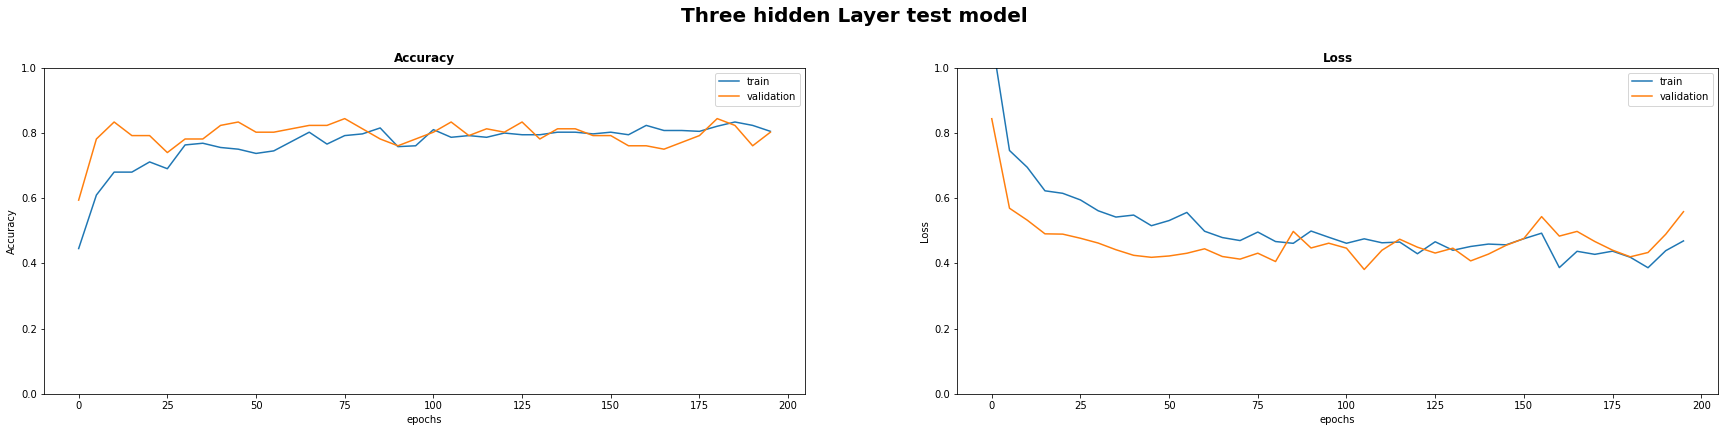

In [16]:
# printing the plot from the trained model
iterations = np.arange(start=0, stop=epochs)
History["iterations"] = iterations
draw_plot("Three hidden Layer test model", History, k=5)

###Confusion Matirx


#### a matrix that shows the TP, Tn, FP and FN values
#### then we will calculate the precision, recall and f1-score along with the macro avg of multi class classification

In [17]:
Y_Pred = np.argmax(model.predict(X_Val), axis=1)
print("\n Confusion matrix:\n\n", metrics.confusion_matrix(Y_Val, Y_Pred), "\n\n\n\n Metrics:\n")
print(metrics.classification_report(Y_Val, Y_Pred, digits=3))


 Confusion matrix:

 [[14  0 10]
 [ 0 20  8]
 [ 2  4 38]] 



 Metrics:

              precision    recall  f1-score   support

           0      0.875     0.583     0.700        24
           1      0.833     0.714     0.769        28
           2      0.679     0.864     0.760        44

    accuracy                          0.750        96
   macro avg      0.796     0.720     0.743        96
weighted avg      0.773     0.750     0.748        96



### some functions for creating tables

In [18]:
# a function for printing tables
def print_table(data, head=['Number of Layers', 'Train Loss', 'Train Accuracy', 'Val Loss', 'Val Accuracy'],
                rows=['2', '3', '5']):
    # for p in data:
    #     print(p)
    table = [head]
    for i in range(len(data)):
        row_list = [rows[i]]
        for j in range(len(data[i])):
            row_list.append(data[i][j][-1])
        table.append(row_list)
    return tabulate(table, headers='firstrow', tablefmt='fancy_grid')


# a function for turning dictionary of costs and accuracies to matrix
def dic_to_matrix(data):
    tmp = [data["loss_train"], data["accuracy_train"], data["loss_val"], data["accuracy_val"]]
    # print(tmp)
    return tmp


# a function for find the maximum values according to diffrent parameters
def find_max_i(data):
    max_train_accuray = np.where(data["accuracy"] == np.max(data["accuracy"]))[0][0]
    index_max_train_accuray = np.argmax(data["accuracy"])

    max_val_accuracy = np.where(data["val_accuracy"] == np.max(data["val_accuracy"]))[0][0]
    index_max_val_accuracy = np.argmax(data["val_accuracy"])

    min_train_loss = np.where(data["loss"] == np.min(data["loss"]))[0][0]
    index_min_train_loss = np.argmin(data["loss"])

    min_val_loss = np.where(data["val_loss"] == np.min(data["val_loss"]))[0][0]
    index_min_val_loss = np.argmin(data["val_loss"])

    # creating the columns according to the report
    accuray_loss_train__min_loss = ["(epoch index:" + str(index_min_train_loss) + ")\n" +
                                    "Accuracy: " + str(data["accuracy"][min_train_loss]) + "\nLoss: " + str(data["loss"][min_train_loss])]
    accuray_loss_val__min_loss = ["(epoch index:" + str(index_min_val_loss) + ")\n" +
                                  "Accuracy: " + str(data["val_accuracy"][min_val_loss]) + "\nLoss: " + str(data["val_loss"][min_val_loss])]
    accuray_loss_train__max_accuracy = ["(epoch index:" + str(index_max_train_accuray) + ")\n" +
                                        "Accuracy: " + str(data["accuracy"][max_train_accuray]) + "\nLoss: " + str(data["loss"][max_train_accuray])]
    accuray_loss_val__max_accuracy = ["(epoch index:" + str(index_max_val_accuracy) + ")\n" +
                                      "Accuracy: " + str(data["val_accuracy"][max_val_accuracy]) + "\nLoss: " + str(data["val_loss"][max_val_accuracy])]

    return [accuray_loss_train__min_loss, accuray_loss_val__min_loss, accuray_loss_train__max_accuracy,
            accuray_loss_val__max_accuracy]


print(colored("\n\nThree hidden layer Test models:\n", 'yellow', attrs=['bold']), "\nalpha =", learning_rate, "\n")
print(print_table(
    [find_max_i(History)],
    head=["Number of Layers",
          "Accuracy and Loss of train set\naccording to Min train Loss",
          "Accuracy and Loss of val set\naccording to Min val Loss",
          "Accuracy and Loss of train set\naccording to Max train Accuracy",
          "Accuracy and Loss of val set\naccording to Max val Accuracy"], rows=["test model"]))




Three hidden layer Test models:
 
alpha = 0.01 

╒════════════════════╤══════════════════════════════════╤════════════════════════════════╤═══════════════════════════════════╤═════════════════════════════════╕
│ Number of Layers   │ Accuracy and Loss of train set   │ Accuracy and Loss of val set   │ Accuracy and Loss of train set    │ Accuracy and Loss of val set    │
│                    │ according to Min train Loss      │ according to Min val Loss      │ according to Max train Accuracy   │ according to Max val Accuracy   │
╞════════════════════╪══════════════════════════════════╪════════════════════════════════╪═══════════════════════════════════╪═════════════════════════════════╡
│ test model         │ (epoch index:187)                │ (epoch index:105)              │ (epoch index:166)                 │ (epoch index:104)               │
│                    │ Accuracy: 0.8229166865348816     │ Accuracy: 0.8333333134651184   │ Accuracy: 0.8541666865348816      │ Accuracy: 0.85416

# ***Tuning Model***

## N Hidden Layer Models

### Three hidden layer model

In [19]:
def three_hidden_layer_model(architecture=[16, 20, 32, 20, 3], dropout=0, activation="relu", kernel_regularizer=None, batch_normalization=False):

    # without batch normalization
    if not batch_normalization:
        model = tf.keras.models.Sequential([
            tf.keras.layers.InputLayer(input_shape=(architecture[0],), ),
            tf.keras.layers.Dense(architecture[1], activation=activation, kernel_regularizer=kernel_regularizer),
            tf.keras.layers.Dropout(dropout),
            tf.keras.layers.Dense(architecture[2], activation=activation, kernel_regularizer=kernel_regularizer),
            tf.keras.layers.Dropout(dropout),
            tf.keras.layers.Dense(architecture[3], activation=activation, kernel_regularizer=kernel_regularizer),
            tf.keras.layers.Dropout(dropout),
            tf.keras.layers.Dense(architecture[4], activation='softmax'), ])
        return model
    
    # with batch normalization
    elif batch_normalization:
        model = tf.keras.models.Sequential([
            tf.keras.layers.InputLayer(input_shape=(architecture[0],), ),
            tf.keras.layers.Dense(architecture[1], activation=activation, kernel_regularizer=kernel_regularizer),
           tf.keras.layers.BatchNormalization(axis=1),
            tf.keras.layers.Dense(architecture[2], activation=activation, kernel_regularizer=kernel_regularizer),
           tf.keras.layers.BatchNormalization(axis=1),
            tf.keras.layers.Dense(architecture[3], activation=activation, kernel_regularizer=kernel_regularizer),
           tf.keras.layers.BatchNormalization(axis=1),
            tf.keras.layers.Dense(architecture[4], activation='softmax'), ])
        return model

### four hidden layer model

In [20]:
def four_hidden_layer_model(architecture=[16, 32, 40, 12, 8, 3], dropout=0, activation="relu", kernel_regularizer=None, batch_normalization=False):

    # without batch normalization
    if not batch_normalization:
        model = tf.keras.models.Sequential([
            tf.keras.layers.InputLayer(input_shape=(architecture[0],), ),
            tf.keras.layers.Dense(architecture[1], activation=activation, kernel_regularizer=kernel_regularizer),
            tf.keras.layers.Dropout(dropout),
            tf.keras.layers.Dense(architecture[2], activation=activation, kernel_regularizer=kernel_regularizer),
            tf.keras.layers.Dropout(dropout),
            tf.keras.layers.Dense(architecture[3], activation=activation, kernel_regularizer=kernel_regularizer),
            tf.keras.layers.Dropout(dropout),
            tf.keras.layers.Dense(architecture[4], activation=activation, kernel_regularizer=kernel_regularizer),
            tf.keras.layers.Dropout(dropout),
            tf.keras.layers.Dense(architecture[5], activation='softmax'), ])

        return model

    # with batch normalization
    elif batch_normalization:
        model = tf.keras.models.Sequential([
            tf.keras.layers.InputLayer(input_shape=(architecture[0],), ),
            tf.keras.layers.Dense(architecture[1], activation=activation, kernel_regularizer=kernel_regularizer),
           tf.keras.layers.BatchNormalization(axis=1),
            tf.keras.layers.Dense(architecture[2], activation=activation, kernel_regularizer=kernel_regularizer),
           tf.keras.layers.BatchNormalization(axis=1),
            tf.keras.layers.Dense(architecture[3], activation=activation, kernel_regularizer=kernel_regularizer),
           tf.keras.layers.BatchNormalization(axis=1),
            tf.keras.layers.Dense(architecture[4], activation=activation, kernel_regularizer=kernel_regularizer),
           tf.keras.layers.BatchNormalization(axis=1),
            tf.keras.layers.Dense(architecture[5], activation='softmax'), ])

    return model


### five hidden layer model

In [21]:
def five_hidden_layer_model(architecture=[16, 20, 30, 40, 30, 20, 3], dropout=0, activation="relu", kernel_regularizer=None, batch_normalization=False):
    
    # without batch normalization
    if not batch_normalization:
        model = tf.keras.models.Sequential([
            tf.keras.layers.InputLayer(input_shape=(architecture[0],), ),
            tf.keras.layers.Dense(architecture[1], activation=activation, kernel_regularizer=kernel_regularizer),
            tf.keras.layers.Dropout(dropout),
            tf.keras.layers.Dense(architecture[2], activation=activation, kernel_regularizer=kernel_regularizer),
            tf.keras.layers.Dropout(dropout),
            tf.keras.layers.Dense(architecture[3], activation=activation, kernel_regularizer=kernel_regularizer),
            tf.keras.layers.Dropout(dropout),
            tf.keras.layers.Dense(architecture[4], activation=activation, kernel_regularizer=kernel_regularizer),
            tf.keras.layers.Dropout(dropout),
            tf.keras.layers.Dense(architecture[5], activation=activation, kernel_regularizer=kernel_regularizer),
            tf.keras.layers.Dropout(dropout),
            tf.keras.layers.Dense(architecture[6], activation='softmax'), ])
        return model
    # with batch normalization
    elif batch_normalization:
        model = tf.keras.models.Sequential([
            tf.keras.layers.InputLayer(input_shape=(architecture[0],), ),
            tf.keras.layers.Dense(architecture[1], activation=activation, kernel_regularizer=kernel_regularizer),
           tf.keras.layers.BatchNormalization(axis=1),
            tf.keras.layers.Dense(architecture[2], activation=activation, kernel_regularizer=kernel_regularizer),
           tf.keras.layers.BatchNormalization(axis=1),
            tf.keras.layers.Dense(architecture[3], activation=activation, kernel_regularizer=kernel_regularizer),
           tf.keras.layers.BatchNormalization(axis=1),
            tf.keras.layers.Dense(architecture[4], activation=activation, kernel_regularizer=kernel_regularizer),
           tf.keras.layers.BatchNormalization(axis=1),
            tf.keras.layers.Dense(architecture[5], activation=activation, kernel_regularizer=kernel_regularizer),
           tf.keras.layers.BatchNormalization(axis=1),
            tf.keras.layers.Dense(architecture[6], activation='softmax'), ])
        return model


###N hiddden layer model

In [22]:
def n_hidden_layer_model(optimizer, architecture=[16, 20, 32, 20, 3], learning_rate=learning_rate, dropout=0, activation="relu", kernel_regularization=False, epochs=epochs, batch_normalization=False,
                         Print=False, k=1, return_model=False):
    # clearing keras history
    if not return_model:
        tf.keras.backend.clear_session()

    # setting random seed
    tf.random.set_seed(seed)
    np.random.seed(seed)

    kernel_regularizer = None
    if kernel_regularization:
        kernel_regularizer = tf.keras.regularizers.L2(l2=0.01)

    # create model
    model = tf.keras.models.Sequential([])

    # three hidden layer model
    if len(architecture) == 5:
        model = three_hidden_layer_model(architecture=architecture, activation=activation, dropout=dropout, kernel_regularizer=kernel_regularizer, batch_normalization=batch_normalization)

    # four hidden layer model
    elif len(architecture) == 6:
        model = four_hidden_layer_model(architecture=architecture, activation=activation, dropout=dropout, kernel_regularizer=kernel_regularizer, batch_normalization=batch_normalization)

    # five hidden layer model
    elif len(architecture) == 7:
        model = five_hidden_layer_model(architecture=architecture, activation=activation, dropout=dropout, kernel_regularizer=kernel_regularizer, batch_normalization=batch_normalization)

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    if not return_model:
        title = f"\n{len(architecture) - 2} Hidden Layers {architecture}, Learning Rate={learning_rate}, Activation: {activation}, Optimizer: {optimizer.get_config()['name']}, L2 Regularization: {kernel_regularization}, Dropout:{dropout}"
        print(title)
        # training the model
        history = model.fit(X_Train, Y_Train, epochs=epochs, verbose=0, validation_data=(X_Val, Y_Val),
                            callbacks=[TqdmCallback(verbose=0)])
        # print plot and other metrics for model
        iterations = np.arange(start=0, stop=epochs)
        History = dic_to_np_array(history.history)
        History["iterations"] = iterations
        if Print:
            draw_plot(title, History, k=k)
            Y_Pred = np.argmax(model.predict(X_Val), axis=1)
        print("\n",metrics.confusion_matrix(Y_Val, Y_Pred))
        print("\n", metrics.classification_report(Y_Val, Y_Pred, digits=3), "\n\n\n\n\n")
        return History
    else:
        return model

## Different architectures for 3,4 and 5 hidden layer models


3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.01, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

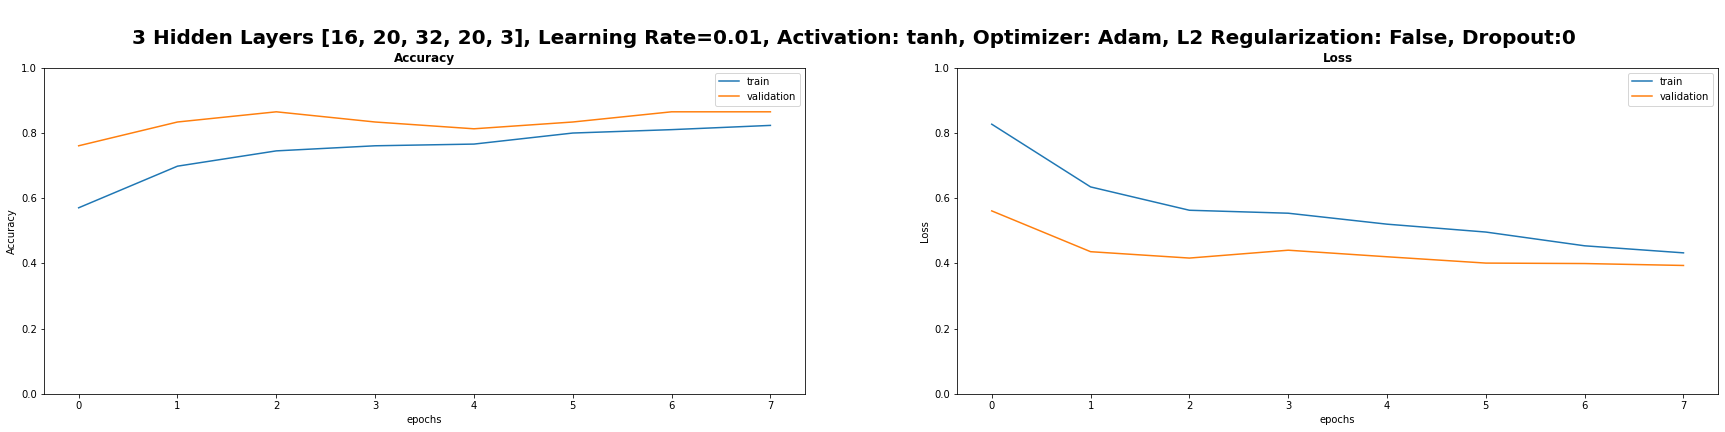


 [[19  0  5]
 [ 0 24  4]
 [ 2  2 40]]

               precision    recall  f1-score   support

           0      0.905     0.792     0.844        24
           1      0.923     0.857     0.889        28
           2      0.816     0.909     0.860        44

    accuracy                          0.865        96
   macro avg      0.881     0.853     0.865        96
weighted avg      0.870     0.865     0.865        96
 






3 Hidden Layers [16, 32, 48, 8, 3], Learning Rate=0.01, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

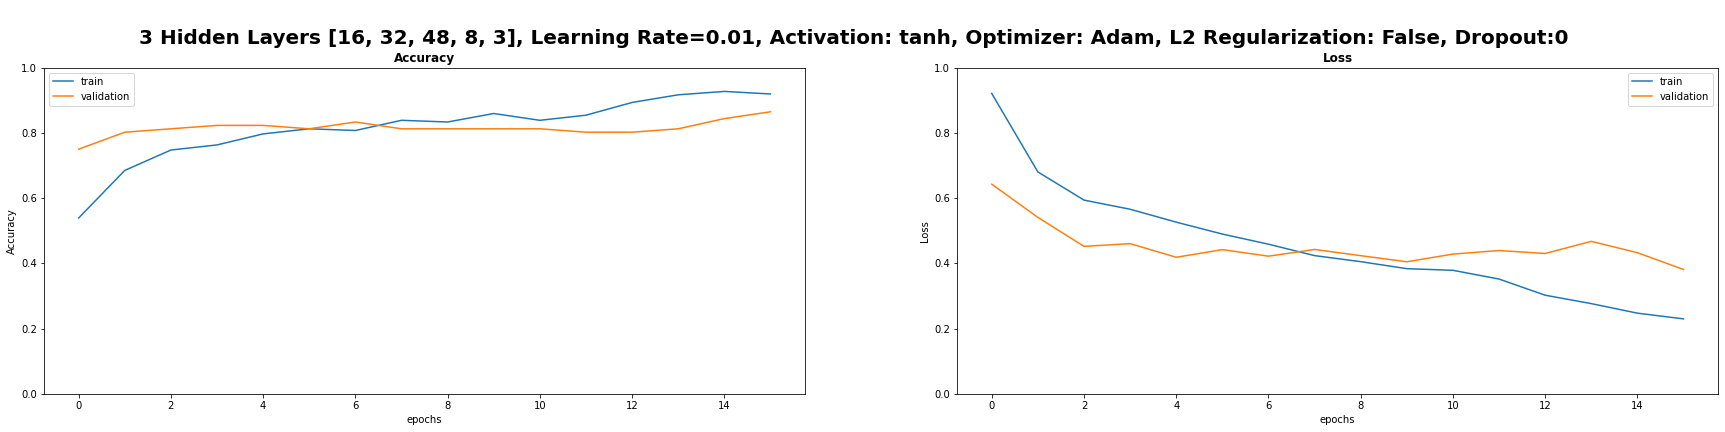


 [[20  0  4]
 [ 0 25  3]
 [ 3  3 38]]

               precision    recall  f1-score   support

           0      0.870     0.833     0.851        24
           1      0.893     0.893     0.893        28
           2      0.844     0.864     0.854        44

    accuracy                          0.865        96
   macro avg      0.869     0.863     0.866        96
weighted avg      0.865     0.865     0.865        96
 






3 Hidden Layers [16, 40, 50, 20, 3], Learning Rate=0.01, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

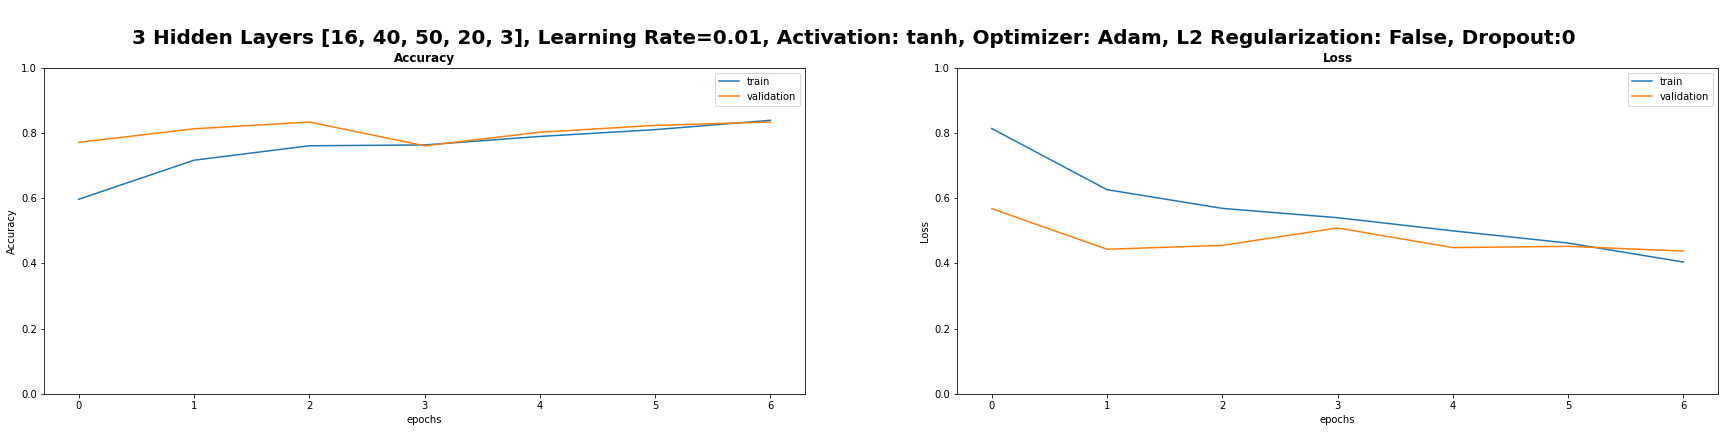


 [[20  0  4]
 [ 0 24  4]
 [ 6  2 36]]

               precision    recall  f1-score   support

           0      0.769     0.833     0.800        24
           1      0.923     0.857     0.889        28
           2      0.818     0.818     0.818        44

    accuracy                          0.833        96
   macro avg      0.837     0.836     0.836        96
weighted avg      0.837     0.833     0.834        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.01, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

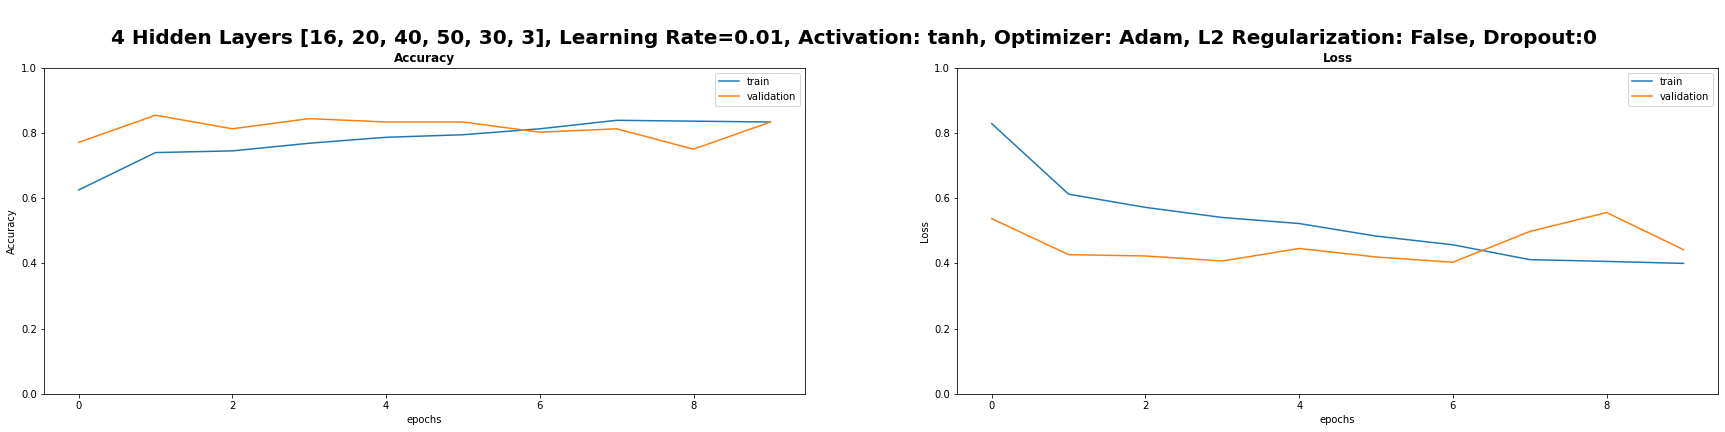


 [[17  0  7]
 [ 0 23  5]
 [ 2  2 40]]

               precision    recall  f1-score   support

           0      0.895     0.708     0.791        24
           1      0.920     0.821     0.868        28
           2      0.769     0.909     0.833        44

    accuracy                          0.833        96
   macro avg      0.861     0.813     0.831        96
weighted avg      0.845     0.833     0.833        96
 






4 Hidden Layers [16, 30, 50, 40, 10, 3], Learning Rate=0.01, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

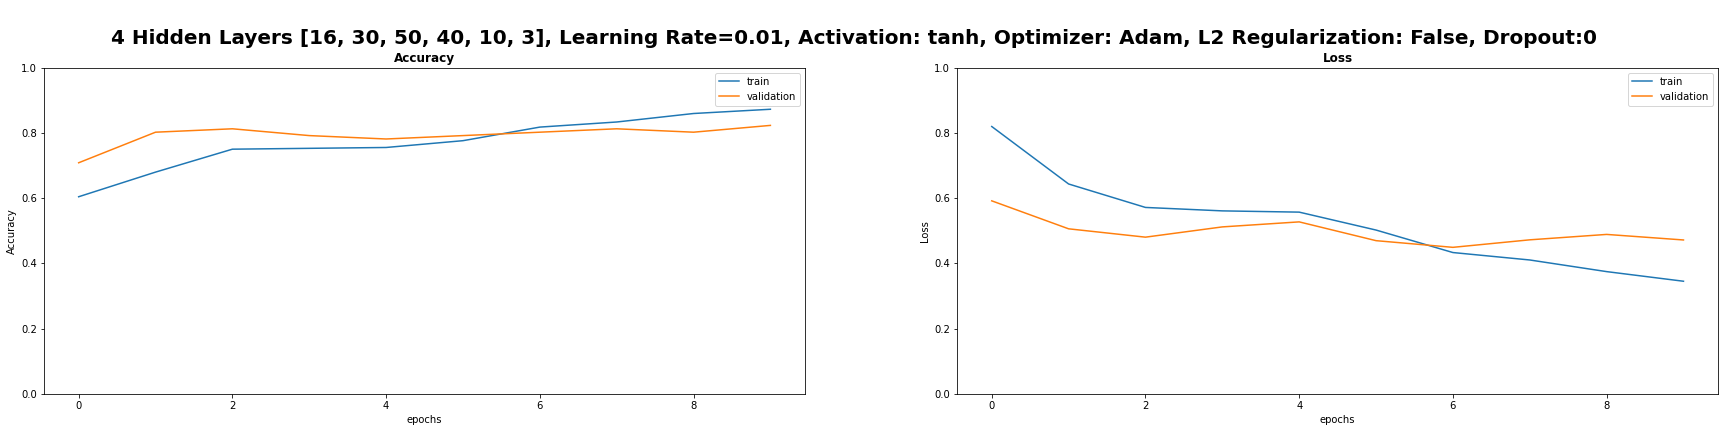


 [[21  0  3]
 [ 0 22  6]
 [ 6  2 36]]

               precision    recall  f1-score   support

           0      0.778     0.875     0.824        24
           1      0.917     0.786     0.846        28
           2      0.800     0.818     0.809        44

    accuracy                          0.823        96
   macro avg      0.831     0.826     0.826        96
weighted avg      0.828     0.823     0.823        96
 






4 Hidden Layers [16, 32, 40, 12, 8, 3], Learning Rate=0.01, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

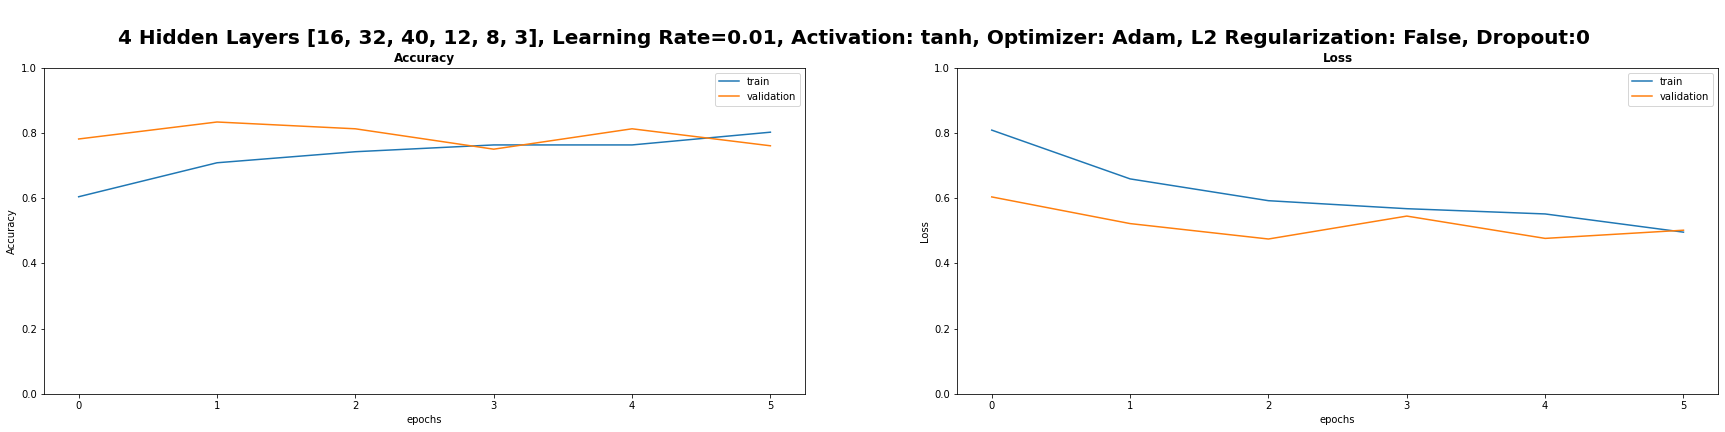


 [[20  0  4]
 [ 0 24  4]
 [ 9  6 29]]

               precision    recall  f1-score   support

           0      0.690     0.833     0.755        24
           1      0.800     0.857     0.828        28
           2      0.784     0.659     0.716        44

    accuracy                          0.760        96
   macro avg      0.758     0.783     0.766        96
weighted avg      0.765     0.760     0.758        96
 






5 Hidden Layers [16, 100, 200, 500, 200, 50, 3], Learning Rate=0.01, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

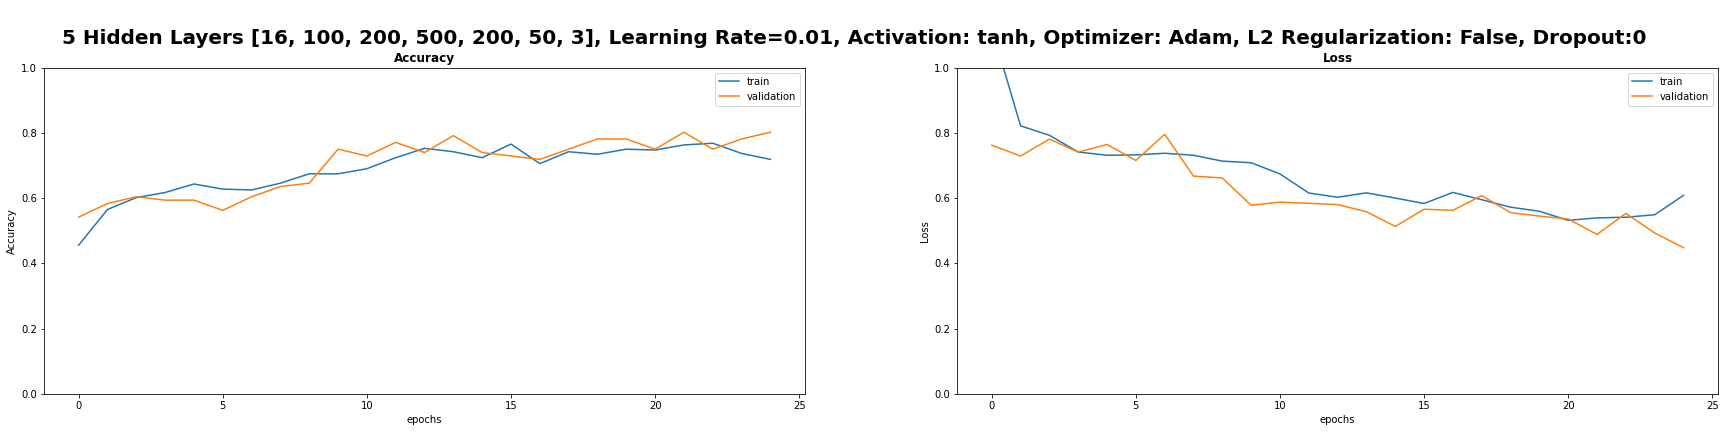


 [[19  0  5]
 [ 0 25  3]
 [ 7  4 33]]

               precision    recall  f1-score   support

           0      0.731     0.792     0.760        24
           1      0.862     0.893     0.877        28
           2      0.805     0.750     0.776        44

    accuracy                          0.802        96
   macro avg      0.799     0.812     0.805        96
weighted avg      0.803     0.802     0.802        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.01, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

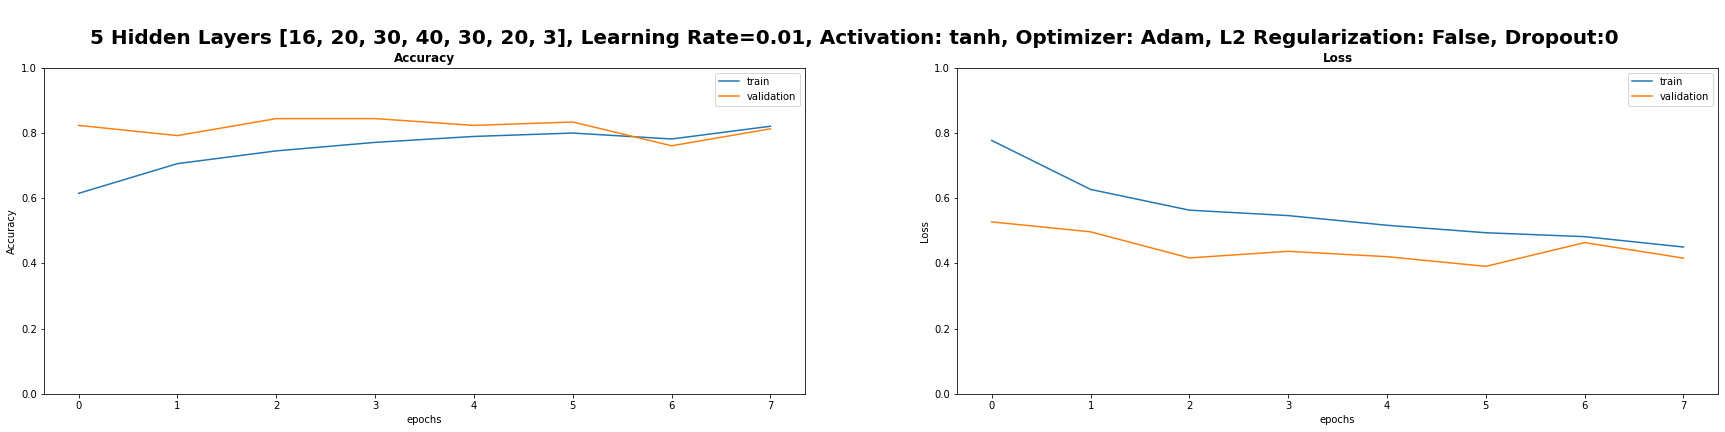


 [[18  0  6]
 [ 0 24  4]
 [ 4  4 36]]

               precision    recall  f1-score   support

           0      0.818     0.750     0.783        24
           1      0.857     0.857     0.857        28
           2      0.783     0.818     0.800        44

    accuracy                          0.812        96
   macro avg      0.819     0.808     0.813        96
weighted avg      0.813     0.812     0.812        96
 






5 Hidden Layers [16, 32, 36, 40, 30, 10, 3], Learning Rate=0.01, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

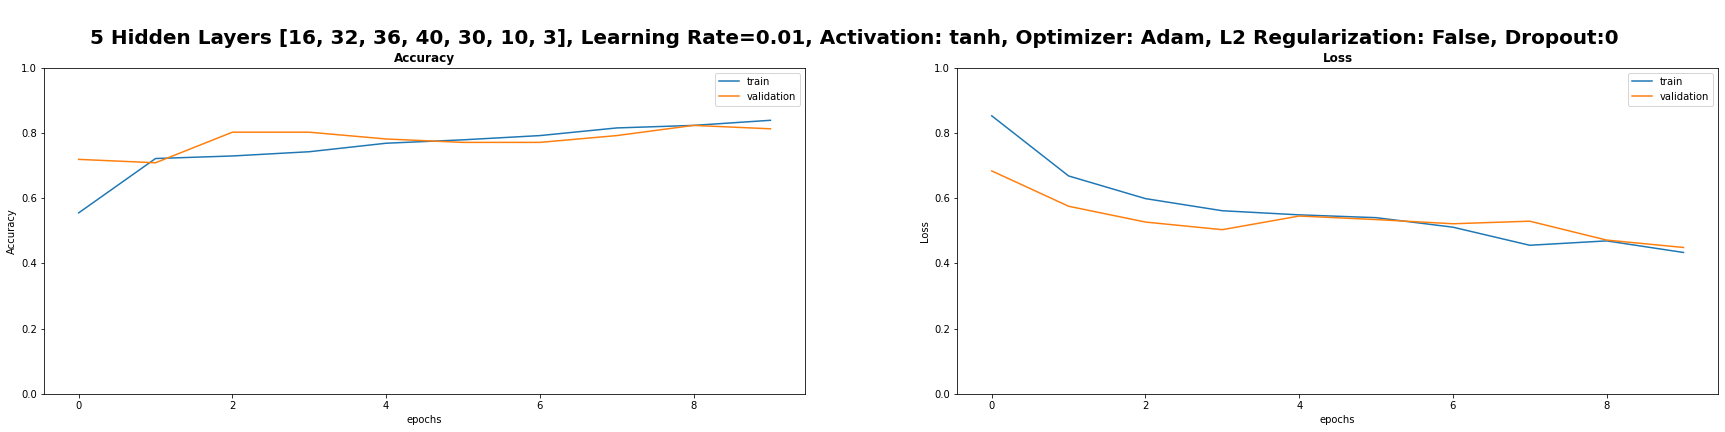


 [[18  0  6]
 [ 0 25  3]
 [ 6  3 35]]

               precision    recall  f1-score   support

           0      0.750     0.750     0.750        24
           1      0.893     0.893     0.893        28
           2      0.795     0.795     0.795        44

    accuracy                          0.812        96
   macro avg      0.813     0.813     0.813        96
weighted avg      0.812     0.812     0.812        96
 







different architectures for 3,4 and 5 hidden layer models:
 
alpha = 0.01 

╒════════════════════════════════════╤══════════════════════════════════╤════════════════════════════════╤═══════════════════════════════════╤═════════════════════════════════╕
│ Number of Layers                   │ Accuracy and Loss of train set   │ Accuracy and Loss of val set   │ Accuracy and Loss of train set    │ Accuracy and Loss of val set    │
│                                    │ according to Min train Loss      │ according to Min val Loss      │ according to Max train Accuracy  

In [23]:
# print plots
print_plot = True

# Three hidden layers
Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_three_1_arc = n_hidden_layer_model(optimizer=Adam, architecture=[16, 20, 32, 20, 3], activation="tanh", learning_rate=learning_rate, epochs=8, Print=print_plot)

Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_three_2_arc = n_hidden_layer_model(optimizer=Adam, architecture=[16, 32, 48, 8, 3], activation="tanh", learning_rate=learning_rate, epochs=16, Print=print_plot)

Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_three_3_arc = n_hidden_layer_model(optimizer=Adam, architecture=[16, 40, 50, 20, 3], activation="tanh", learning_rate=learning_rate, epochs=7, Print=print_plot)

#
# Four hidden layers
Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_four_1_arc = n_hidden_layer_model(optimizer=Adam, architecture=[16, 20, 40, 50, 30, 3], activation="tanh", learning_rate=learning_rate, epochs=10, Print=print_plot)

Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_four_2_arc = n_hidden_layer_model(optimizer=Adam, architecture=[16, 30, 50, 40, 10, 3], activation="tanh", learning_rate=learning_rate, epochs=10, Print=print_plot)

Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_four_3_arc = n_hidden_layer_model(optimizer=Adam, architecture=[16, 32, 40, 12, 8, 3], activation="tanh", learning_rate=learning_rate, epochs=6, Print=print_plot)

#
# Five hidden layers
Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_five_1_arc = n_hidden_layer_model(optimizer=Adam, architecture=[16, 100, 200, 500, 200, 50, 3], activation="tanh", learning_rate=learning_rate, epochs=25, Print=print_plot)

Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_five_2_arc = n_hidden_layer_model(optimizer=Adam, architecture=[16, 20, 30, 40, 30, 20, 3], activation="tanh", learning_rate=learning_rate, epochs=8, Print=print_plot)

Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_five_3_arc = n_hidden_layer_model(optimizer=Adam, architecture=[16, 32, 36, 40, 30, 10, 3], activation="tanh", learning_rate=learning_rate, epochs=10, Print=print_plot)

#
print(colored("\n\ndifferent architectures for 3,4 and 5 hidden layer models:\n", 'yellow', attrs=['bold']), "\nalpha =", learning_rate, "\n")
print(print_table(
    [find_max_i(His_three_1_arc), find_max_i(His_three_2_arc), find_max_i(His_three_3_arc), find_max_i(His_four_1_arc), find_max_i(His_four_2_arc), find_max_i(His_four_3_arc),
     find_max_i(His_five_1_arc), find_max_i(His_five_2_arc), find_max_i(His_five_3_arc), ],
    head=["Number of Layers",
          "Accuracy and Loss of train set\naccording to Min train Loss",
          "Accuracy and Loss of val set\naccording to Min val Loss",
          "Accuracy and Loss of train set\naccording to Max train Accuracy",
          "Accuracy and Loss of val set\naccording to Max val Accuracy"],
    rows=["3: [16, 20, 32, 20, 3]", "3: [16, 32, 48, 8, 3]", "3: [16, 40, 50, 20, 3]",
          "4: [16, 20, 40, 50, 30, 3]", "4: [16, 30, 50, 40, 10, 3]", "4: [16, 32, 40, 12, 8, 3]",
          "5: [16, 100, 200, 500, 200, 50, 3]", "5: [16, 20, 30, 40, 30, 20, 3]", "5: [16, 32, 36, 40, 30, 10, 3]"]))


## Different activation functions and optimizers for 3,4 and 5 hidden layer model

### Different activation functions and optimizers for three hidden layer model





3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.01, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

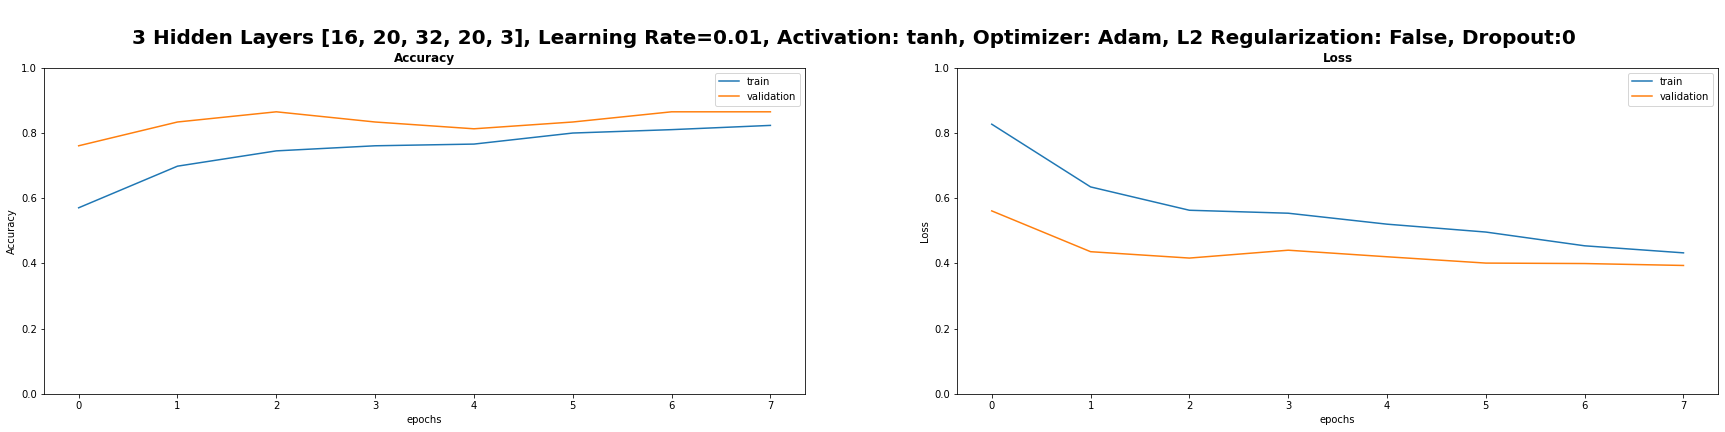


 [[19  0  5]
 [ 0 24  4]
 [ 2  2 40]]

               precision    recall  f1-score   support

           0      0.905     0.792     0.844        24
           1      0.923     0.857     0.889        28
           2      0.816     0.909     0.860        44

    accuracy                          0.865        96
   macro avg      0.881     0.853     0.865        96
weighted avg      0.870     0.865     0.865        96
 






3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.01, Activation: relu, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

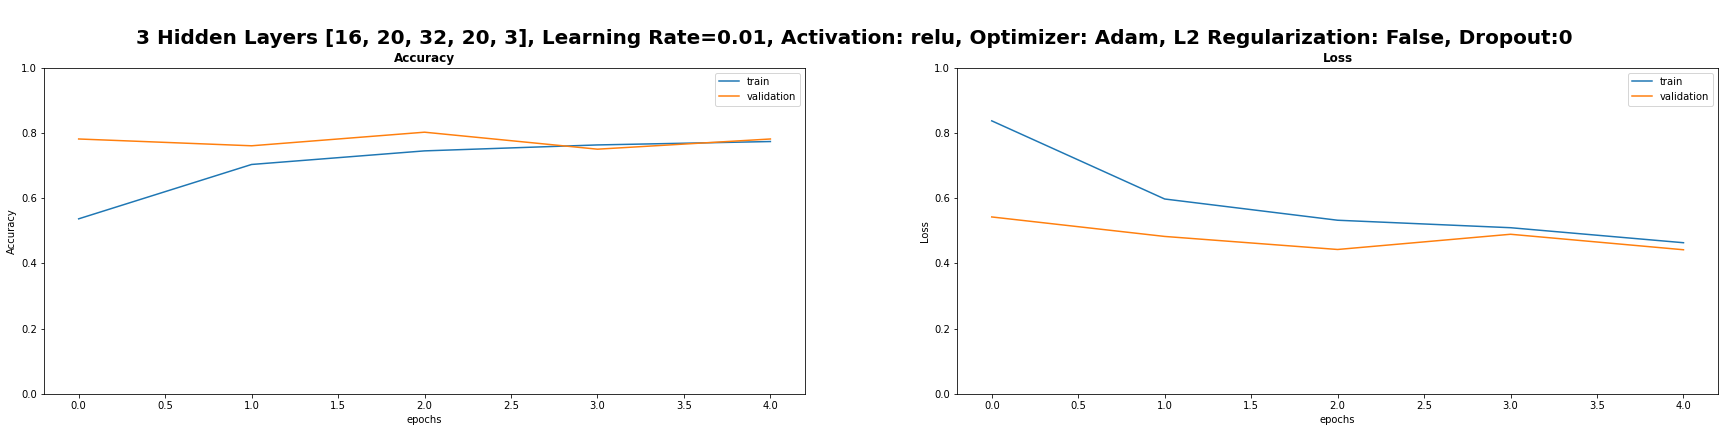


 [[22  0  2]
 [ 0 25  3]
 [12  4 28]]

               precision    recall  f1-score   support

           0      0.647     0.917     0.759        24
           1      0.862     0.893     0.877        28
           2      0.848     0.636     0.727        44

    accuracy                          0.781        96
   macro avg      0.786     0.815     0.788        96
weighted avg      0.802     0.781     0.779        96
 






3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.01, Activation: sigmoid, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

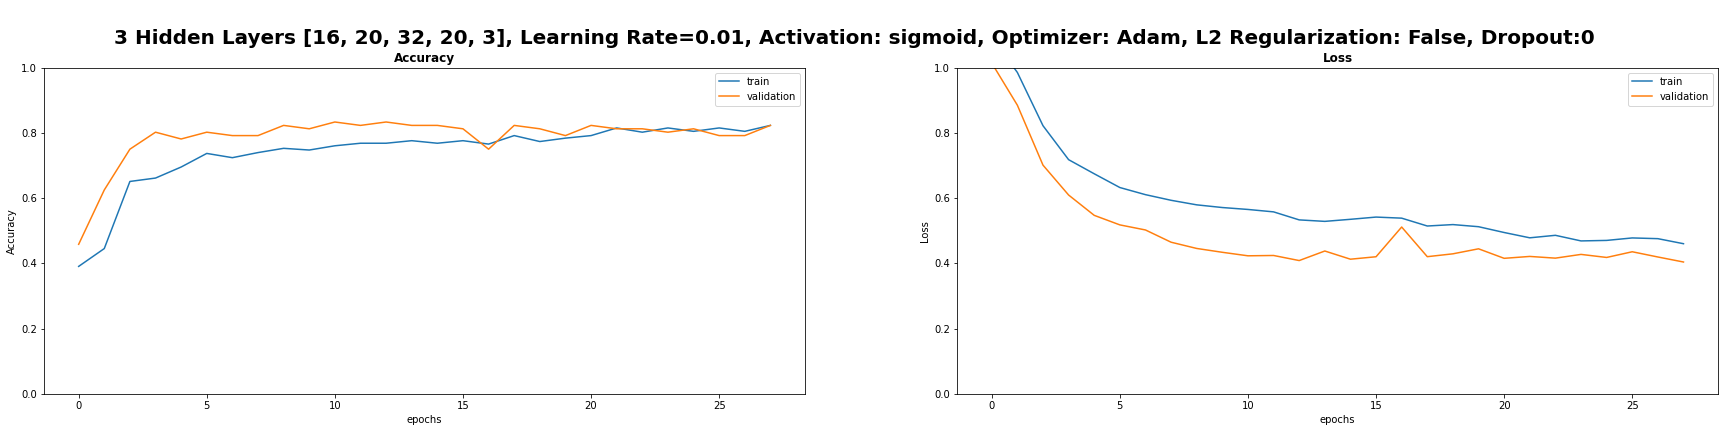


 [[20  0  4]
 [ 0 24  4]
 [ 6  3 35]]

               precision    recall  f1-score   support

           0      0.769     0.833     0.800        24
           1      0.889     0.857     0.873        28
           2      0.814     0.795     0.805        44

    accuracy                          0.823        96
   macro avg      0.824     0.829     0.826        96
weighted avg      0.825     0.823     0.823        96
 






3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.01, Activation: tanh, Optimizer: RMSprop, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

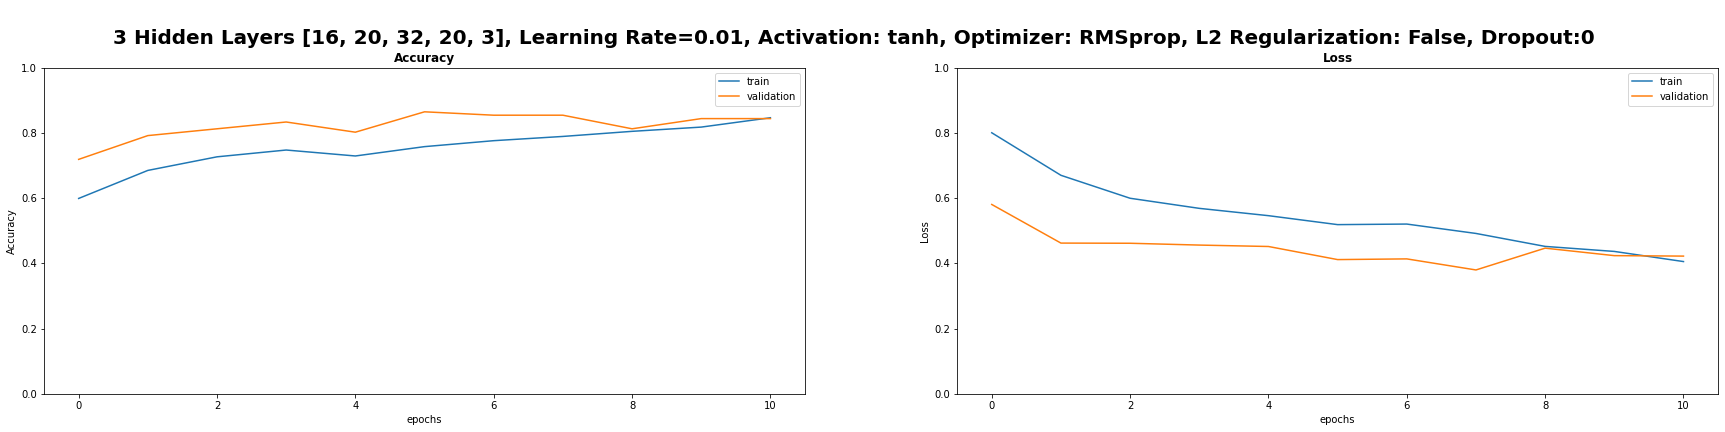


 [[18  0  6]
 [ 0 21  7]
 [ 1  1 42]]

               precision    recall  f1-score   support

           0      0.947     0.750     0.837        24
           1      0.955     0.750     0.840        28
           2      0.764     0.955     0.848        44

    accuracy                          0.844        96
   macro avg      0.889     0.818     0.842        96
weighted avg      0.865     0.844     0.843        96
 






3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.01, Activation: relu, Optimizer: RMSprop, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

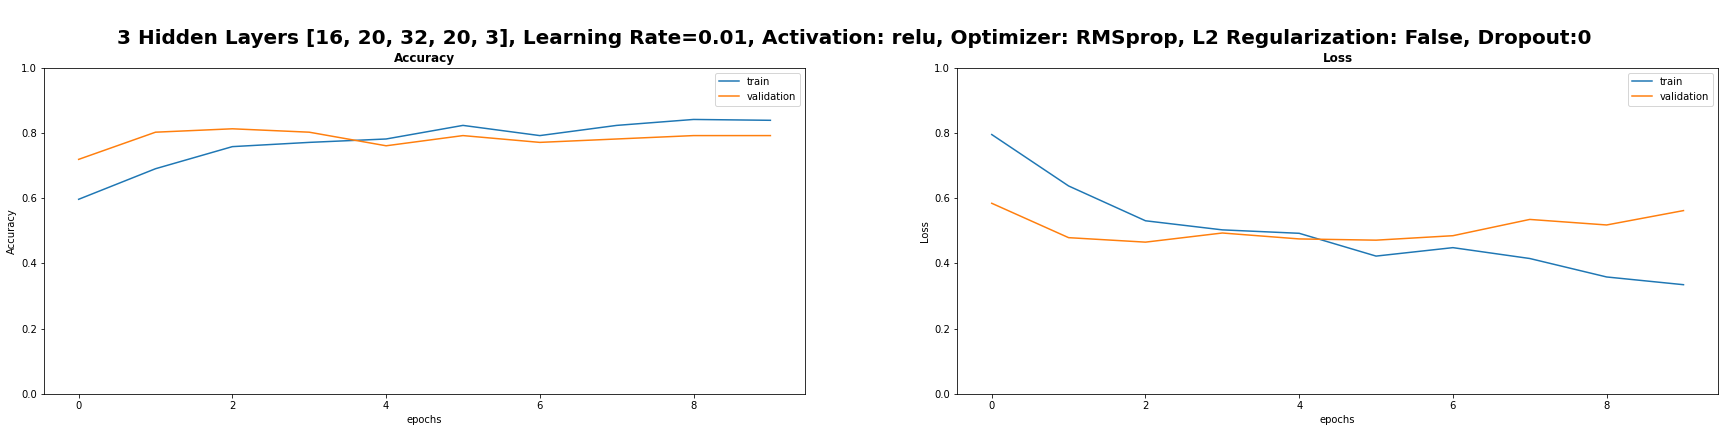


 [[16  0  8]
 [ 0 20  8]
 [ 4  0 40]]

               precision    recall  f1-score   support

           0      0.800     0.667     0.727        24
           1      1.000     0.714     0.833        28
           2      0.714     0.909     0.800        44

    accuracy                          0.792        96
   macro avg      0.838     0.763     0.787        96
weighted avg      0.819     0.792     0.792        96
 






3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.01, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

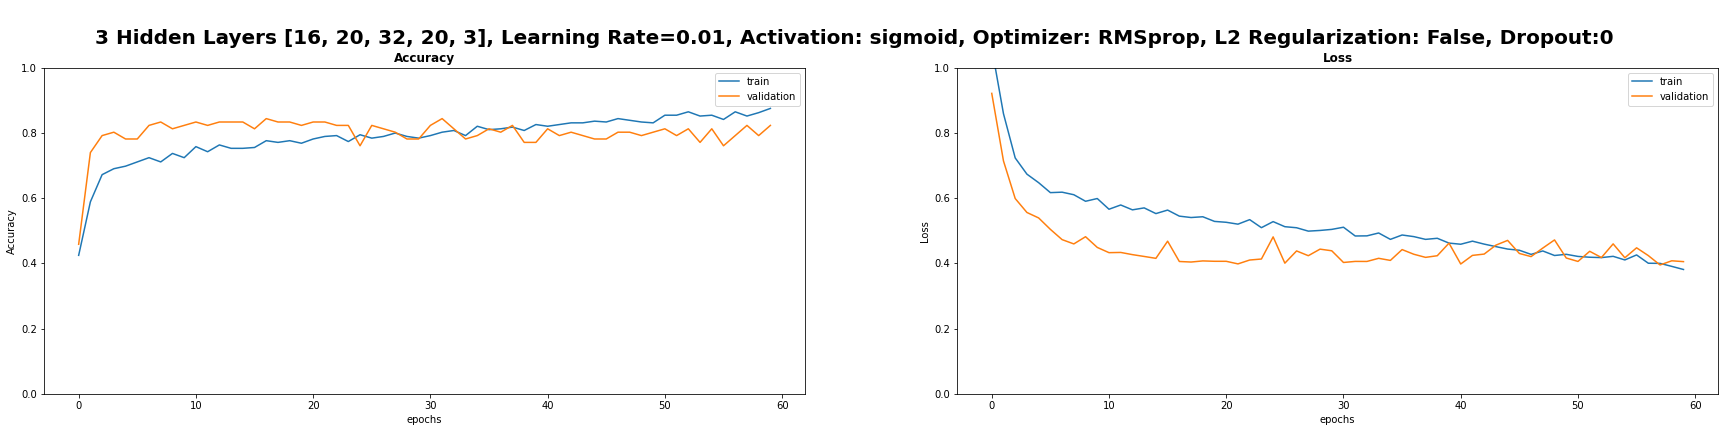


 [[20  0  4]
 [ 0 22  6]
 [ 3  4 37]]

               precision    recall  f1-score   support

           0      0.870     0.833     0.851        24
           1      0.846     0.786     0.815        28
           2      0.787     0.841     0.813        44

    accuracy                          0.823        96
   macro avg      0.834     0.820     0.826        96
weighted avg      0.825     0.823     0.823        96
 






3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.01, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

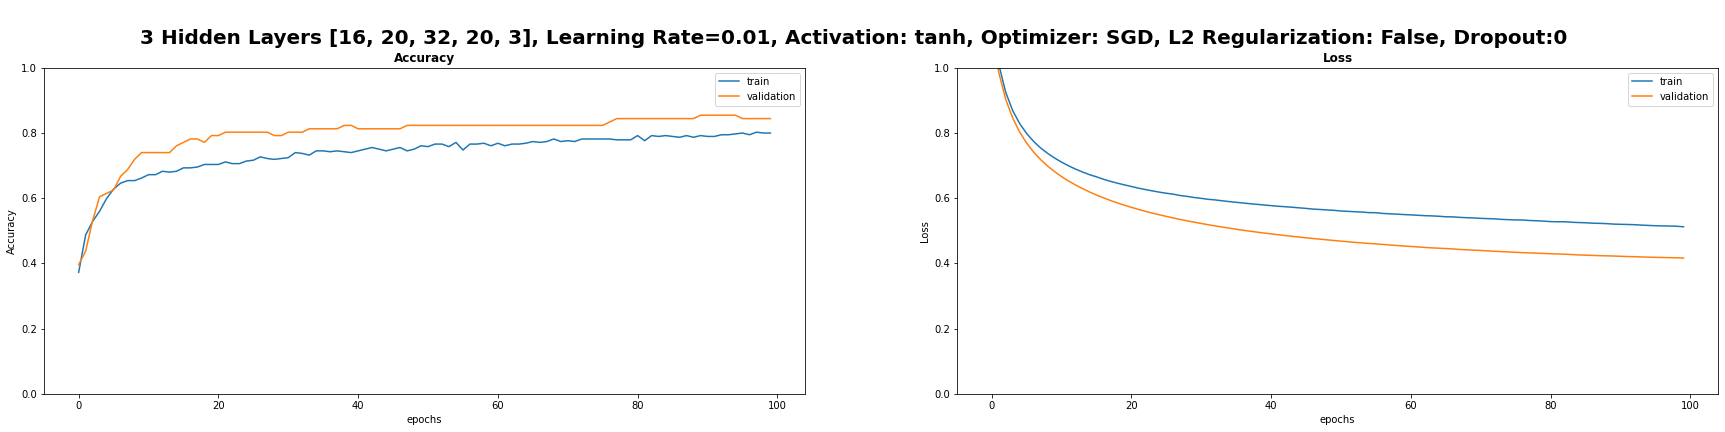


 [[21  0  3]
 [ 0 25  3]
 [ 6  3 35]]

               precision    recall  f1-score   support

           0      0.778     0.875     0.824        24
           1      0.893     0.893     0.893        28
           2      0.854     0.795     0.824        44

    accuracy                          0.844        96
   macro avg      0.841     0.854     0.847        96
weighted avg      0.846     0.844     0.844        96
 






3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.01, Activation: relu, Optimizer: SGD, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

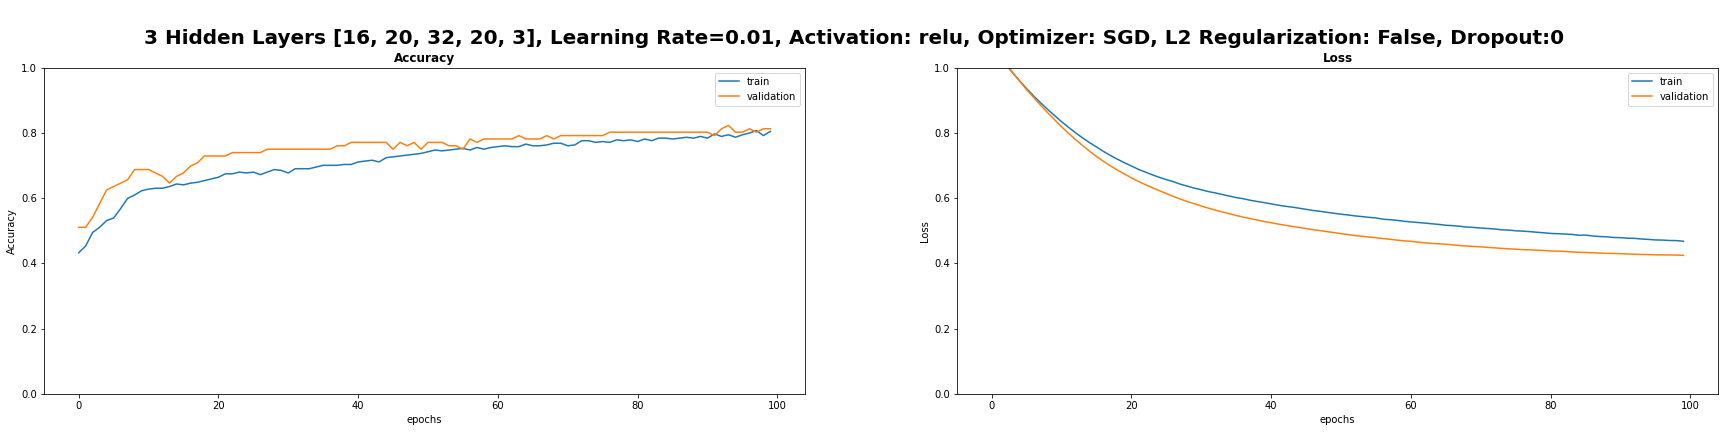


 [[17  0  7]
 [ 0 24  4]
 [ 5  2 37]]

               precision    recall  f1-score   support

           0      0.773     0.708     0.739        24
           1      0.923     0.857     0.889        28
           2      0.771     0.841     0.804        44

    accuracy                          0.812        96
   macro avg      0.822     0.802     0.811        96
weighted avg      0.816     0.812     0.813        96
 






3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.01, Activation: sigmoid, Optimizer: SGD, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

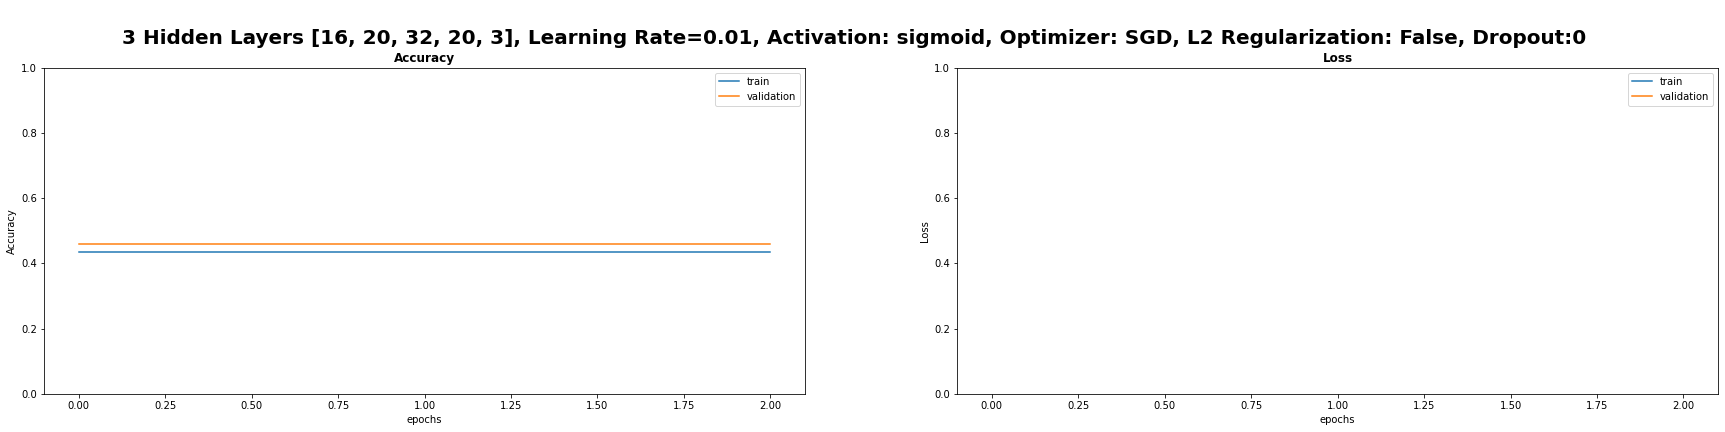


 [[ 0  0 24]
 [ 0  0 28]
 [ 0  0 44]]

               precision    recall  f1-score   support

           0      0.000     0.000     0.000        24
           1      0.000     0.000     0.000        28
           2      0.458     1.000     0.629        44

    accuracy                          0.458        96
   macro avg      0.153     0.333     0.210        96
weighted avg      0.210     0.458     0.288        96
 







Three hidden layer models:
 
alpha = 0.01 

╒════════════════════╤══════════════════════════════════╤════════════════════════════════╤═══════════════════════════════════╤═════════════════════════════════╕
│ Model Parameters   │ Accuracy and Loss of train set   │ Accuracy and Loss of val set   │ Accuracy and Loss of train set    │ Accuracy and Loss of val set    │
│                    │ according to Min train Loss      │ according to Min val Loss      │ according to Max train Accuracy   │ according to Max val Accuracy   │
╞════════════════════╪═════════════════════

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
# print plots
print_plot = True

# Adam optimizer diffrenc activation functions
Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_three_tanh_adam = n_hidden_layer_model(optimizer=Adam, architecture=[16, 20, 32, 20, 3], activation="tanh", learning_rate=learning_rate, epochs=8, Print=print_plot)

Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_three_relu_adam = n_hidden_layer_model(optimizer=Adam, architecture=[16, 20, 32, 20, 3], activation="relu", learning_rate=learning_rate, epochs=5, Print=print_plot)

Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_three_sigmoid_adam = n_hidden_layer_model(optimizer=Adam, architecture=[16, 20, 32, 20, 3], activation="sigmoid", learning_rate=learning_rate, epochs=28, Print=print_plot)

#
# RMSprop optimizer diffrenc activation functions
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07)
His_three_tanh_RMS = n_hidden_layer_model(optimizer=RMSprop, architecture=[16, 20, 32, 20, 3], activation="tanh", learning_rate=learning_rate, epochs=11, Print=print_plot)

RMSprop = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07)
His_three_relu_RMS = n_hidden_layer_model(optimizer=RMSprop, architecture=[16, 20, 32, 20, 3], activation="relu", learning_rate=learning_rate, epochs=10, Print=print_plot)

RMSprop = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07)
His_three_sigmoid_RMS = n_hidden_layer_model(optimizer=RMSprop, architecture=[16, 20, 32, 20, 3], activation="sigmoid", learning_rate=learning_rate, epochs=60, Print=print_plot)

#
# SGD optimizer diffrenc activation functions
SGD = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0)
His_three_tanh_SGD = n_hidden_layer_model(optimizer=SGD, architecture=[16, 20, 32, 20, 3], activation="tanh", learning_rate=learning_rate, epochs=100, Print=print_plot)

SGD = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0)
His_three_relu_SGD = n_hidden_layer_model(optimizer=SGD, architecture=[16, 20, 32, 20, 3], activation="relu", learning_rate=learning_rate, epochs=100, Print=print_plot)

SGD = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0)
His_three_sigmoid_SGD = n_hidden_layer_model(optimizer=SGD, architecture=[16, 20, 32, 20, 3], activation="sigmoid", learning_rate=learning_rate, epochs=3, Print=print_plot)

#
print(colored("\n\nThree hidden layer models:\n", 'yellow', attrs=['bold']), "\nalpha =", learning_rate, "\n")
print(print_table(
    [find_max_i(His_three_tanh_adam), find_max_i(His_three_relu_adam), find_max_i(His_three_sigmoid_adam),
     find_max_i(His_three_tanh_RMS), find_max_i(His_three_relu_RMS), find_max_i(His_three_sigmoid_RMS),
     find_max_i(His_three_tanh_SGD), find_max_i(His_three_relu_SGD), find_max_i(His_three_sigmoid_SGD)
     ],
    head=["Model Parameters",
          "Accuracy and Loss of train set\naccording to Min train Loss",
          "Accuracy and Loss of val set\naccording to Min val Loss",
          "Accuracy and Loss of train set\naccording to Max train Accuracy",
          "Accuracy and Loss of val set\naccording to Max val Accuracy"], rows=["Adam-tanh", "Adam-relu", "Adam-sigmoid",
                                                                                "RMSprop-tanh", "RMSprop-relu", "RMSprop-sigmoid",
                                                                                "SGD-tanh", "SGD-relu", "SGD-sigmoid"
                                                                                ]))

### Different activation functions and optimizers for four hidden layer model


4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.01, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

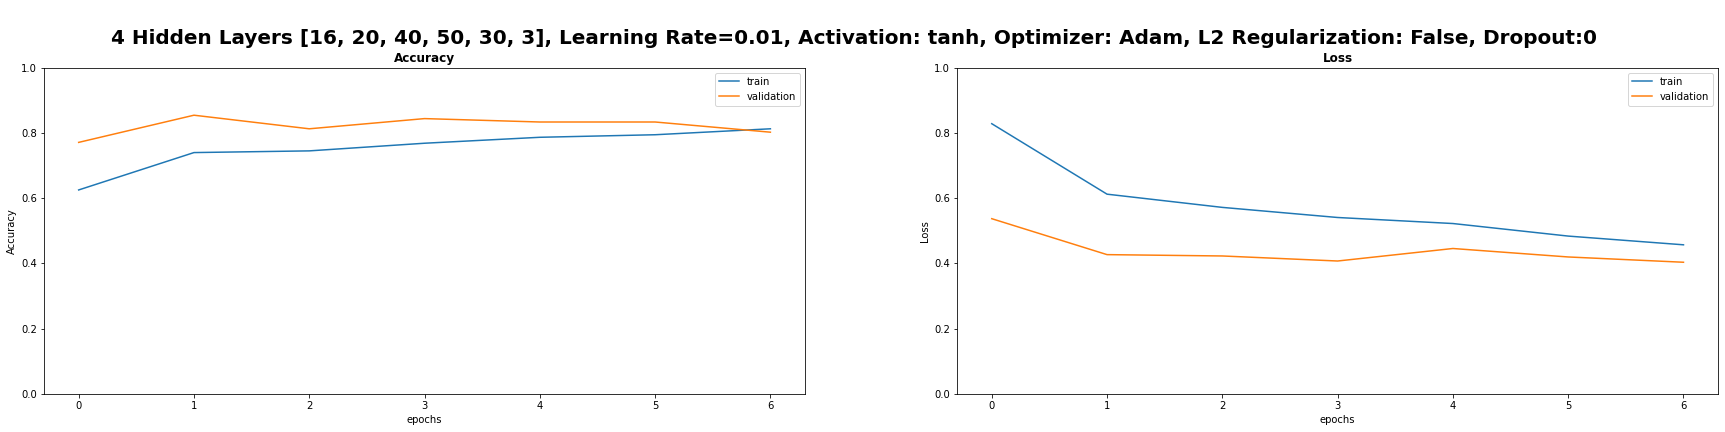


 [[22  0  2]
 [ 0 24  4]
 [11  2 31]]

               precision    recall  f1-score   support

           0      0.667     0.917     0.772        24
           1      0.923     0.857     0.889        28
           2      0.838     0.705     0.765        44

    accuracy                          0.802        96
   macro avg      0.809     0.826     0.809        96
weighted avg      0.820     0.802     0.803        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.01, Activation: relu, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

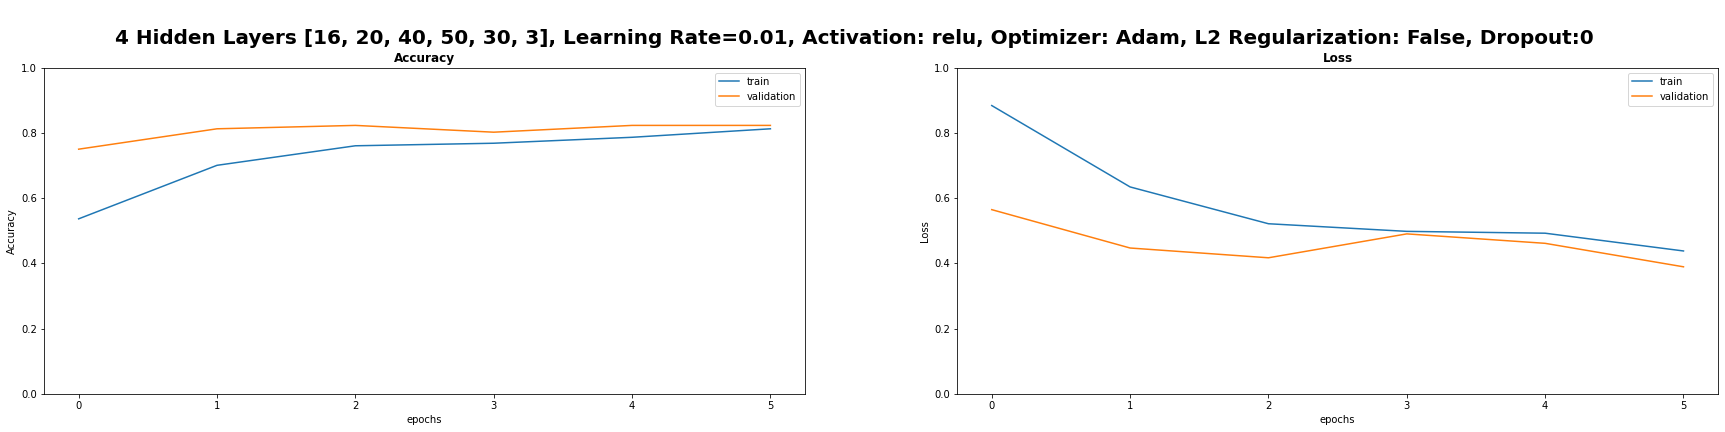


 [[19  0  5]
 [ 0 26  2]
 [ 7  3 34]]

               precision    recall  f1-score   support

           0      0.731     0.792     0.760        24
           1      0.897     0.929     0.912        28
           2      0.829     0.773     0.800        44

    accuracy                          0.823        96
   macro avg      0.819     0.831     0.824        96
weighted avg      0.824     0.823     0.823        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.01, Activation: sigmoid, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

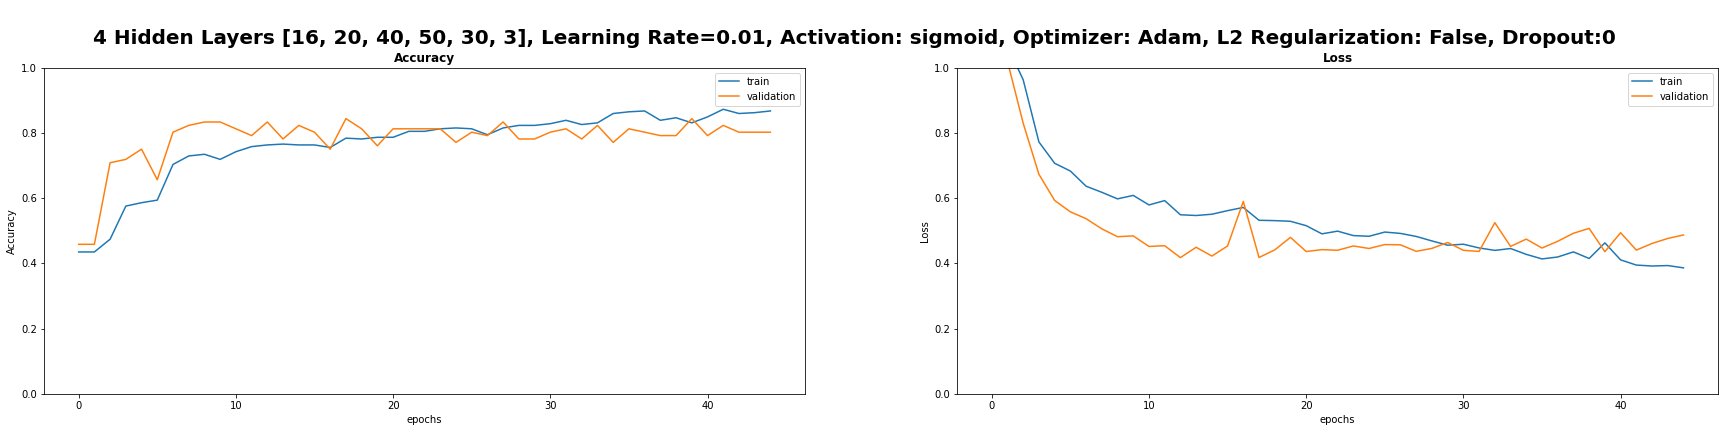


 [[18  0  6]
 [ 0 21  7]
 [ 4  2 38]]

               precision    recall  f1-score   support

           0      0.818     0.750     0.783        24
           1      0.913     0.750     0.824        28
           2      0.745     0.864     0.800        44

    accuracy                          0.802        96
   macro avg      0.825     0.788     0.802        96
weighted avg      0.812     0.802     0.803        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.01, Activation: tanh, Optimizer: RMSprop, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

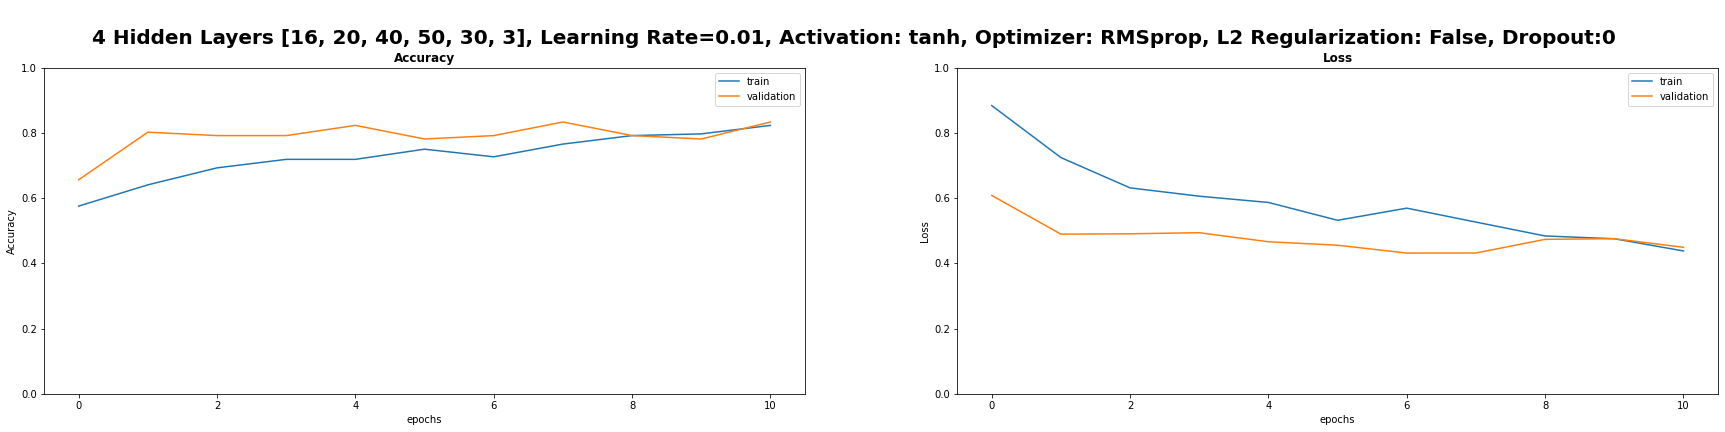


 [[18  0  6]
 [ 0 23  5]
 [ 3  2 39]]

               precision    recall  f1-score   support

           0      0.857     0.750     0.800        24
           1      0.920     0.821     0.868        28
           2      0.780     0.886     0.830        44

    accuracy                          0.833        96
   macro avg      0.852     0.819     0.833        96
weighted avg      0.840     0.833     0.833        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.01, Activation: relu, Optimizer: RMSprop, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

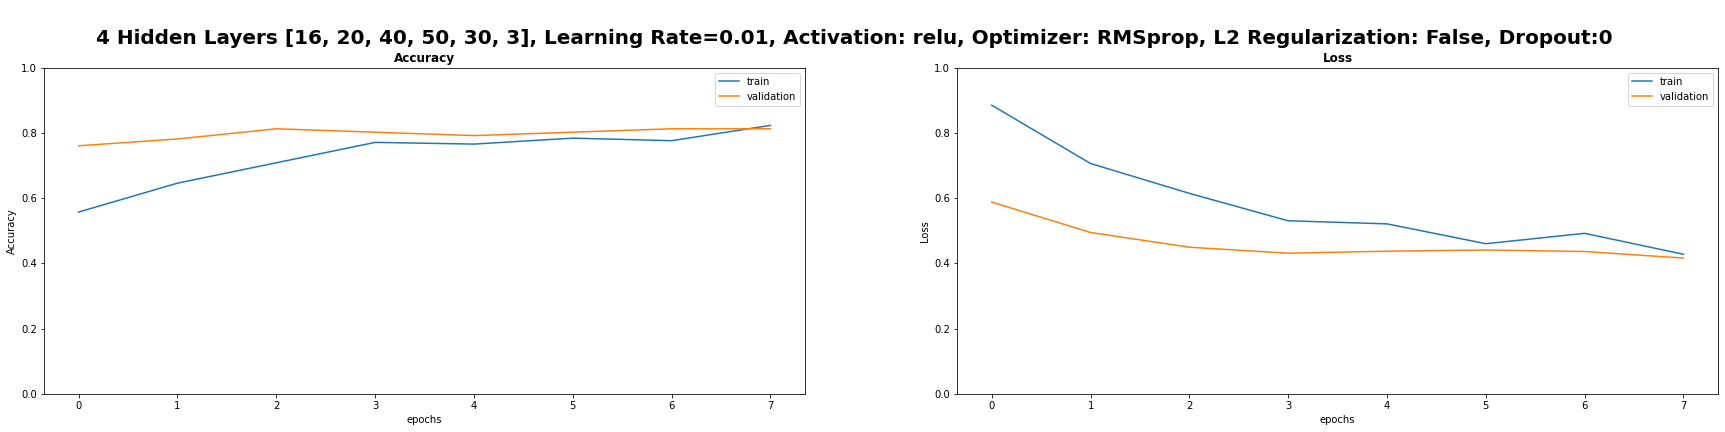


 [[20  0  4]
 [ 0 23  5]
 [ 6  3 35]]

               precision    recall  f1-score   support

           0      0.769     0.833     0.800        24
           1      0.885     0.821     0.852        28
           2      0.795     0.795     0.795        44

    accuracy                          0.812        96
   macro avg      0.816     0.817     0.816        96
weighted avg      0.815     0.812     0.813        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.01, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

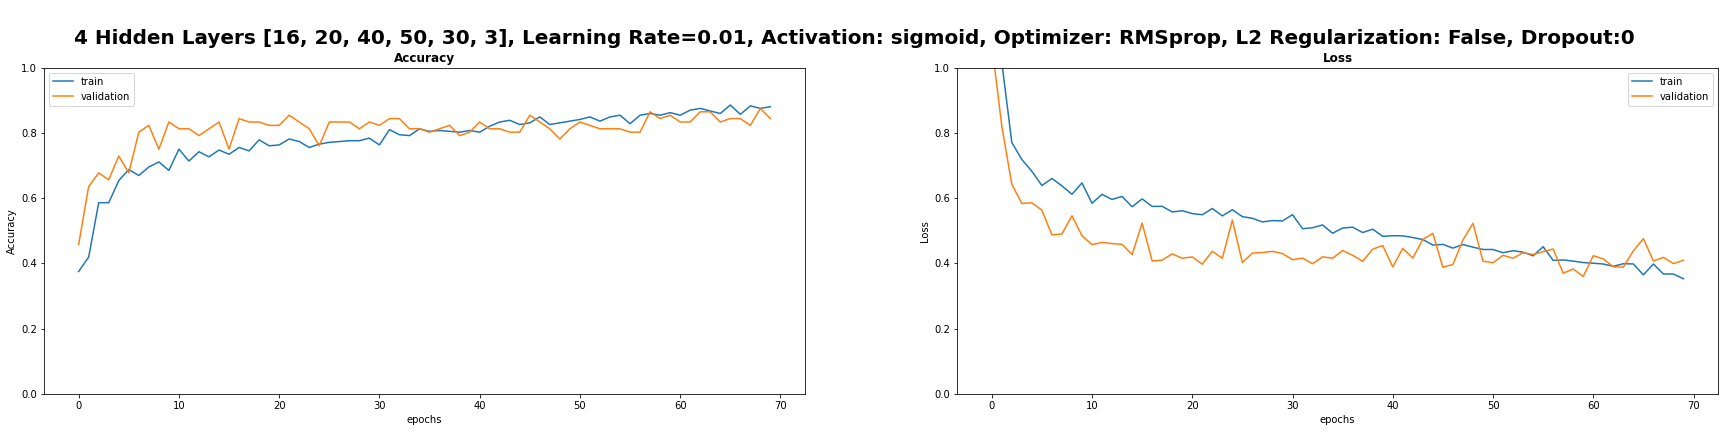


 [[19  0  5]
 [ 0 23  5]
 [ 3  2 39]]

               precision    recall  f1-score   support

           0      0.864     0.792     0.826        24
           1      0.920     0.821     0.868        28
           2      0.796     0.886     0.839        44

    accuracy                          0.844        96
   macro avg      0.860     0.833     0.844        96
weighted avg      0.849     0.844     0.844        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.01, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

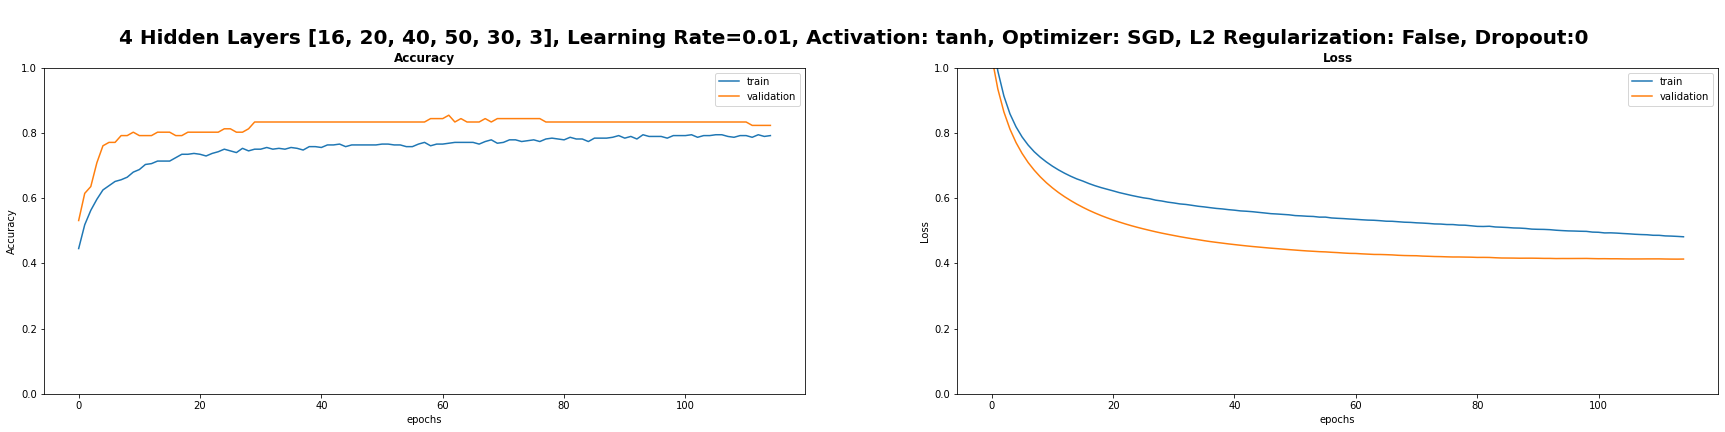


 [[20  0  4]
 [ 0 25  3]
 [ 6  4 34]]

               precision    recall  f1-score   support

           0      0.769     0.833     0.800        24
           1      0.862     0.893     0.877        28
           2      0.829     0.773     0.800        44

    accuracy                          0.823        96
   macro avg      0.820     0.833     0.826        96
weighted avg      0.824     0.823     0.823        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.01, Activation: relu, Optimizer: SGD, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

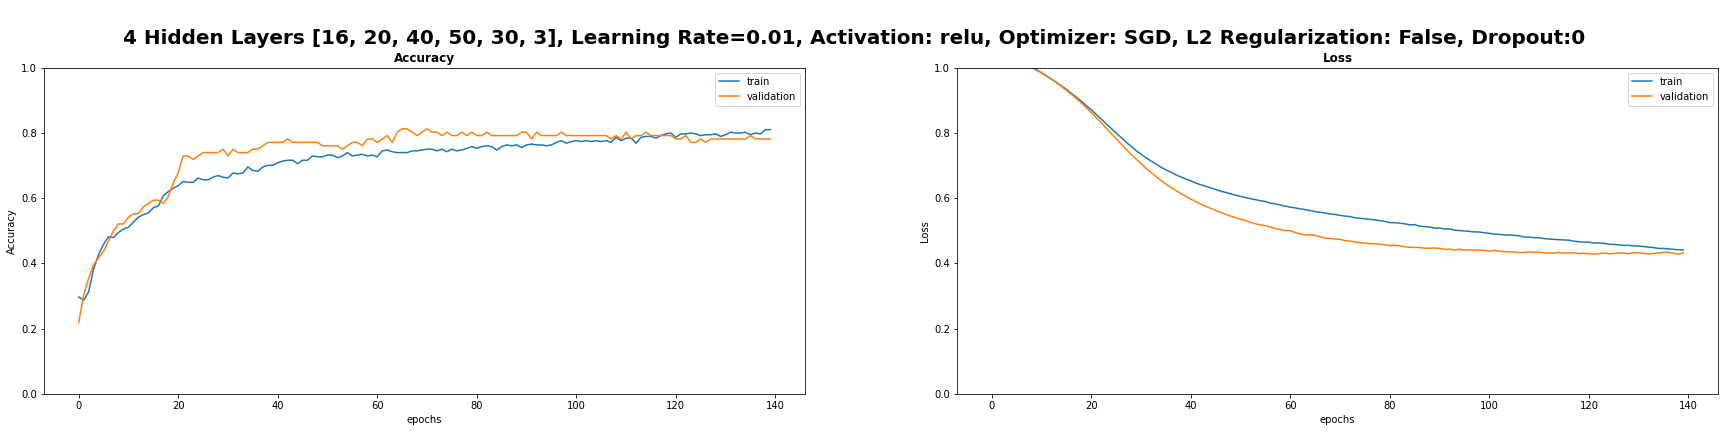


 [[18  0  6]
 [ 0 24  4]
 [ 7  4 33]]

               precision    recall  f1-score   support

           0      0.720     0.750     0.735        24
           1      0.857     0.857     0.857        28
           2      0.767     0.750     0.759        44

    accuracy                          0.781        96
   macro avg      0.782     0.786     0.783        96
weighted avg      0.782     0.781     0.781        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.01, Activation: sigmoid, Optimizer: SGD, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

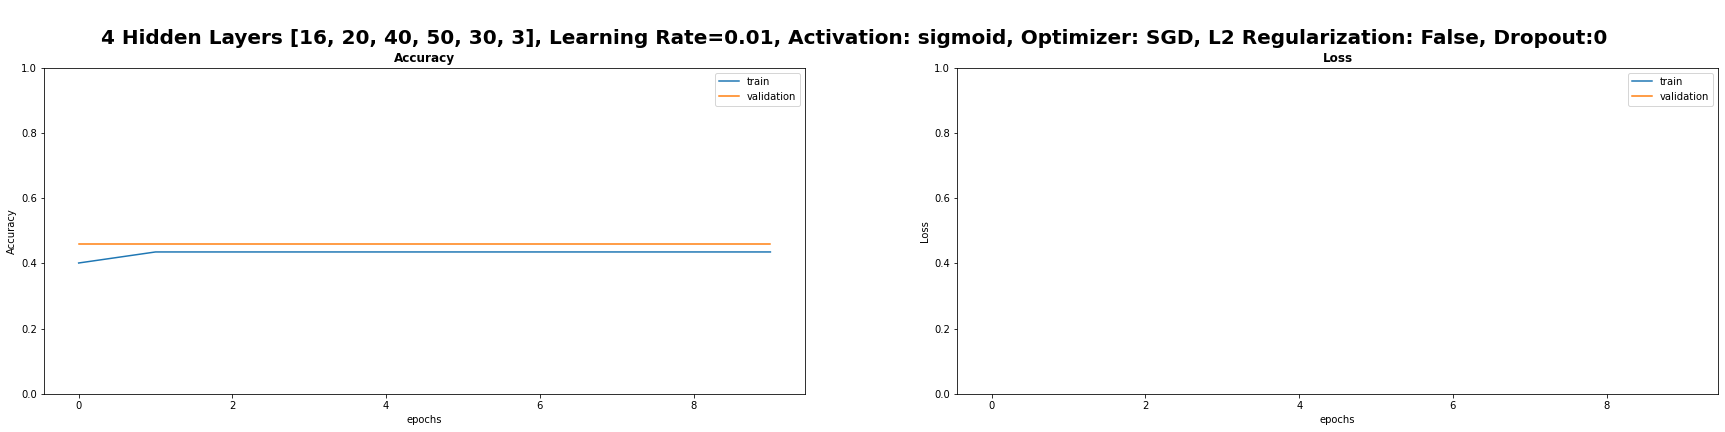


 [[ 0  0 24]
 [ 0  0 28]
 [ 0  0 44]]

               precision    recall  f1-score   support

           0      0.000     0.000     0.000        24
           1      0.000     0.000     0.000        28
           2      0.458     1.000     0.629        44

    accuracy                          0.458        96
   macro avg      0.153     0.333     0.210        96
weighted avg      0.210     0.458     0.288        96
 







Four hidden layer models:
 
alpha = 0.01 

╒════════════════════╤══════════════════════════════════╤════════════════════════════════╤═══════════════════════════════════╤═════════════════════════════════╕
│ Model Parameters   │ Accuracy and Loss of train set   │ Accuracy and Loss of val set   │ Accuracy and Loss of train set    │ Accuracy and Loss of val set    │
│                    │ according to Min train Loss      │ according to Min val Loss      │ according to Max train Accuracy   │ according to Max val Accuracy   │
╞════════════════════╪══════════════════════

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# print plots
print_plot = True

# Adam optimizer diffrenc activation functions
Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_four_tanh_adam = n_hidden_layer_model(optimizer=Adam, architecture=[16, 20, 40, 50, 30, 3], activation="tanh", learning_rate=learning_rate, epochs=7, Print=print_plot)

Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_four_relu_adam = n_hidden_layer_model(optimizer=Adam, architecture=[16, 20, 40, 50, 30, 3], activation="relu", learning_rate=learning_rate, epochs=6, Print=print_plot)

Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_four_sigmoid_adam = n_hidden_layer_model(optimizer=Adam, architecture=[16, 20, 40, 50, 30, 3], activation="sigmoid", learning_rate=learning_rate, epochs=45, Print=print_plot)

#
# RMSprop optimizer diffrenc activation functions
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07)
His_four_tanh_RMS = n_hidden_layer_model(optimizer=RMSprop, architecture=[16, 20, 40, 50, 30, 3], activation="tanh", learning_rate=learning_rate, epochs=11, Print=print_plot)

RMSprop = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07)
His_four_relu_RMS = n_hidden_layer_model(optimizer=RMSprop, architecture=[16, 20, 40, 50, 30, 3], activation="relu", learning_rate=learning_rate, epochs=8, Print=print_plot)

RMSprop = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07)
His_four_sigmoid_RMS = n_hidden_layer_model(optimizer=RMSprop, architecture=[16, 20, 40, 50, 30, 3], activation="sigmoid", learning_rate=learning_rate, epochs=70, Print=print_plot)

#
# SGD optimizer diffrenc activation functions
SGD = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0)
His_four_tanh_SGD = n_hidden_layer_model(optimizer=SGD, architecture=[16, 20, 40, 50, 30, 3], activation="tanh", learning_rate=learning_rate, epochs=115, Print=print_plot)

SGD = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0)
His_four_relu_SGD = n_hidden_layer_model(optimizer=SGD, architecture=[16, 20, 40, 50, 30, 3], activation="relu", learning_rate=learning_rate, epochs=140, Print=print_plot)

SGD = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0)
His_four_sigmoid_SGD = n_hidden_layer_model(optimizer=SGD, architecture=[16, 20, 40, 50, 30, 3], activation="sigmoid", learning_rate=learning_rate, epochs=10, Print=print_plot)

#
print(colored("\n\nFour hidden layer models:\n", 'yellow', attrs=['bold']), "\nalpha =", learning_rate, "\n")
print(print_table(
    [find_max_i(His_four_tanh_adam), find_max_i(His_four_relu_adam), find_max_i(His_four_sigmoid_adam),
     find_max_i(His_four_tanh_RMS), find_max_i(His_four_relu_RMS), find_max_i(His_four_sigmoid_RMS),
     find_max_i(His_four_tanh_SGD), find_max_i(His_four_relu_SGD), find_max_i(His_four_sigmoid_SGD)
     ],
    head=["Model Parameters",
          "Accuracy and Loss of train set\naccording to Min train Loss",
          "Accuracy and Loss of val set\naccording to Min val Loss",
          "Accuracy and Loss of train set\naccording to Max train Accuracy",
          "Accuracy and Loss of val set\naccording to Max val Accuracy"], rows=["Adam-tanh", "Adam-relu", "Adam-sigmoid",
                                                                                "RMSprop-tanh", "RMSprop-relu", "RMSprop-sigmoid",
                                                                                "SGD-tanh", "SGD-relu", "SGD-sigmoid"
                                                                                ]))


### Different activation functions and optimizers for five hidden layer model


5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.01, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

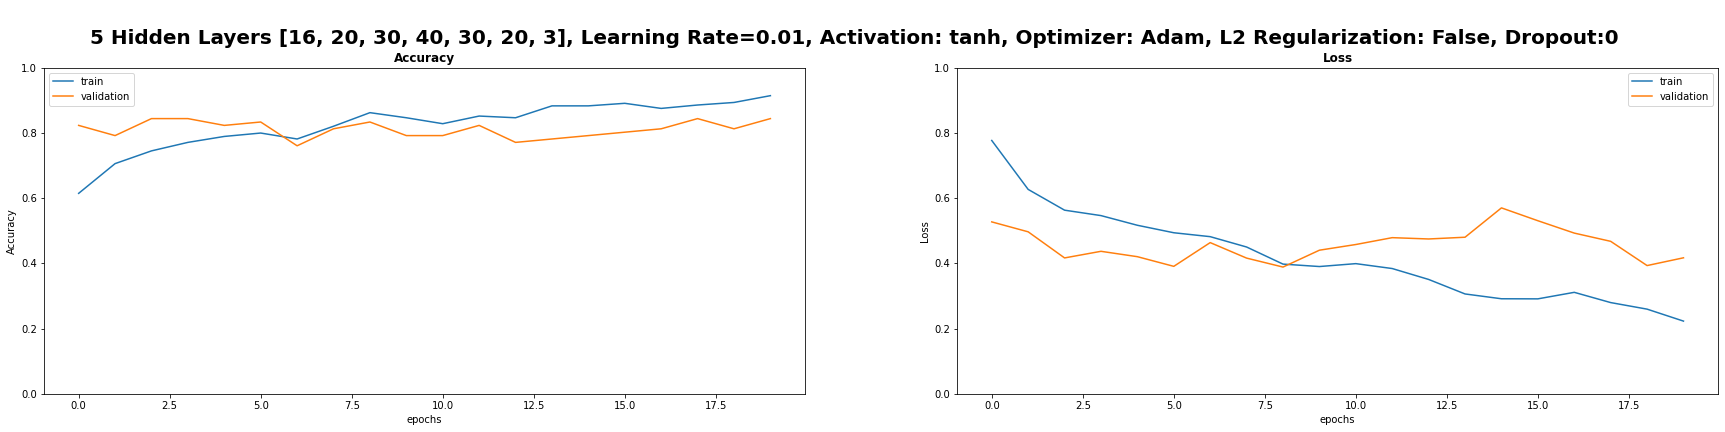


 [[18  0  6]
 [ 0 22  6]
 [ 2  1 41]]

               precision    recall  f1-score   support

           0      0.900     0.750     0.818        24
           1      0.957     0.786     0.863        28
           2      0.774     0.932     0.845        44

    accuracy                          0.844        96
   macro avg      0.877     0.823     0.842        96
weighted avg      0.859     0.844     0.844        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.01, Activation: relu, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

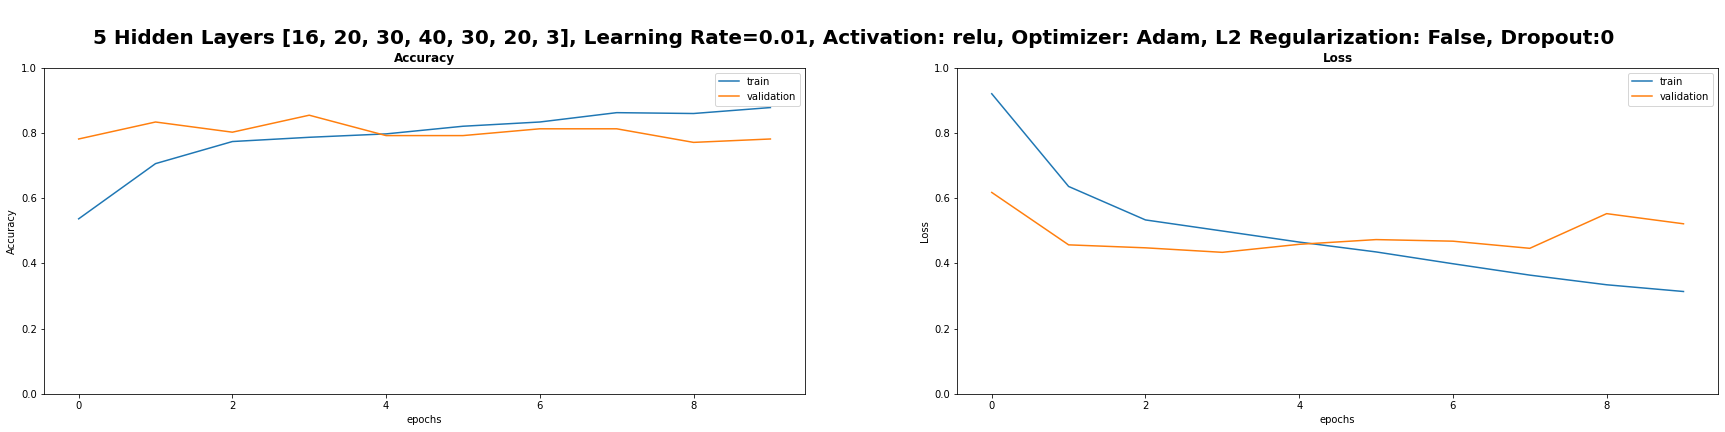


 [[20  0  4]
 [ 0 21  7]
 [ 6  4 34]]

               precision    recall  f1-score   support

           0      0.769     0.833     0.800        24
           1      0.840     0.750     0.792        28
           2      0.756     0.773     0.764        44

    accuracy                          0.781        96
   macro avg      0.788     0.785     0.785        96
weighted avg      0.784     0.781     0.781        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.01, Activation: sigmoid, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

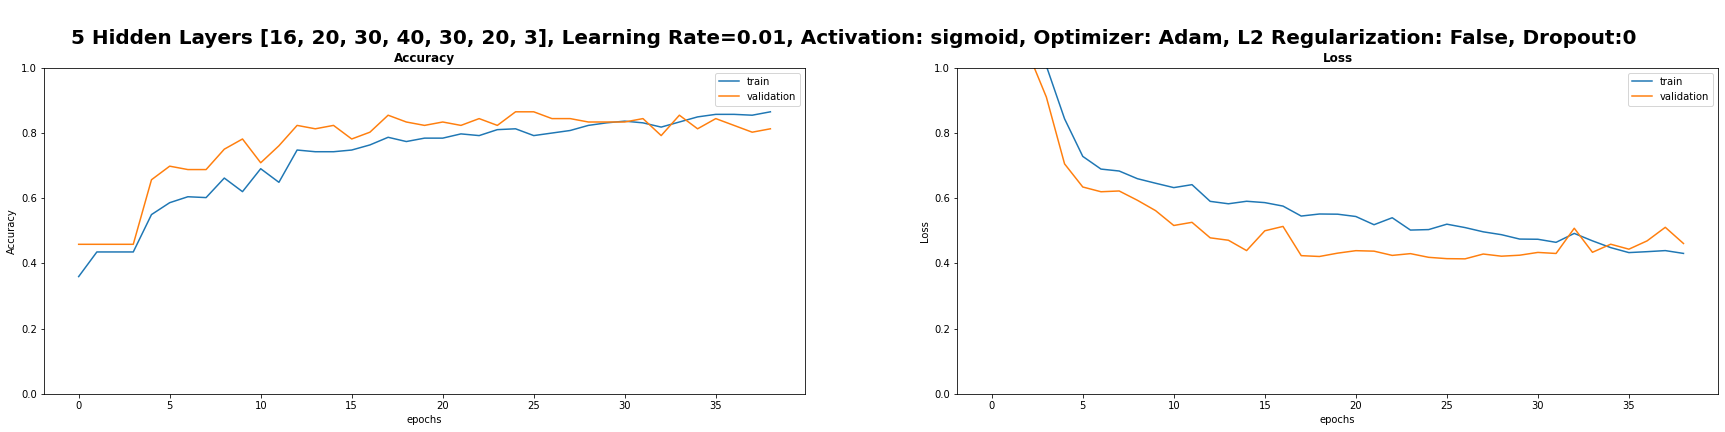


 [[20  0  4]
 [ 0 26  2]
 [ 8  4 32]]

               precision    recall  f1-score   support

           0      0.714     0.833     0.769        24
           1      0.867     0.929     0.897        28
           2      0.842     0.727     0.780        44

    accuracy                          0.812        96
   macro avg      0.808     0.830     0.815        96
weighted avg      0.817     0.812     0.812        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.01, Activation: tanh, Optimizer: RMSprop, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

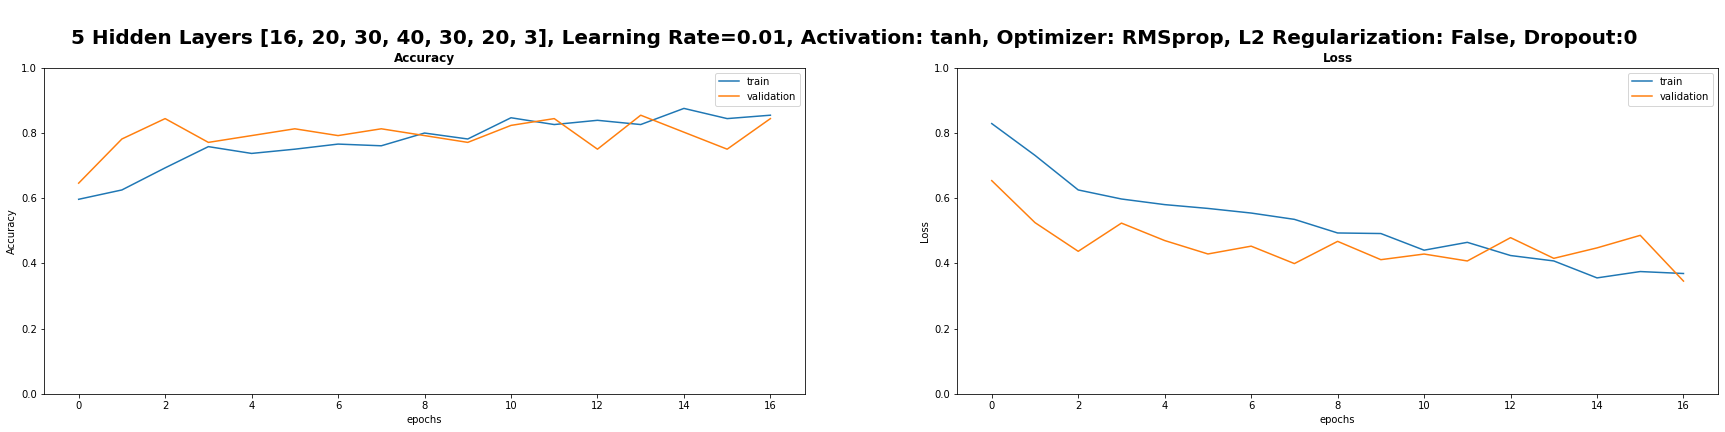


 [[20  0  4]
 [ 0 23  5]
 [ 3  3 38]]

               precision    recall  f1-score   support

           0      0.870     0.833     0.851        24
           1      0.885     0.821     0.852        28
           2      0.809     0.864     0.835        44

    accuracy                          0.844        96
   macro avg      0.854     0.839     0.846        96
weighted avg      0.846     0.844     0.844        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.01, Activation: relu, Optimizer: RMSprop, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

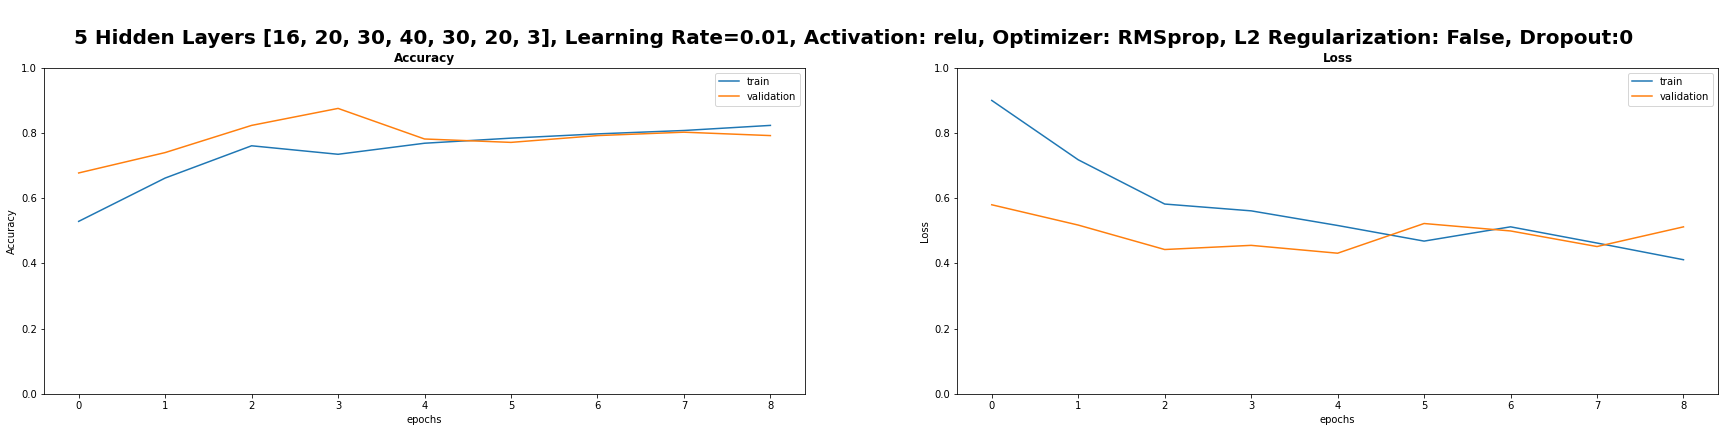


 [[22  0  2]
 [ 0 25  3]
 [14  1 29]]

               precision    recall  f1-score   support

           0      0.611     0.917     0.733        24
           1      0.962     0.893     0.926        28
           2      0.853     0.659     0.744        44

    accuracy                          0.792        96
   macro avg      0.809     0.823     0.801        96
weighted avg      0.824     0.792     0.794        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.01, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

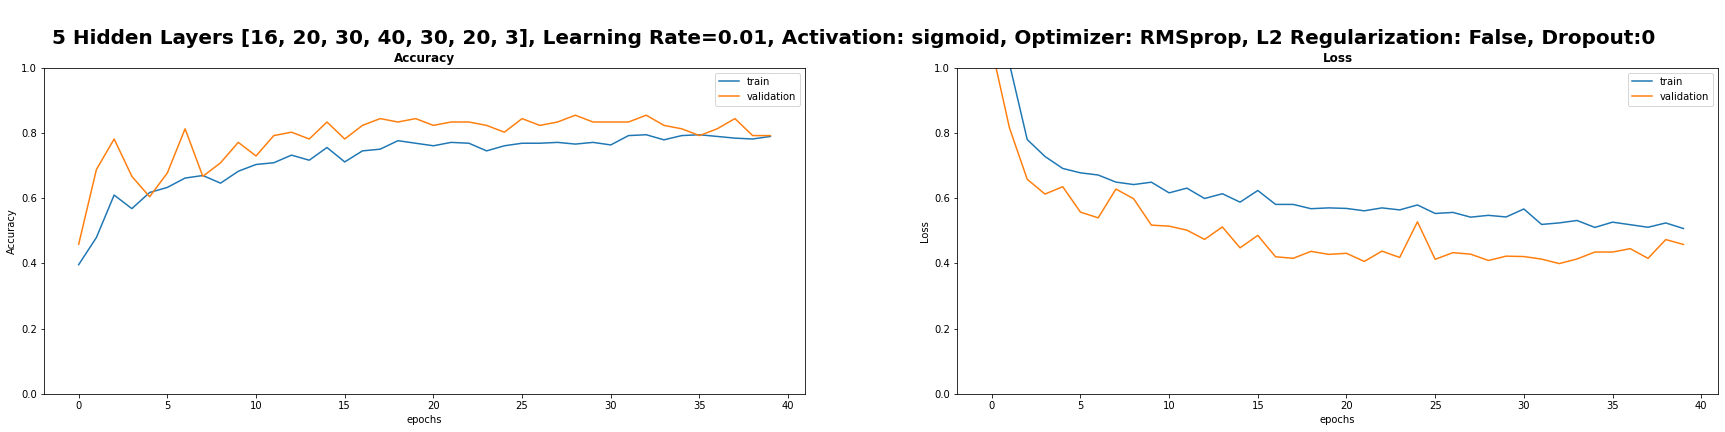


 [[17  0  7]
 [ 0 23  5]
 [ 5  3 36]]

               precision    recall  f1-score   support

           0      0.773     0.708     0.739        24
           1      0.885     0.821     0.852        28
           2      0.750     0.818     0.783        44

    accuracy                          0.792        96
   macro avg      0.802     0.783     0.791        96
weighted avg      0.795     0.792     0.792        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.01, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

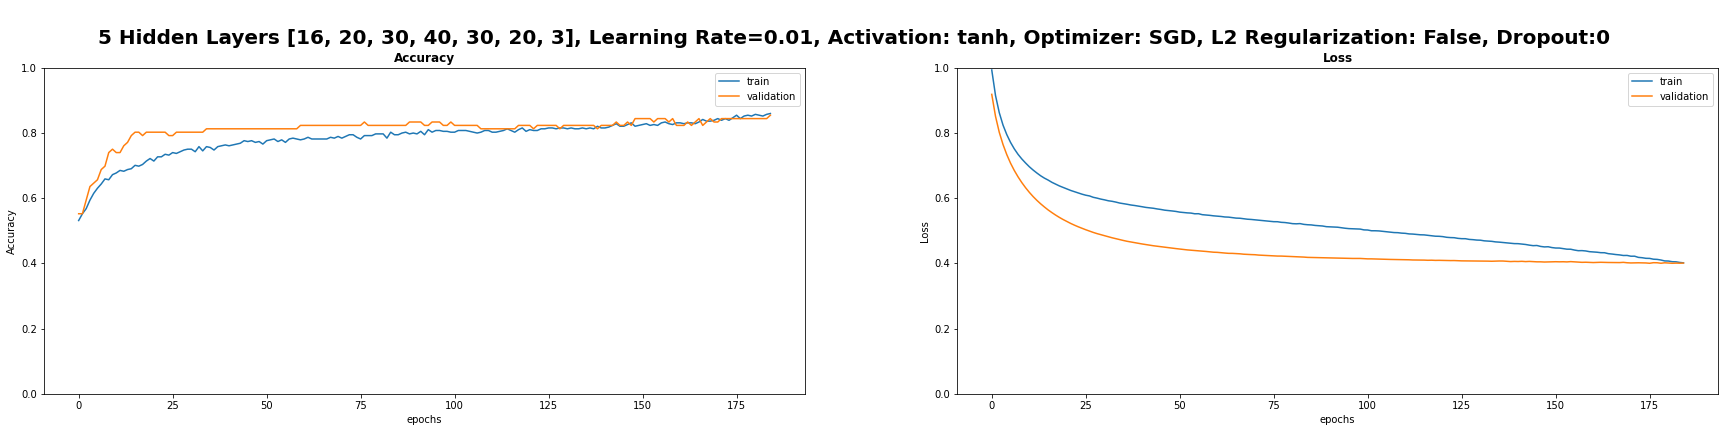


 [[21  0  3]
 [ 0 25  3]
 [ 3  5 36]]

               precision    recall  f1-score   support

           0      0.875     0.875     0.875        24
           1      0.833     0.893     0.862        28
           2      0.857     0.818     0.837        44

    accuracy                          0.854        96
   macro avg      0.855     0.862     0.858        96
weighted avg      0.855     0.854     0.854        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.01, Activation: relu, Optimizer: SGD, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

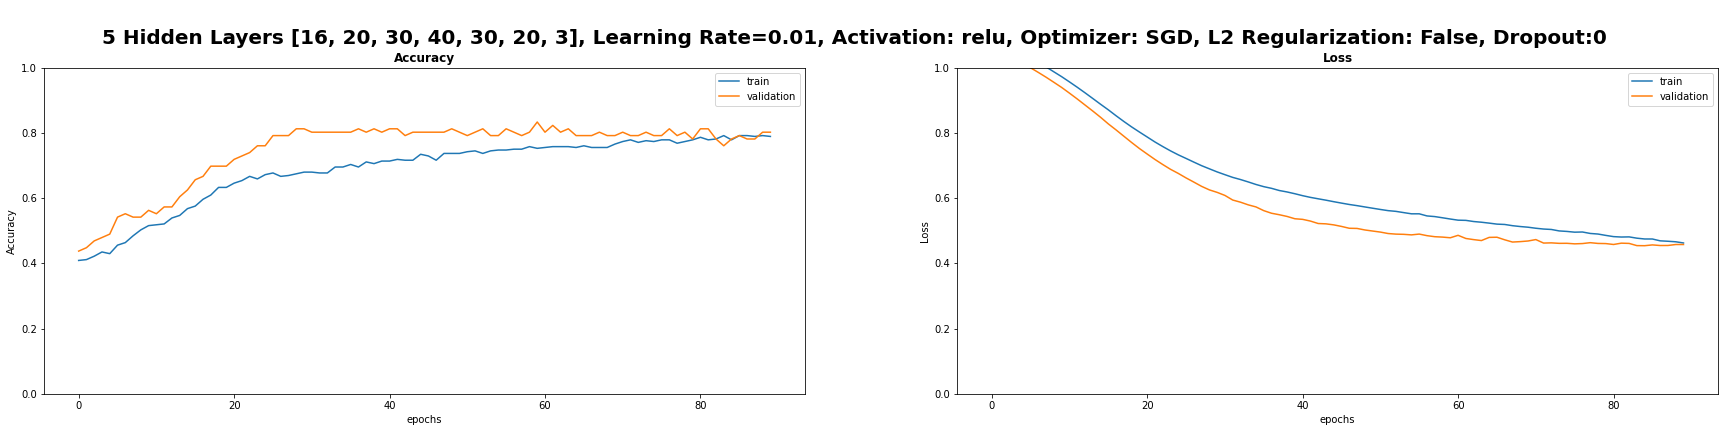


 [[20  0  4]
 [ 0 24  4]
 [ 8  3 33]]

               precision    recall  f1-score   support

           0      0.714     0.833     0.769        24
           1      0.889     0.857     0.873        28
           2      0.805     0.750     0.776        44

    accuracy                          0.802        96
   macro avg      0.803     0.813     0.806        96
weighted avg      0.807     0.802     0.803        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.01, Activation: sigmoid, Optimizer: SGD, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

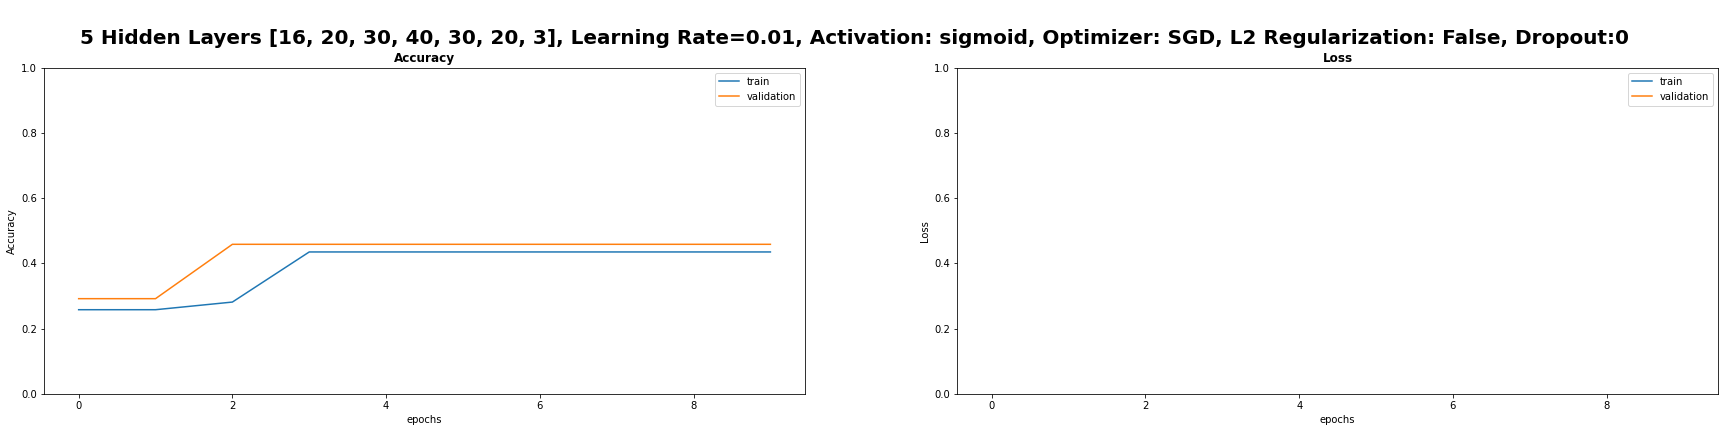


 [[ 0  0 24]
 [ 0  0 28]
 [ 0  0 44]]

               precision    recall  f1-score   support

           0      0.000     0.000     0.000        24
           1      0.000     0.000     0.000        28
           2      0.458     1.000     0.629        44

    accuracy                          0.458        96
   macro avg      0.153     0.333     0.210        96
weighted avg      0.210     0.458     0.288        96
 







Five hidden layer models:
 
alpha = 0.01 

╒════════════════════╤══════════════════════════════════╤════════════════════════════════╤═══════════════════════════════════╤═════════════════════════════════╕
│ Model Parameters   │ Accuracy and Loss of train set   │ Accuracy and Loss of val set   │ Accuracy and Loss of train set    │ Accuracy and Loss of val set    │
│                    │ according to Min train Loss      │ according to Min val Loss      │ according to Max train Accuracy   │ according to Max val Accuracy   │
╞════════════════════╪══════════════════════

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# print plots
print_plot = True

# Adam optimizer diffrenc activation functions
Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_five_tanh_adam = n_hidden_layer_model(optimizer=Adam, architecture=[16, 20, 30, 40, 30, 20, 3], activation="tanh", learning_rate=learning_rate, epochs=20, Print=print_plot)

Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_five_relu_adam = n_hidden_layer_model(optimizer=Adam, architecture=[16, 20, 30, 40, 30, 20, 3], activation="relu", learning_rate=learning_rate, epochs=10, Print=print_plot)

Adam = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_five_sigmoid_adam = n_hidden_layer_model(optimizer=Adam, architecture=[16, 20, 30, 40, 30, 20, 3], activation="sigmoid", learning_rate=learning_rate, epochs=39, Print=print_plot)

#
# RMSprop optimizer diffrenc activation functions
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07)
His_five_tanh_RMS = n_hidden_layer_model(optimizer=RMSprop, architecture=[16, 20, 30, 40, 30, 20, 3], activation="tanh", learning_rate=learning_rate, epochs=17, Print=print_plot)

RMSprop = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07)
His_five_relu_RMS = n_hidden_layer_model(optimizer=RMSprop, architecture=[16, 20, 30, 40, 30, 20, 3], activation="relu", learning_rate=learning_rate, epochs=9, Print=print_plot)

RMSprop = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07)
His_five_sigmoid_RMS = n_hidden_layer_model(optimizer=RMSprop, architecture=[16, 20, 30, 40, 30, 20, 3], activation="sigmoid", learning_rate=learning_rate, epochs=40, Print=print_plot)

#
# SGD optimizer diffrenc activation functions
SGD = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0)
His_five_tanh_SGD = n_hidden_layer_model(optimizer=SGD, architecture=[16, 20, 30, 40, 30, 20, 3], activation="tanh", learning_rate=learning_rate, epochs=185, Print=print_plot)

SGD = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0)
His_five_relu_SGD = n_hidden_layer_model(optimizer=SGD, architecture=[16, 20, 30, 40, 30, 20, 3], activation="relu", learning_rate=learning_rate, epochs=90, Print=print_plot)

SGD = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0)
His_five_sigmoid_SGD = n_hidden_layer_model(optimizer=SGD, architecture=[16, 20, 30, 40, 30, 20, 3], activation="sigmoid", learning_rate=learning_rate, epochs=10, Print=print_plot)

#
print(colored("\n\nFive hidden layer models:\n", 'yellow', attrs=['bold']), "\nalpha =", learning_rate, "\n")
print(print_table(
    [find_max_i(His_five_tanh_adam), find_max_i(His_five_relu_adam), find_max_i(His_five_sigmoid_adam),
     find_max_i(His_five_tanh_RMS), find_max_i(His_five_relu_RMS), find_max_i(His_five_sigmoid_RMS),
     find_max_i(His_five_tanh_SGD), find_max_i(His_five_relu_SGD), find_max_i(His_five_sigmoid_SGD)
     ],
    head=["Model Parameters",
          "Accuracy and Loss of train set\naccording to Min train Loss",
          "Accuracy and Loss of val set\naccording to Min val Loss",
          "Accuracy and Loss of train set\naccording to Max train Accuracy",
          "Accuracy and Loss of val set\naccording to Max val Accuracy"], rows=["Adam-tanh", "Adam-relu", "Adam-sigmoid",
                                                                                "RMSprop-tanh", "RMSprop-relu", "RMSprop-sigmoid",
                                                                                "SGD-tanh", "SGD-relu", "SGD-sigmoid"
                                                                                ]))


### Different model structures

## Random learning rates, **dropouts** and beta values

In [27]:
np.random.seed(seed)
r = -4 * np.random.rand(4)
lrs = np.round(np.sort(np.power(10, r))[::-1], 4)
lrs = lrs[lrs < 0.2]
lrs = lrs[lrs >0.0001]
print(f"learning rates = {lrs}\n")

dropouts = [0.1, 0.2, 0.3, 0.5]
print(f"drop out rates = {dropouts}")

learning rates = [0.0169 0.0103 0.0018]

drop out rates = [0.1, 0.2, 0.3, 0.5]


### Training models

loop:  0 0 


3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.0169, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0.1


0epoch [00:00, ?epoch/s]

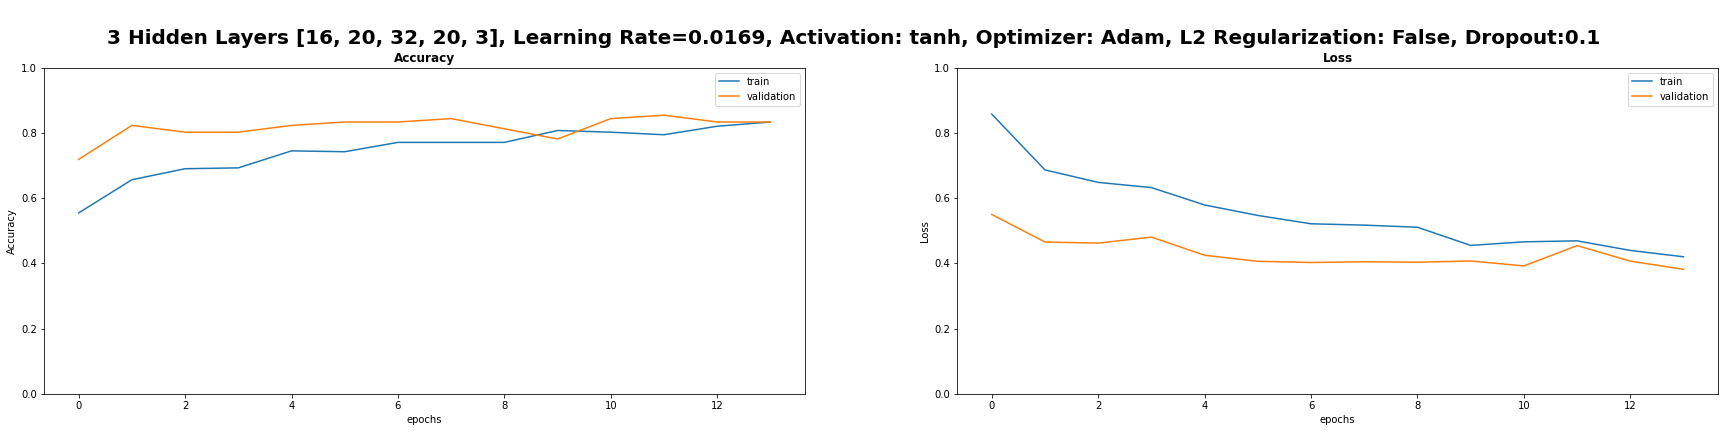


 [[19  0  5]
 [ 0 22  6]
 [ 3  2 39]]

               precision    recall  f1-score   support

           0      0.864     0.792     0.826        24
           1      0.917     0.786     0.846        28
           2      0.780     0.886     0.830        44

    accuracy                          0.833        96
   macro avg      0.853     0.821     0.834        96
weighted avg      0.841     0.833     0.834        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.0169, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0.1


0epoch [00:00, ?epoch/s]

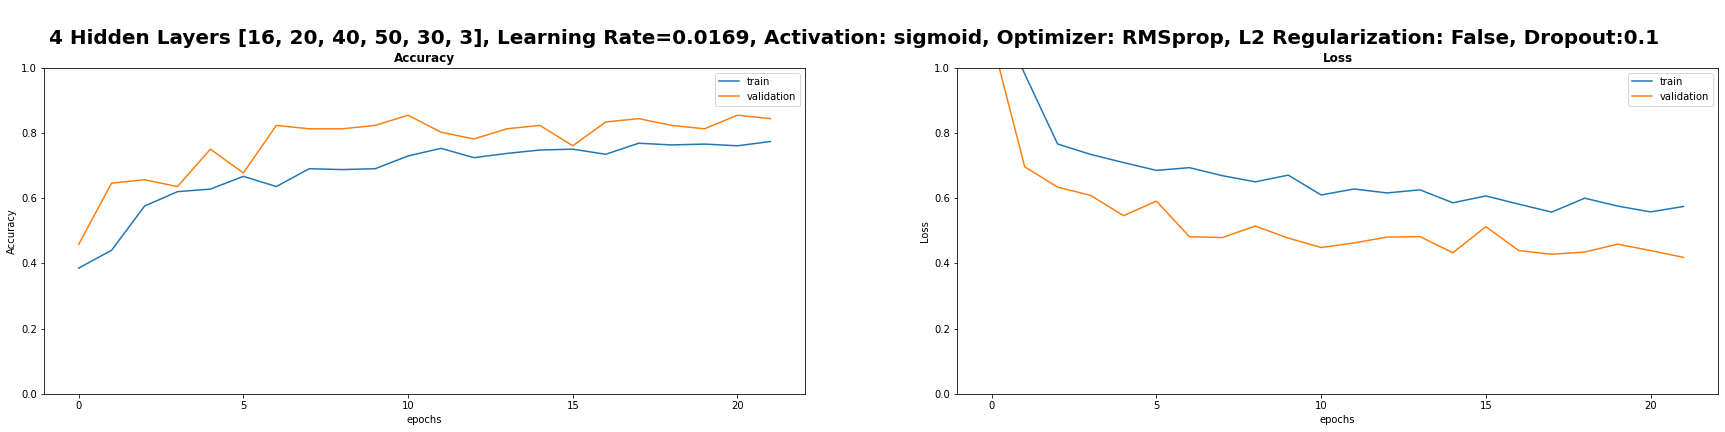


 [[19  0  5]
 [ 0 26  2]
 [ 5  3 36]]

               precision    recall  f1-score   support

           0      0.792     0.792     0.792        24
           1      0.897     0.929     0.912        28
           2      0.837     0.818     0.828        44

    accuracy                          0.844        96
   macro avg      0.842     0.846     0.844        96
weighted avg      0.843     0.844     0.843        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.0169, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0.1


0epoch [00:00, ?epoch/s]

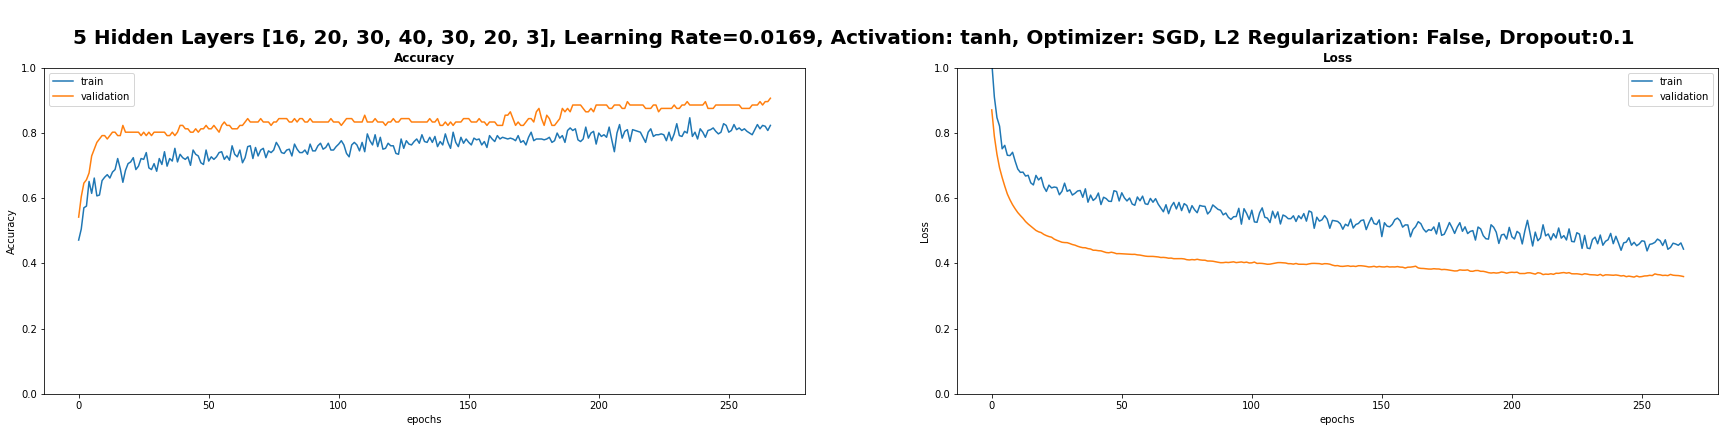


 [[21  0  3]
 [ 0 25  3]
 [ 2  1 41]]

               precision    recall  f1-score   support

           0      0.913     0.875     0.894        24
           1      0.962     0.893     0.926        28
           2      0.872     0.932     0.901        44

    accuracy                          0.906        96
   macro avg      0.916     0.900     0.907        96
weighted avg      0.909     0.906     0.906        96
 





loop:  0 1 


3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.0169, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0.2


0epoch [00:00, ?epoch/s]

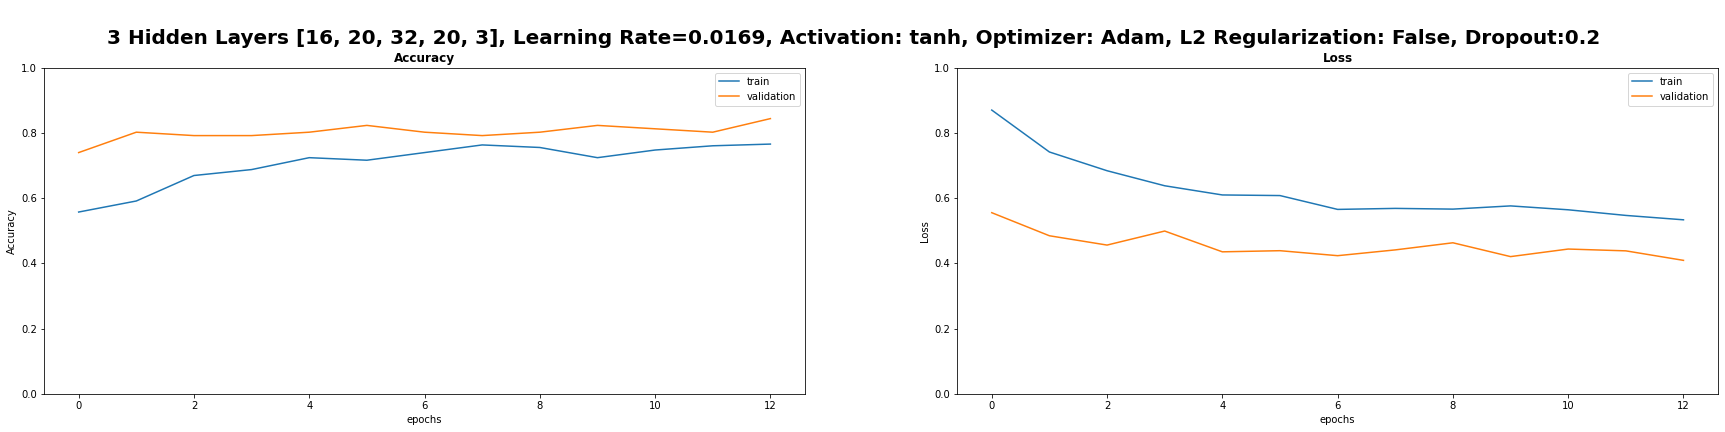


 [[20  0  4]
 [ 0 25  3]
 [ 4  4 36]]

               precision    recall  f1-score   support

           0      0.833     0.833     0.833        24
           1      0.862     0.893     0.877        28
           2      0.837     0.818     0.828        44

    accuracy                          0.844        96
   macro avg      0.844     0.848     0.846        96
weighted avg      0.843     0.844     0.843        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.0169, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0.2


0epoch [00:00, ?epoch/s]

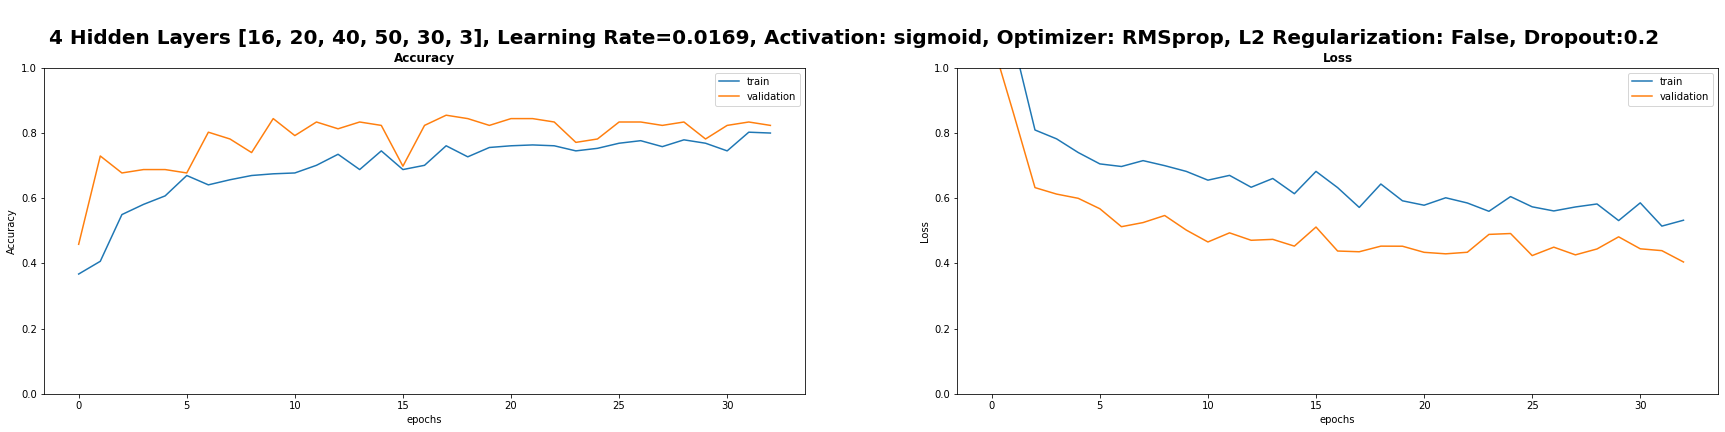


 [[20  0  4]
 [ 0 25  3]
 [ 7  3 34]]

               precision    recall  f1-score   support

           0      0.741     0.833     0.784        24
           1      0.893     0.893     0.893        28
           2      0.829     0.773     0.800        44

    accuracy                          0.823        96
   macro avg      0.821     0.833     0.826        96
weighted avg      0.826     0.823     0.823        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.0169, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0.2


0epoch [00:00, ?epoch/s]

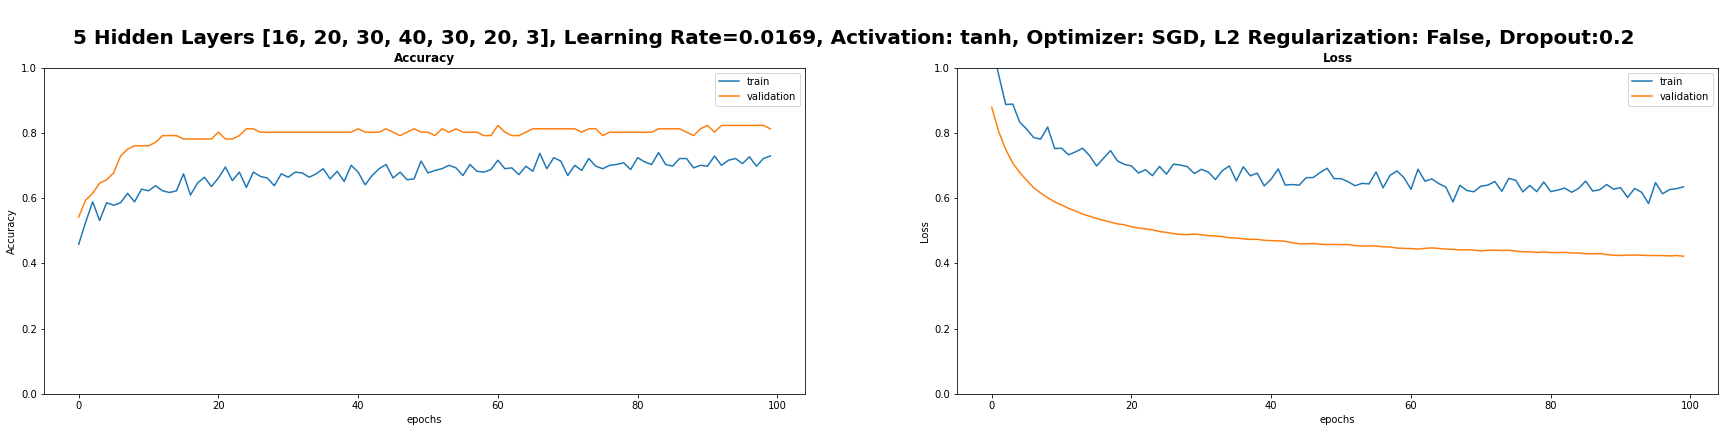


 [[21  0  3]
 [ 0 26  2]
 [ 9  4 31]]

               precision    recall  f1-score   support

           0      0.700     0.875     0.778        24
           1      0.867     0.929     0.897        28
           2      0.861     0.705     0.775        44

    accuracy                          0.812        96
   macro avg      0.809     0.836     0.816        96
weighted avg      0.822     0.812     0.811        96
 





loop:  0 2 


3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.0169, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0.3


0epoch [00:00, ?epoch/s]

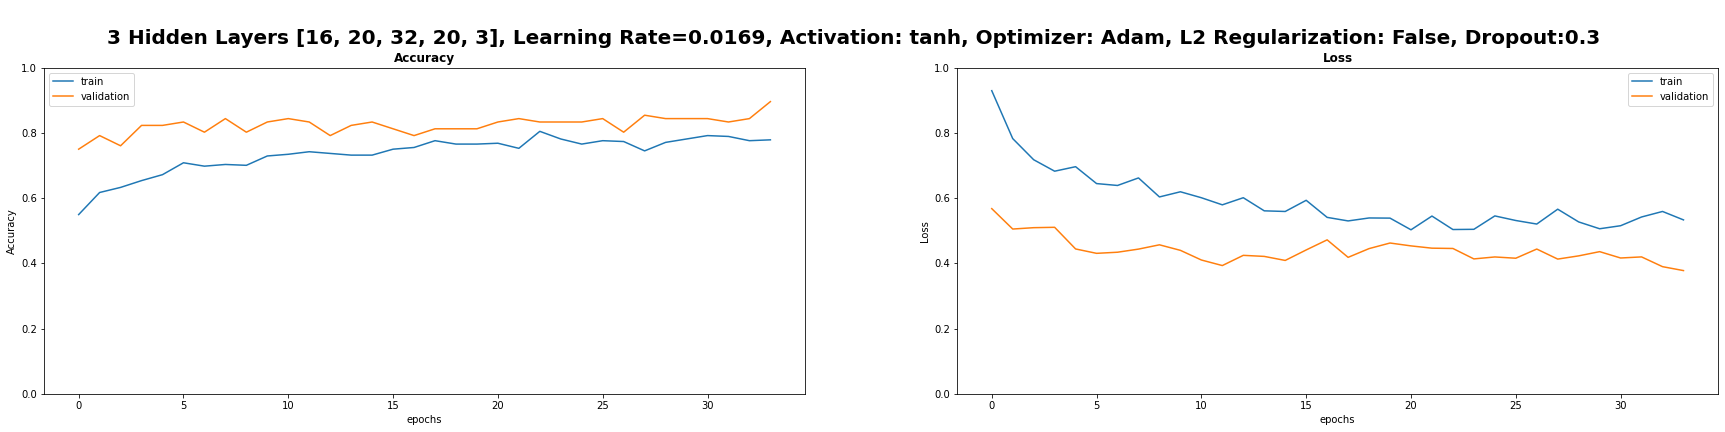


 [[20  0  4]
 [ 0 24  4]
 [ 1  1 42]]

               precision    recall  f1-score   support

           0      0.952     0.833     0.889        24
           1      0.960     0.857     0.906        28
           2      0.840     0.955     0.894        44

    accuracy                          0.896        96
   macro avg      0.917     0.882     0.896        96
weighted avg      0.903     0.896     0.896        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.0169, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0.3


0epoch [00:00, ?epoch/s]

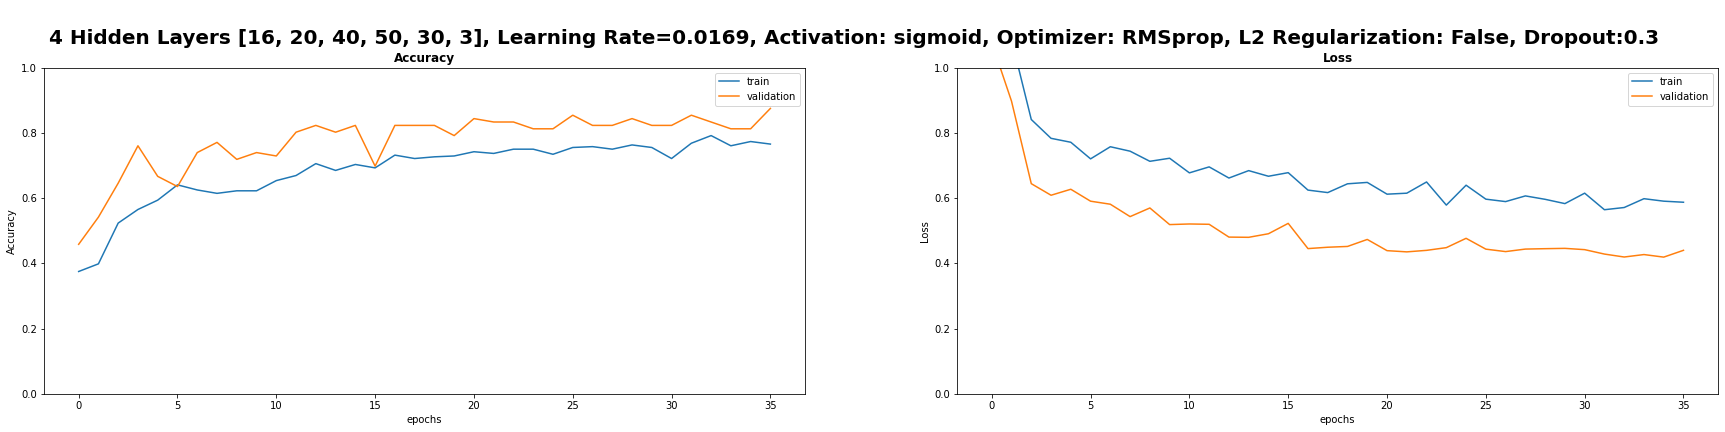


 [[19  0  5]
 [ 0 26  2]
 [ 2  3 39]]

               precision    recall  f1-score   support

           0      0.905     0.792     0.844        24
           1      0.897     0.929     0.912        28
           2      0.848     0.886     0.867        44

    accuracy                          0.875        96
   macro avg      0.883     0.869     0.874        96
weighted avg      0.876     0.875     0.874        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.0169, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0.3


0epoch [00:00, ?epoch/s]

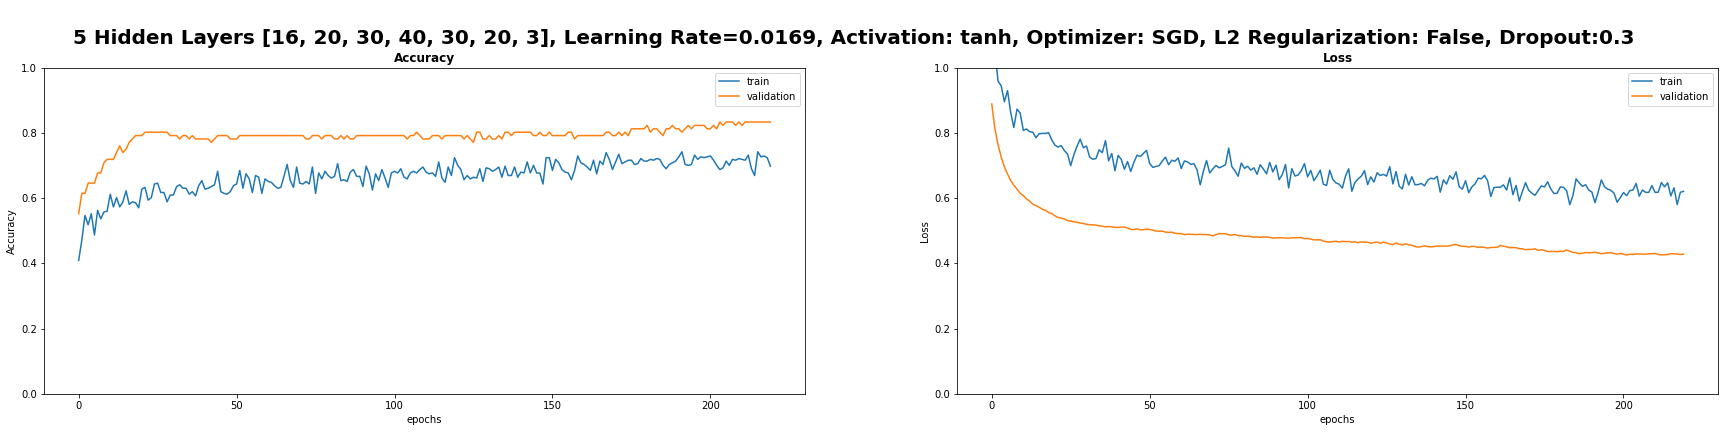


 [[22  0  2]
 [ 0 27  1]
 [10  3 31]]

               precision    recall  f1-score   support

           0      0.688     0.917     0.786        24
           1      0.900     0.964     0.931        28
           2      0.912     0.705     0.795        44

    accuracy                          0.833        96
   macro avg      0.833     0.862     0.837        96
weighted avg      0.852     0.833     0.832        96
 





loop:  0 3 


3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.0169, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0.5


0epoch [00:00, ?epoch/s]

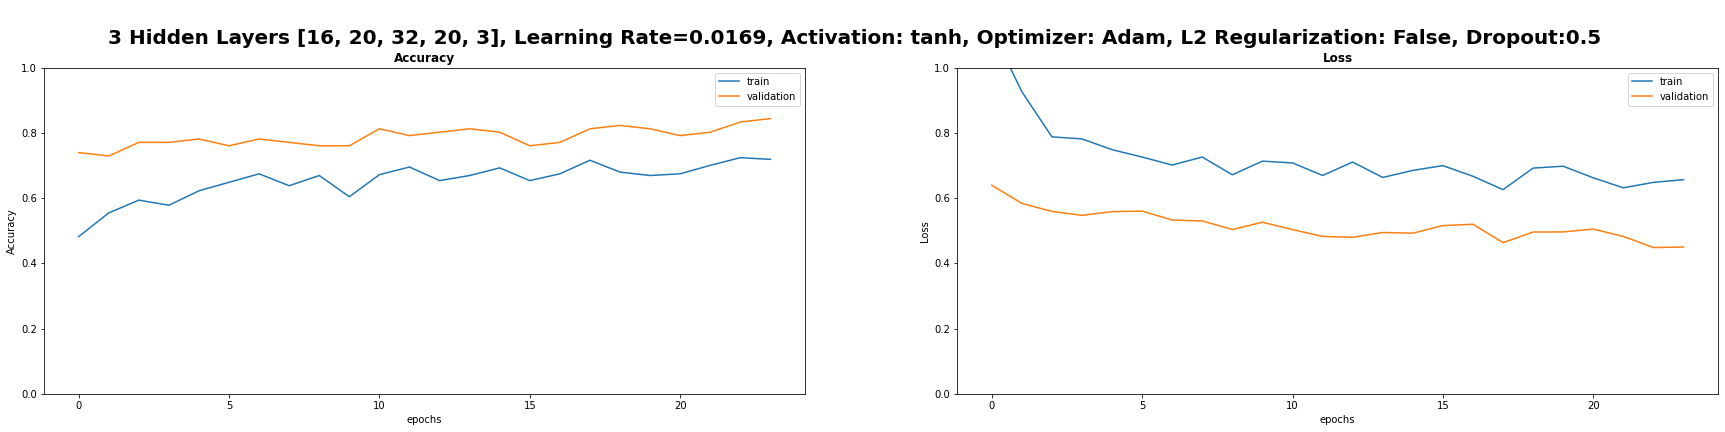


 [[22  0  2]
 [ 0 27  1]
 [ 8  4 32]]

               precision    recall  f1-score   support

           0      0.733     0.917     0.815        24
           1      0.871     0.964     0.915        28
           2      0.914     0.727     0.810        44

    accuracy                          0.844        96
   macro avg      0.840     0.869     0.847        96
weighted avg      0.856     0.844     0.842        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.0169, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0.5


0epoch [00:00, ?epoch/s]

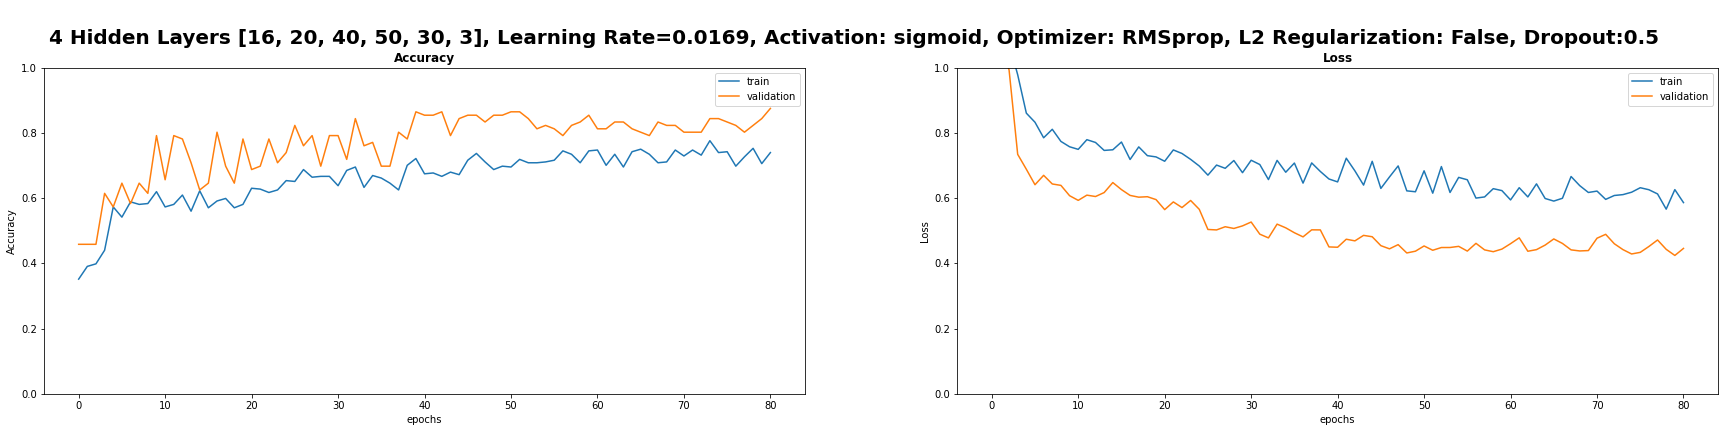


 [[21  0  3]
 [ 0 27  1]
 [ 5  3 36]]

               precision    recall  f1-score   support

           0      0.808     0.875     0.840        24
           1      0.900     0.964     0.931        28
           2      0.900     0.818     0.857        44

    accuracy                          0.875        96
   macro avg      0.869     0.886     0.876        96
weighted avg      0.877     0.875     0.874        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.0169, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0.5


0epoch [00:00, ?epoch/s]

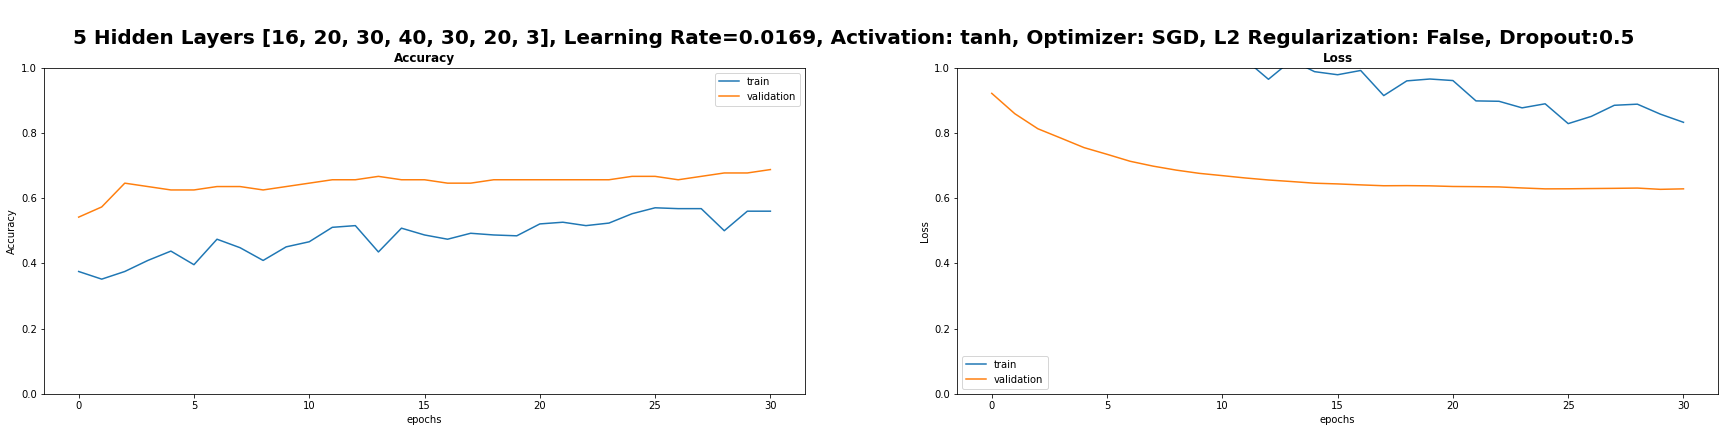


 [[23  0  1]
 [ 0 28  0]
 [16 13 15]]

               precision    recall  f1-score   support

           0      0.590     0.958     0.730        24
           1      0.683     1.000     0.812        28
           2      0.938     0.341     0.500        44

    accuracy                          0.688        96
   macro avg      0.737     0.766     0.681        96
weighted avg      0.776     0.688     0.648        96
 





loop:  1 0 


3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.0103, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0.1


0epoch [00:00, ?epoch/s]

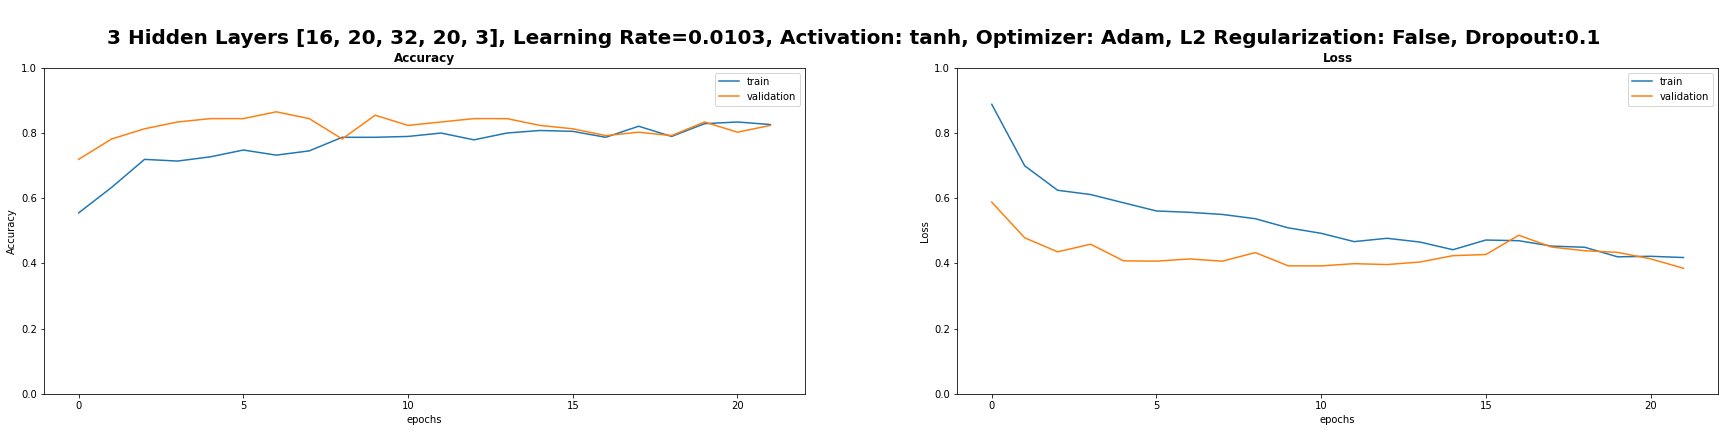


 [[20  0  4]
 [ 0 23  5]
 [ 5  3 36]]

               precision    recall  f1-score   support

           0      0.800     0.833     0.816        24
           1      0.885     0.821     0.852        28
           2      0.800     0.818     0.809        44

    accuracy                          0.823        96
   macro avg      0.828     0.824     0.826        96
weighted avg      0.825     0.823     0.823        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.0103, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0.1


0epoch [00:00, ?epoch/s]

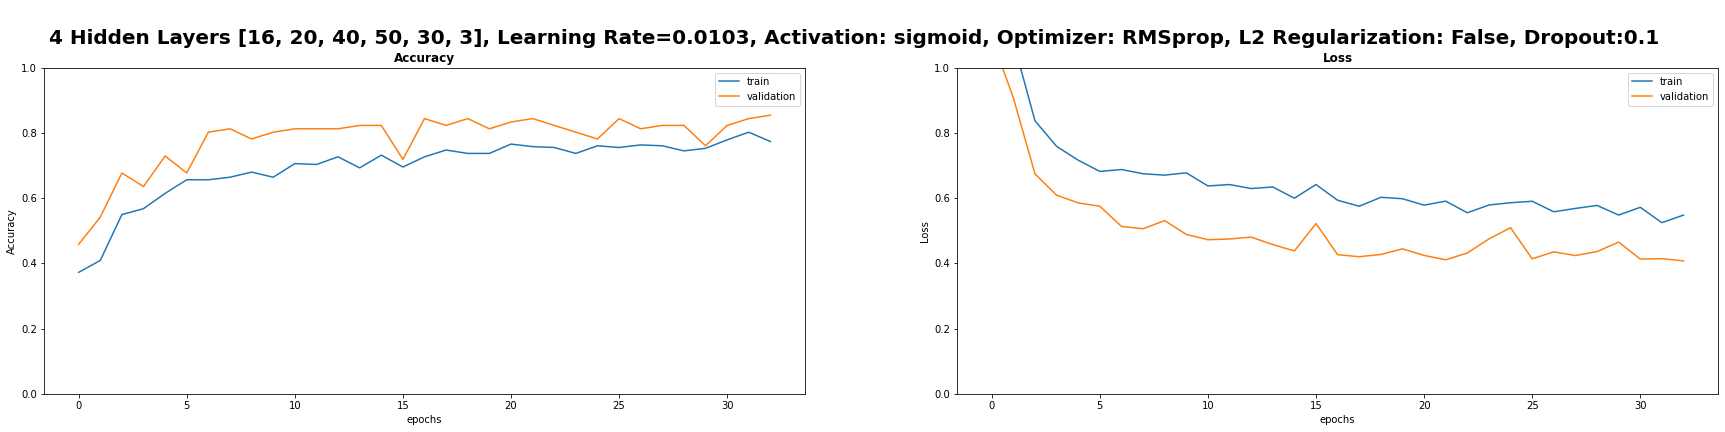


 [[20  0  4]
 [ 0 26  2]
 [ 5  3 36]]

               precision    recall  f1-score   support

           0      0.800     0.833     0.816        24
           1      0.897     0.929     0.912        28
           2      0.857     0.818     0.837        44

    accuracy                          0.854        96
   macro avg      0.851     0.860     0.855        96
weighted avg      0.854     0.854     0.854        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.0103, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0.1


0epoch [00:00, ?epoch/s]

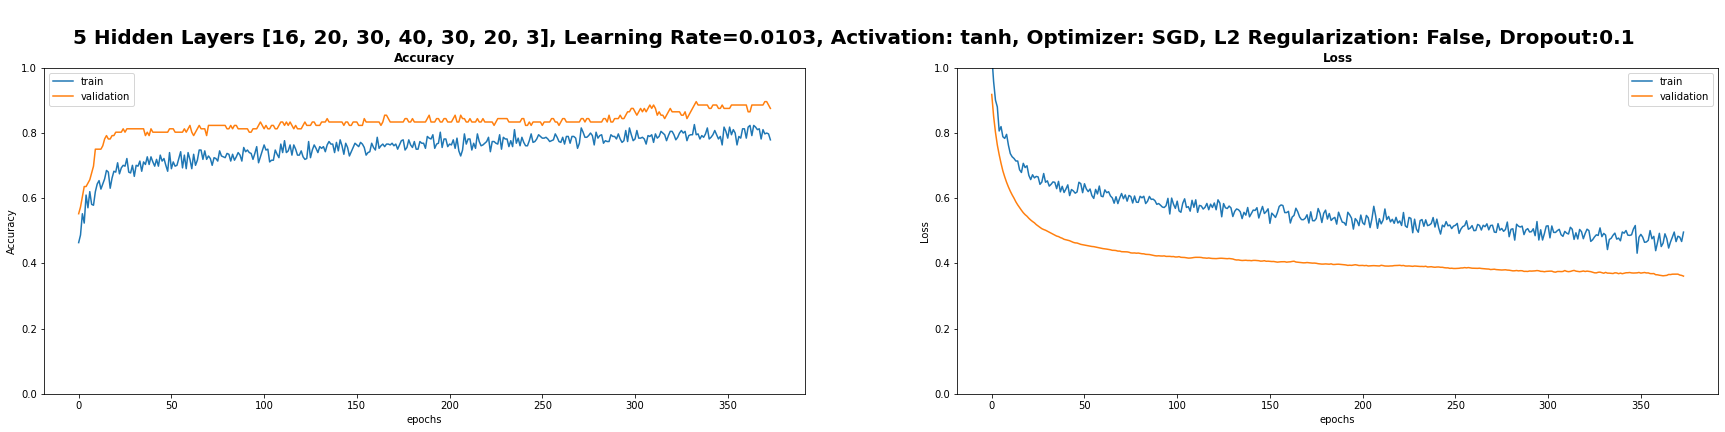


 [[20  0  4]
 [ 0 25  3]
 [ 3  2 39]]

               precision    recall  f1-score   support

           0      0.870     0.833     0.851        24
           1      0.926     0.893     0.909        28
           2      0.848     0.886     0.867        44

    accuracy                          0.875        96
   macro avg      0.881     0.871     0.876        96
weighted avg      0.876     0.875     0.875        96
 





loop:  1 1 


3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.0103, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0.2


0epoch [00:00, ?epoch/s]

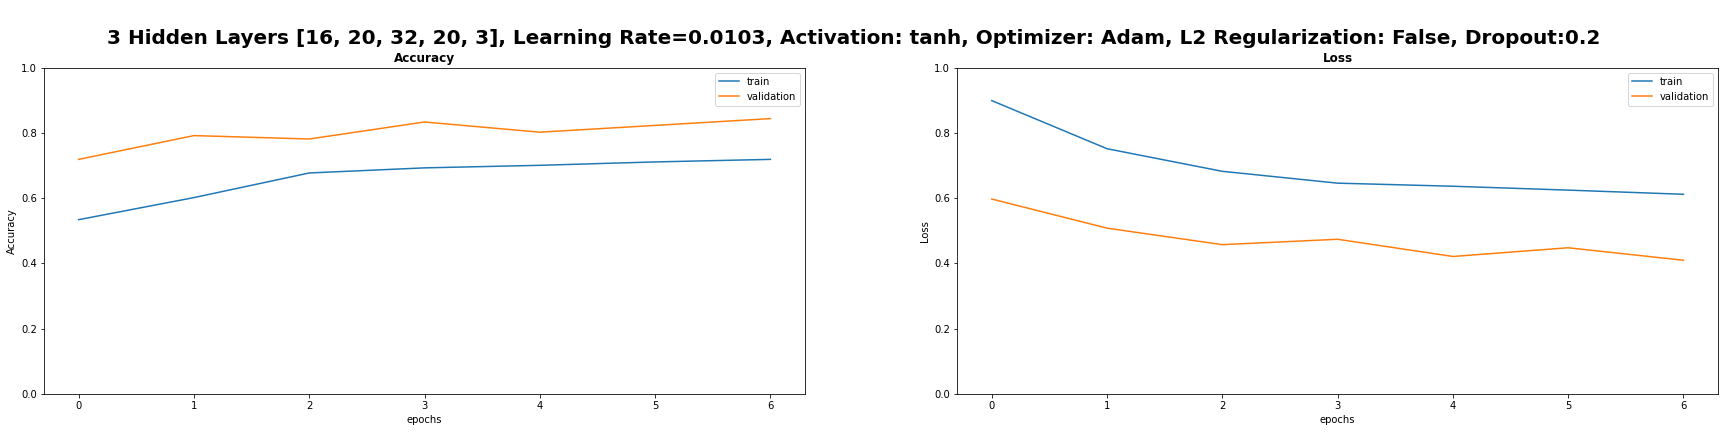


 [[21  0  3]
 [ 0 26  2]
 [ 7  3 34]]

               precision    recall  f1-score   support

           0      0.750     0.875     0.808        24
           1      0.897     0.929     0.912        28
           2      0.872     0.773     0.819        44

    accuracy                          0.844        96
   macro avg      0.839     0.859     0.846        96
weighted avg      0.849     0.844     0.844        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.0103, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0.2


0epoch [00:00, ?epoch/s]

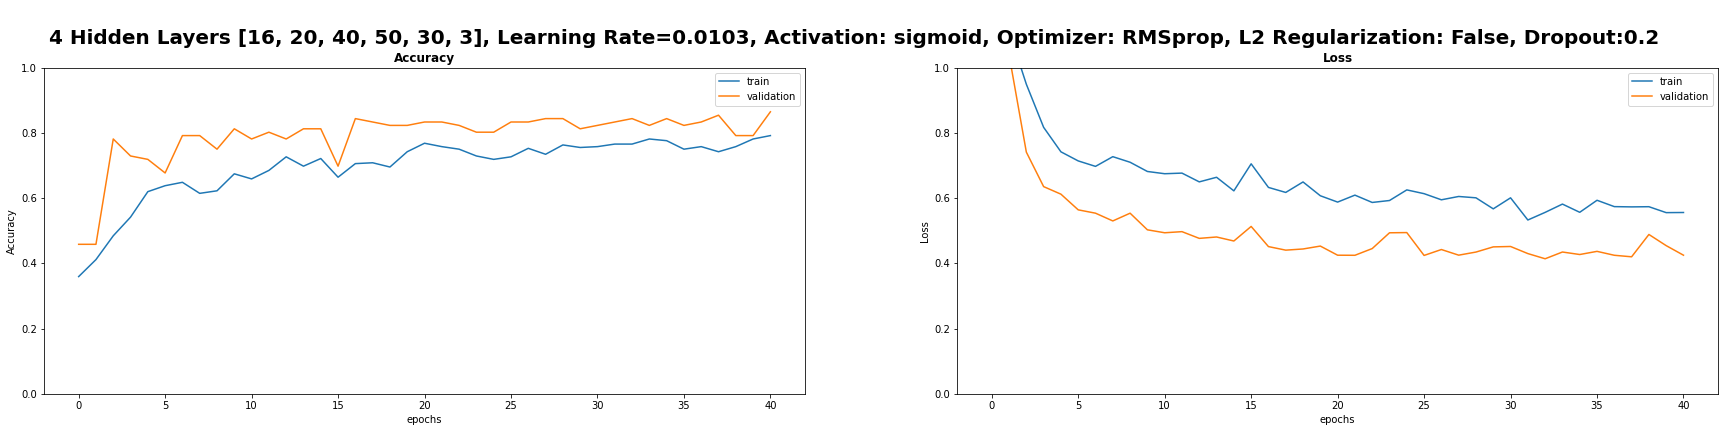


 [[20  0  4]
 [ 0 27  1]
 [ 5  3 36]]

               precision    recall  f1-score   support

           0      0.800     0.833     0.816        24
           1      0.900     0.964     0.931        28
           2      0.878     0.818     0.847        44

    accuracy                          0.865        96
   macro avg      0.859     0.872     0.865        96
weighted avg      0.865     0.865     0.864        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.0103, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0.2


0epoch [00:00, ?epoch/s]

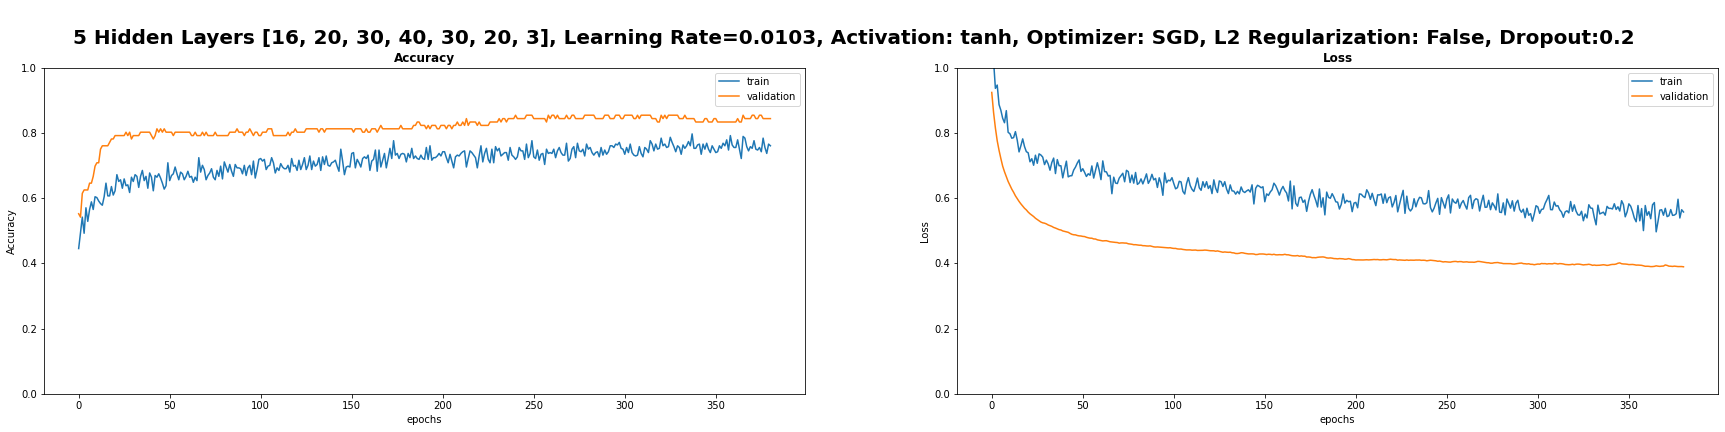


 [[20  0  4]
 [ 0 25  3]
 [ 6  2 36]]

               precision    recall  f1-score   support

           0      0.769     0.833     0.800        24
           1      0.926     0.893     0.909        28
           2      0.837     0.818     0.828        44

    accuracy                          0.844        96
   macro avg      0.844     0.848     0.846        96
weighted avg      0.846     0.844     0.844        96
 





loop:  1 2 


3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.0103, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0.3


0epoch [00:00, ?epoch/s]

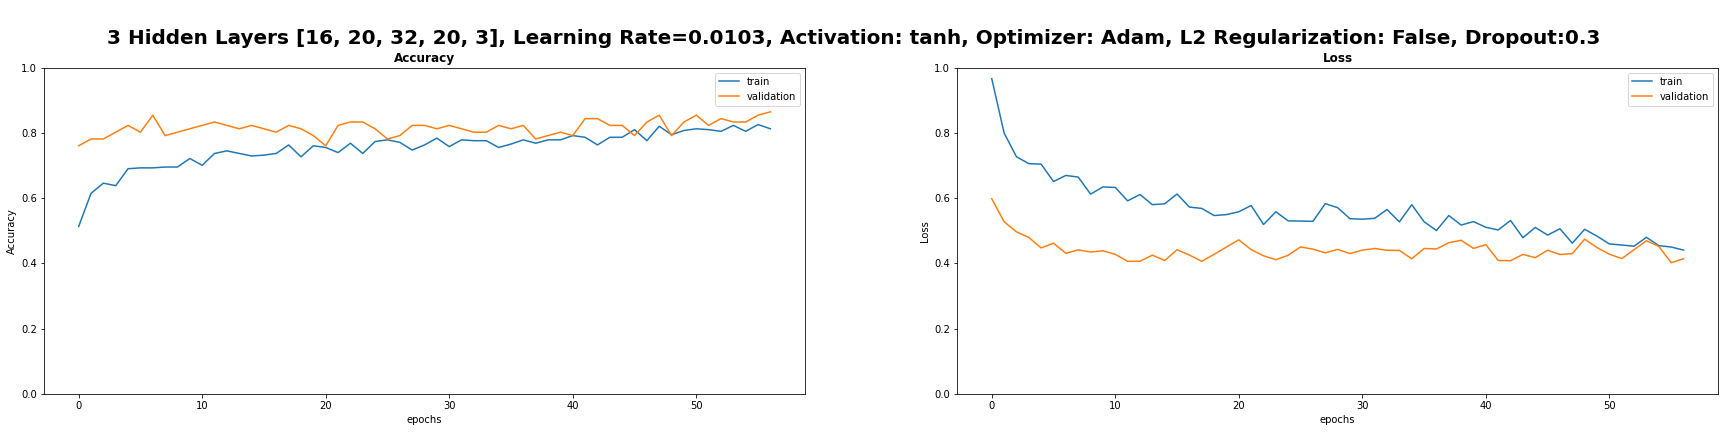


 [[20  0  4]
 [ 0 24  4]
 [ 3  2 39]]

               precision    recall  f1-score   support

           0      0.870     0.833     0.851        24
           1      0.923     0.857     0.889        28
           2      0.830     0.886     0.857        44

    accuracy                          0.865        96
   macro avg      0.874     0.859     0.866        96
weighted avg      0.867     0.865     0.865        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.0103, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0.3


0epoch [00:00, ?epoch/s]

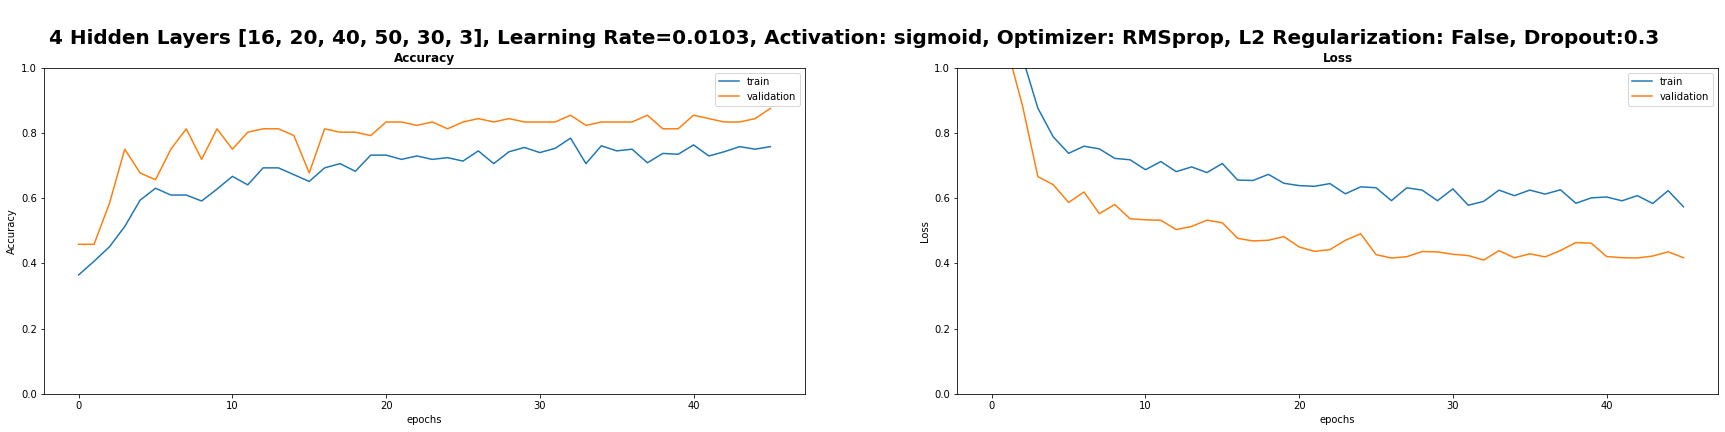


 [[19  0  5]
 [ 0 26  2]
 [ 2  3 39]]

               precision    recall  f1-score   support

           0      0.905     0.792     0.844        24
           1      0.897     0.929     0.912        28
           2      0.848     0.886     0.867        44

    accuracy                          0.875        96
   macro avg      0.883     0.869     0.874        96
weighted avg      0.876     0.875     0.874        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.0103, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0.3


0epoch [00:00, ?epoch/s]

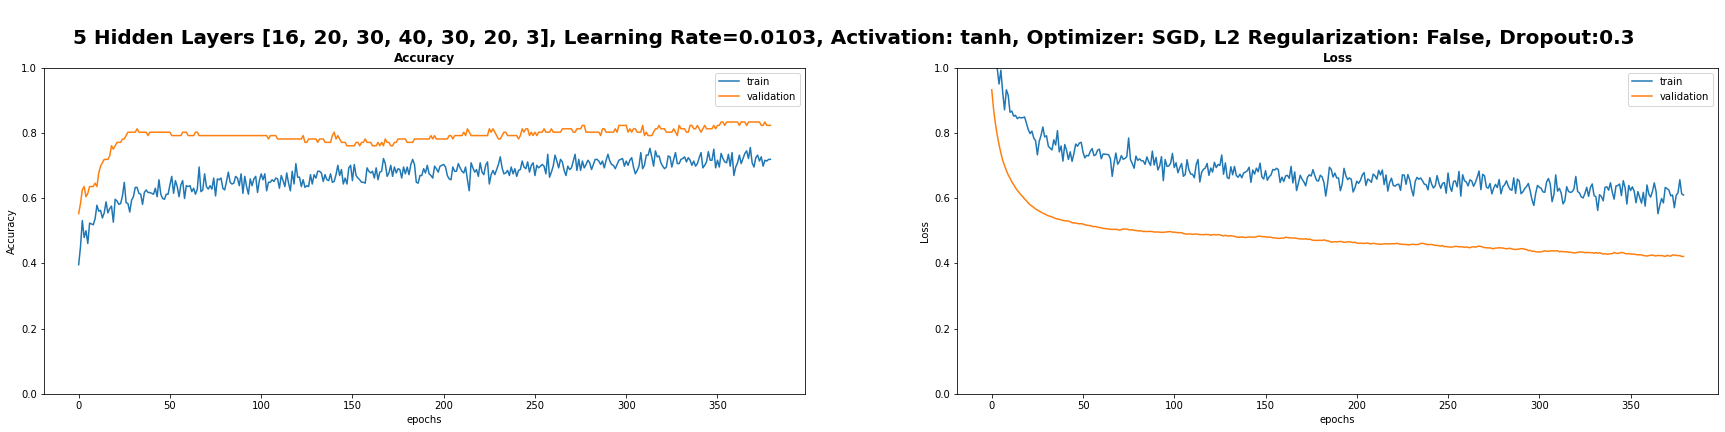


 [[22  0  2]
 [ 0 27  1]
 [11  3 30]]

               precision    recall  f1-score   support

           0      0.667     0.917     0.772        24
           1      0.900     0.964     0.931        28
           2      0.909     0.682     0.779        44

    accuracy                          0.823        96
   macro avg      0.825     0.854     0.827        96
weighted avg      0.846     0.823     0.822        96
 





loop:  1 3 


3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.0103, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0.5


0epoch [00:00, ?epoch/s]

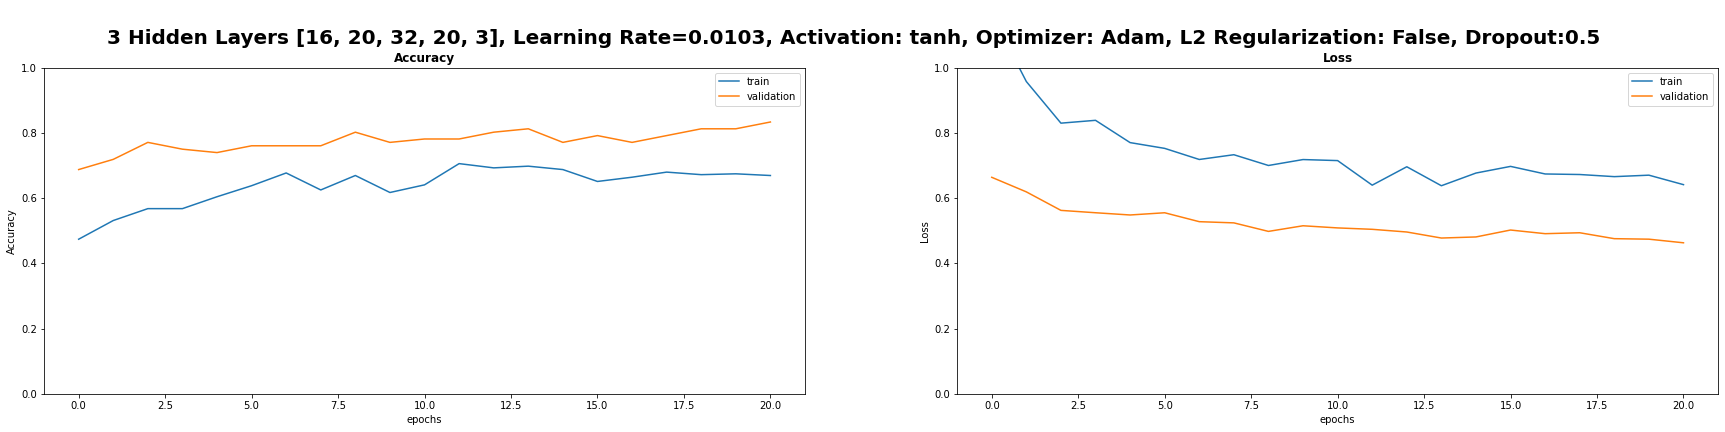


 [[22  0  2]
 [ 0 27  1]
 [ 9  4 31]]

               precision    recall  f1-score   support

           0      0.710     0.917     0.800        24
           1      0.871     0.964     0.915        28
           2      0.912     0.705     0.795        44

    accuracy                          0.833        96
   macro avg      0.831     0.862     0.837        96
weighted avg      0.849     0.833     0.831        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.0103, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0.5


0epoch [00:00, ?epoch/s]

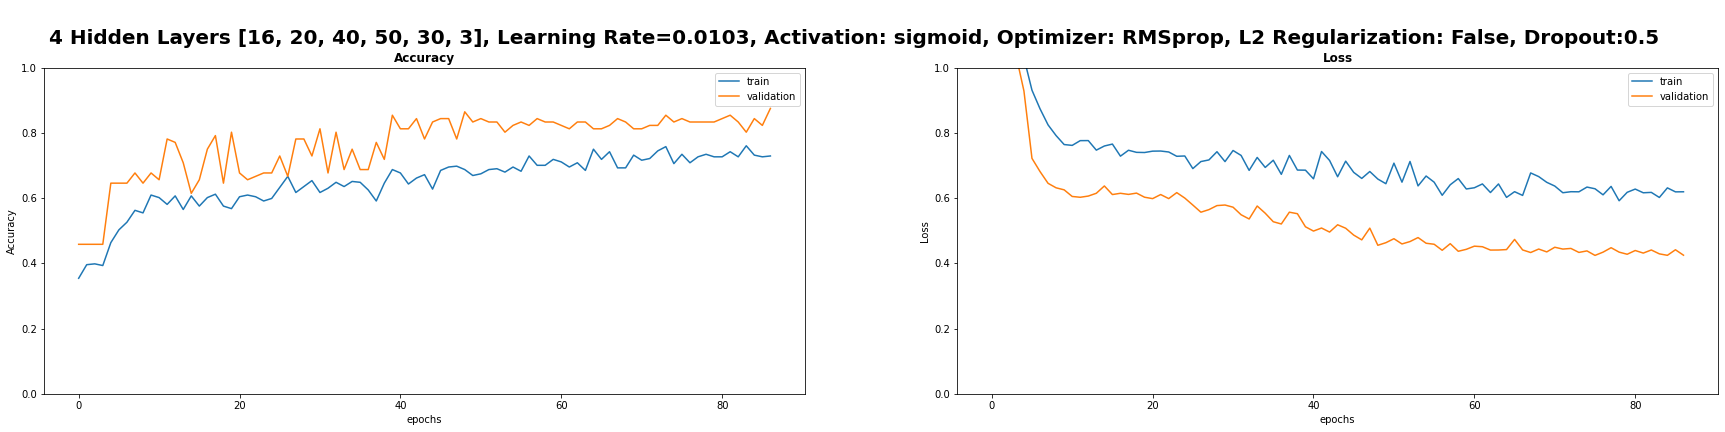


 [[20  0  4]
 [ 0 26  2]
 [ 4  2 38]]

               precision    recall  f1-score   support

           0      0.833     0.833     0.833        24
           1      0.929     0.929     0.929        28
           2      0.864     0.864     0.864        44

    accuracy                          0.875        96
   macro avg      0.875     0.875     0.875        96
weighted avg      0.875     0.875     0.875        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.0103, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0.5


0epoch [00:00, ?epoch/s]

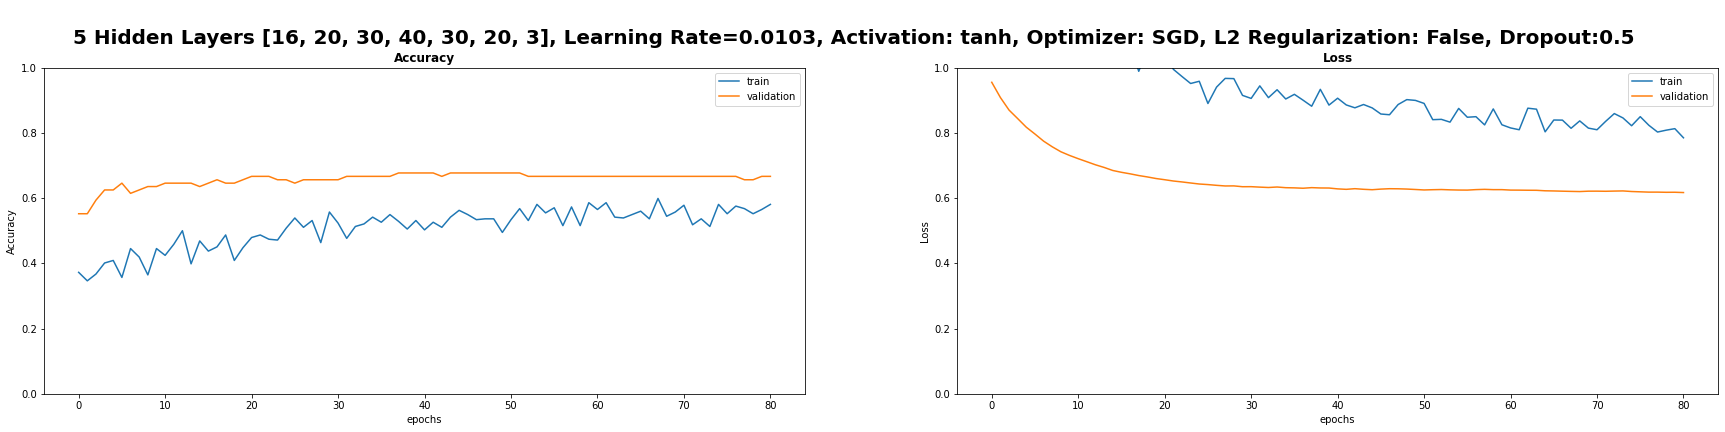


 [[24  0  0]
 [ 0 28  0]
 [20 12 12]]

               precision    recall  f1-score   support

           0      0.545     1.000     0.706        24
           1      0.700     1.000     0.824        28
           2      1.000     0.273     0.429        44

    accuracy                          0.667        96
   macro avg      0.748     0.758     0.653        96
weighted avg      0.799     0.667     0.613        96
 





loop:  2 0 


3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.0018, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0.1


0epoch [00:00, ?epoch/s]

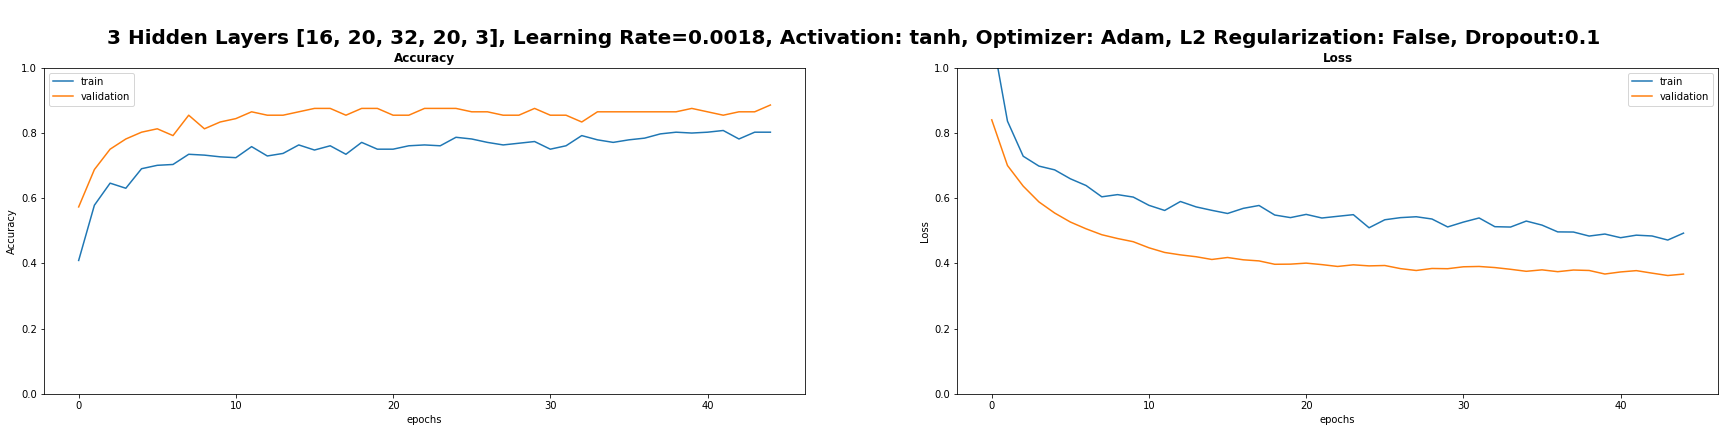


 [[21  0  3]
 [ 0 25  3]
 [ 3  2 39]]

               precision    recall  f1-score   support

           0      0.875     0.875     0.875        24
           1      0.926     0.893     0.909        28
           2      0.867     0.886     0.876        44

    accuracy                          0.885        96
   macro avg      0.889     0.885     0.887        96
weighted avg      0.886     0.885     0.886        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.0018, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0.1


0epoch [00:00, ?epoch/s]

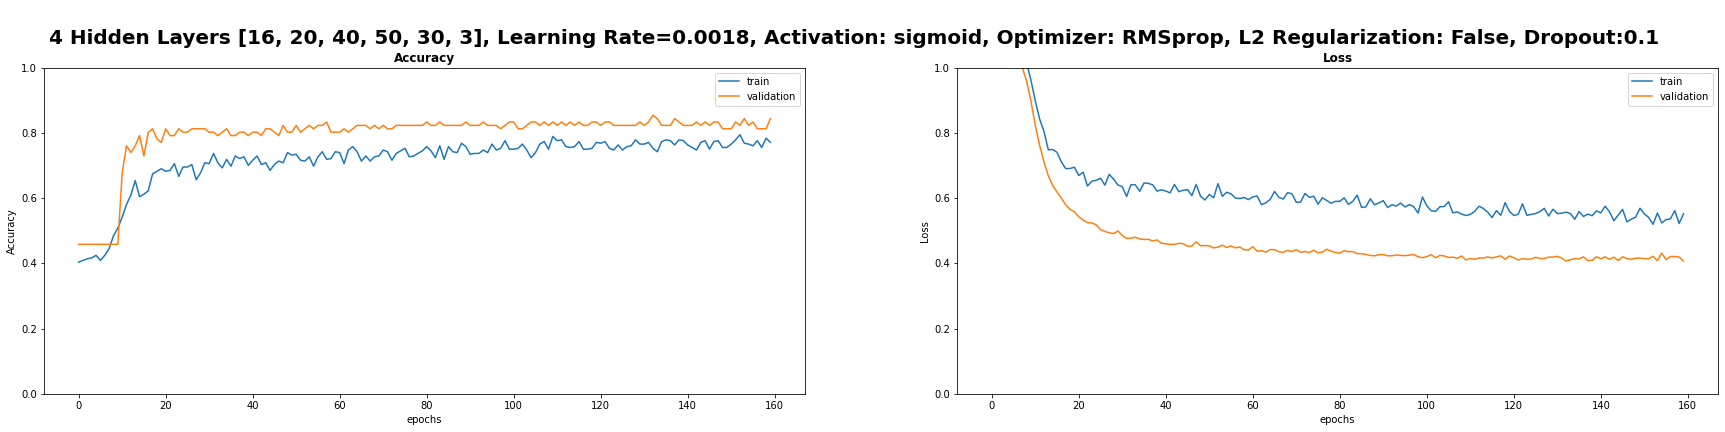


 [[20  0  4]
 [ 0 26  2]
 [ 6  3 35]]

               precision    recall  f1-score   support

           0      0.769     0.833     0.800        24
           1      0.897     0.929     0.912        28
           2      0.854     0.795     0.824        44

    accuracy                          0.844        96
   macro avg      0.840     0.852     0.845        96
weighted avg      0.845     0.844     0.844        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.0018, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0.1


0epoch [00:00, ?epoch/s]

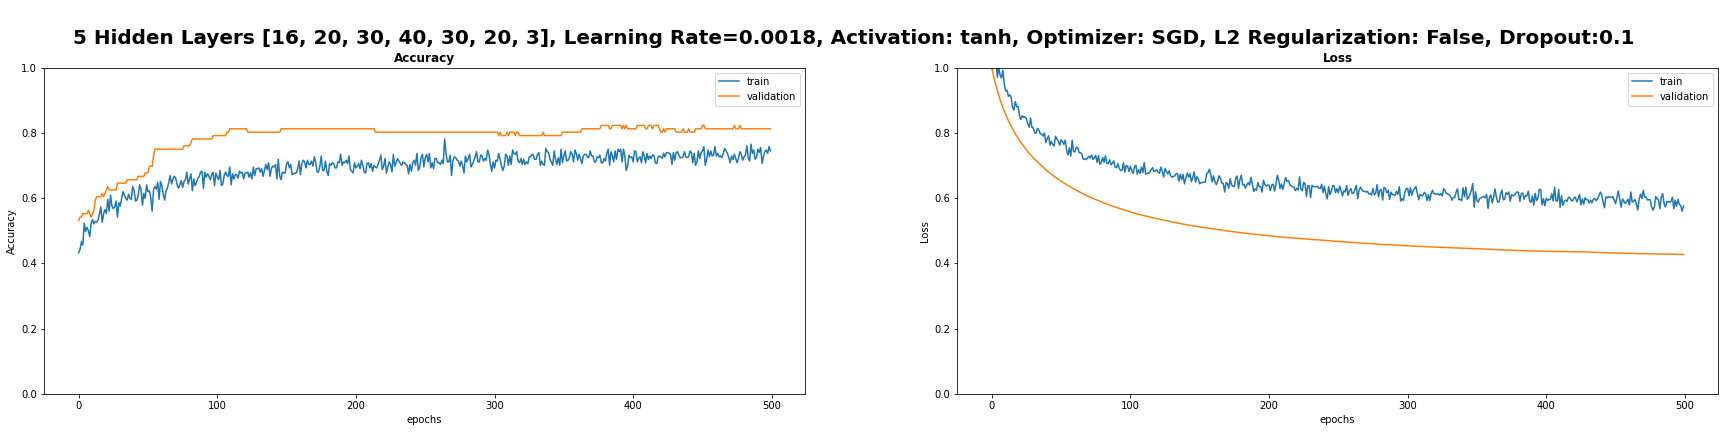


 [[20  0  4]
 [ 0 26  2]
 [ 8  4 32]]

               precision    recall  f1-score   support

           0      0.714     0.833     0.769        24
           1      0.867     0.929     0.897        28
           2      0.842     0.727     0.780        44

    accuracy                          0.812        96
   macro avg      0.808     0.830     0.815        96
weighted avg      0.817     0.812     0.812        96
 





loop:  2 1 


3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.0018, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0.2


0epoch [00:00, ?epoch/s]

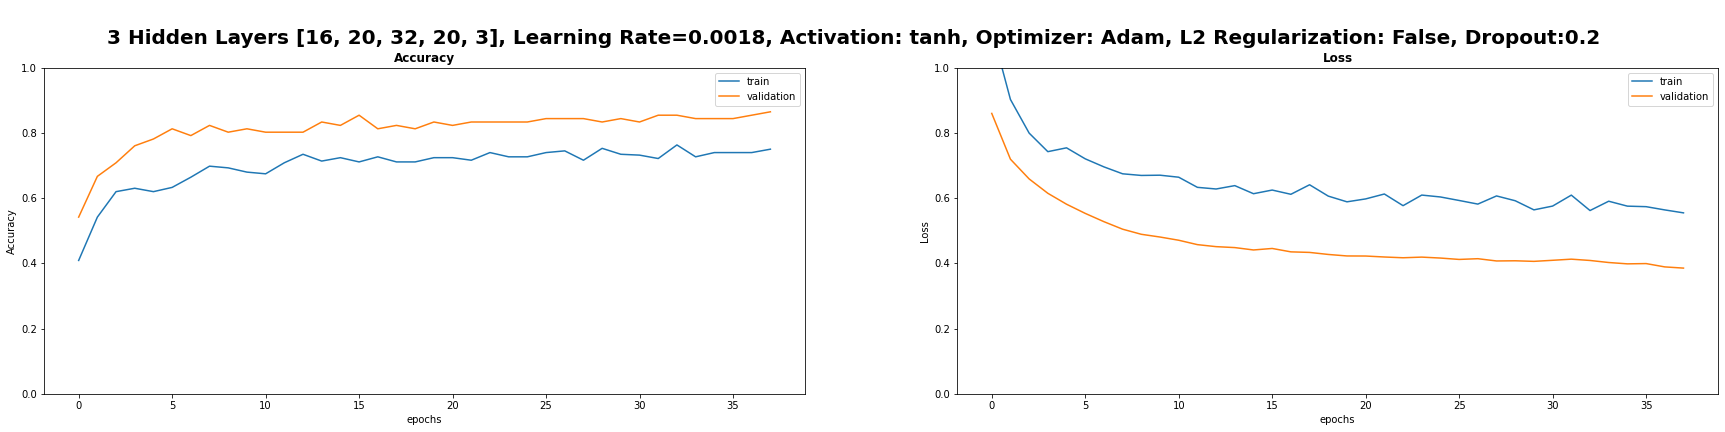


 [[20  0  4]
 [ 0 25  3]
 [ 3  3 38]]

               precision    recall  f1-score   support

           0      0.870     0.833     0.851        24
           1      0.893     0.893     0.893        28
           2      0.844     0.864     0.854        44

    accuracy                          0.865        96
   macro avg      0.869     0.863     0.866        96
weighted avg      0.865     0.865     0.865        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.0018, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0.2


0epoch [00:00, ?epoch/s]

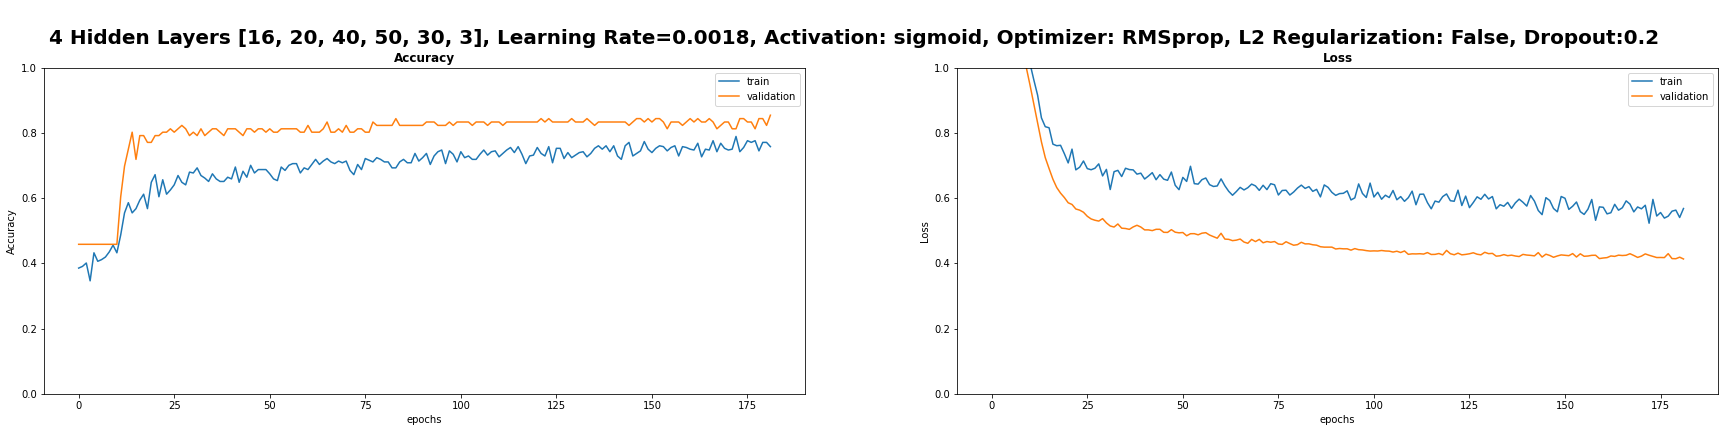


 [[20  0  4]
 [ 0 27  1]
 [ 6  3 35]]

               precision    recall  f1-score   support

           0      0.769     0.833     0.800        24
           1      0.900     0.964     0.931        28
           2      0.875     0.795     0.833        44

    accuracy                          0.854        96
   macro avg      0.848     0.864     0.855        96
weighted avg      0.856     0.854     0.853        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.0018, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0.2


0epoch [00:00, ?epoch/s]

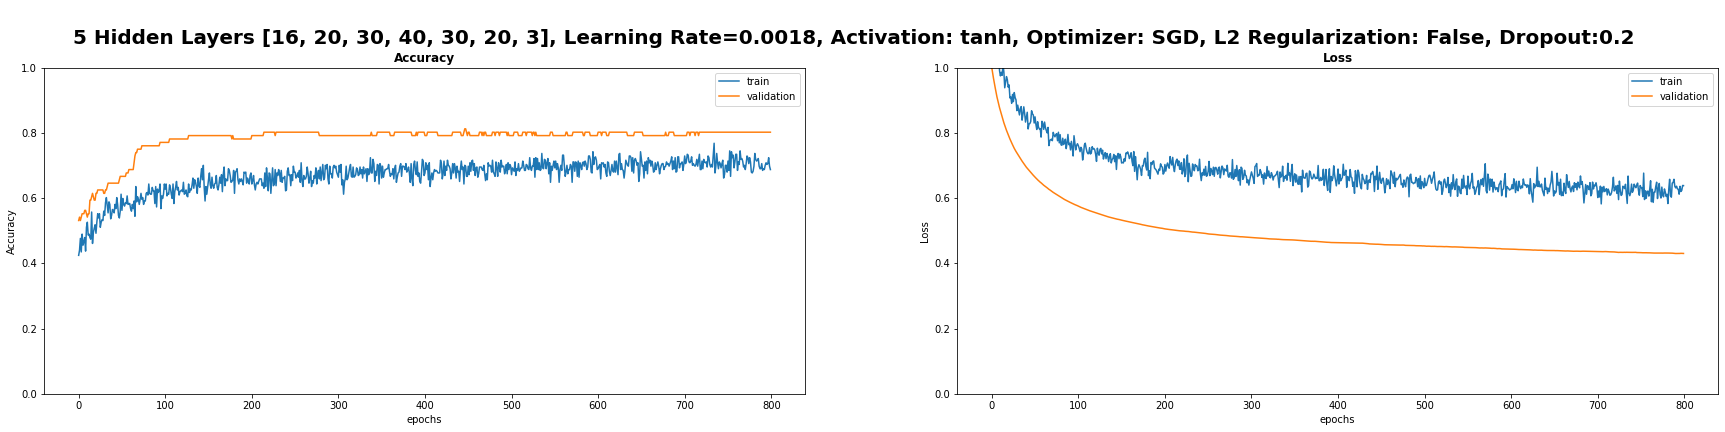


 [[22  0  2]
 [ 0 26  2]
 [ 9  6 29]]

               precision    recall  f1-score   support

           0      0.710     0.917     0.800        24
           1      0.812     0.929     0.867        28
           2      0.879     0.659     0.753        44

    accuracy                          0.802        96
   macro avg      0.800     0.835     0.807        96
weighted avg      0.817     0.802     0.798        96
 





loop:  2 2 


3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.0018, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0.3


0epoch [00:00, ?epoch/s]

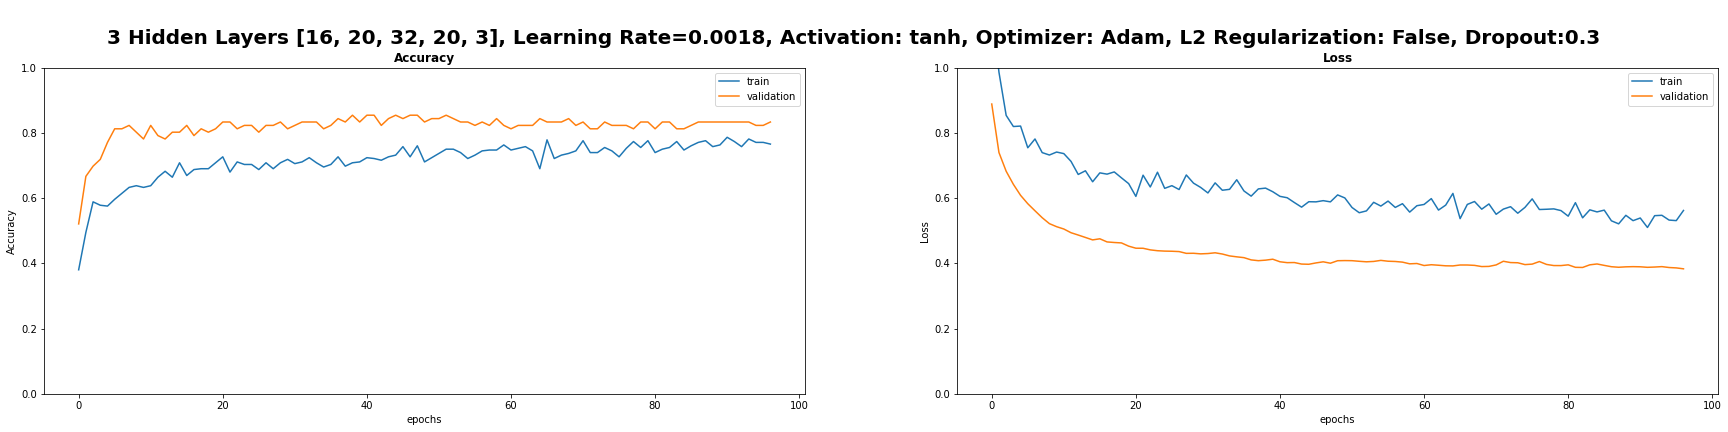


 [[20  0  4]
 [ 0 25  3]
 [ 6  3 35]]

               precision    recall  f1-score   support

           0      0.769     0.833     0.800        24
           1      0.893     0.893     0.893        28
           2      0.833     0.795     0.814        44

    accuracy                          0.833        96
   macro avg      0.832     0.841     0.836        96
weighted avg      0.835     0.833     0.833        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.0018, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0.3


0epoch [00:00, ?epoch/s]

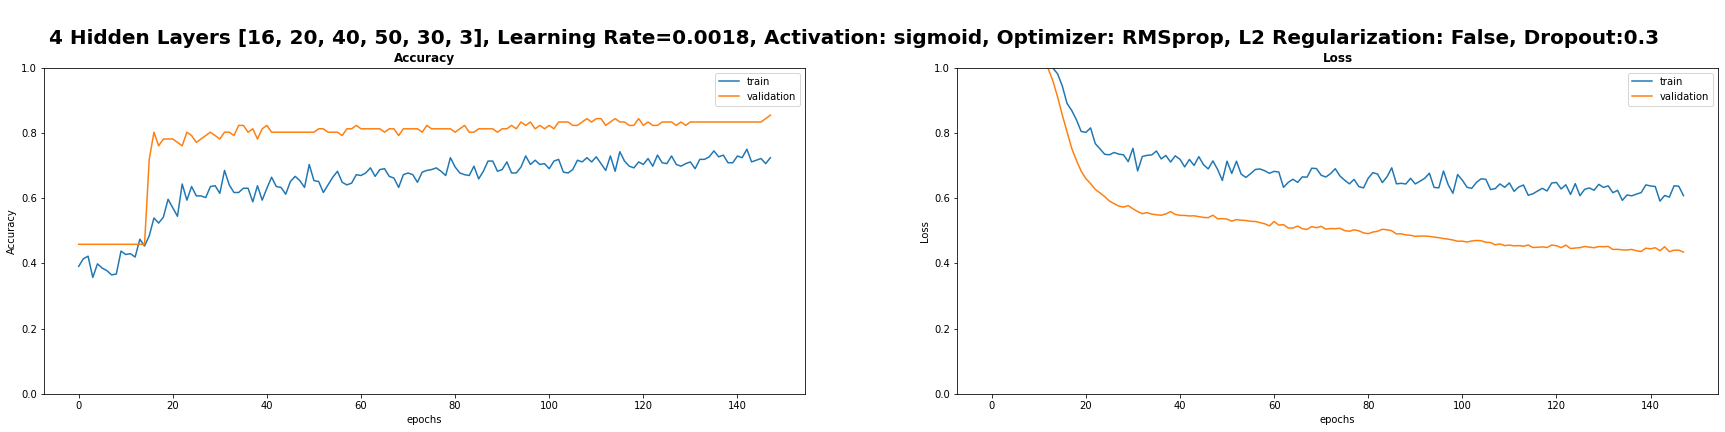


 [[20  0  4]
 [ 0 27  1]
 [ 6  3 35]]

               precision    recall  f1-score   support

           0      0.769     0.833     0.800        24
           1      0.900     0.964     0.931        28
           2      0.875     0.795     0.833        44

    accuracy                          0.854        96
   macro avg      0.848     0.864     0.855        96
weighted avg      0.856     0.854     0.853        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.0018, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0.3


0epoch [00:00, ?epoch/s]

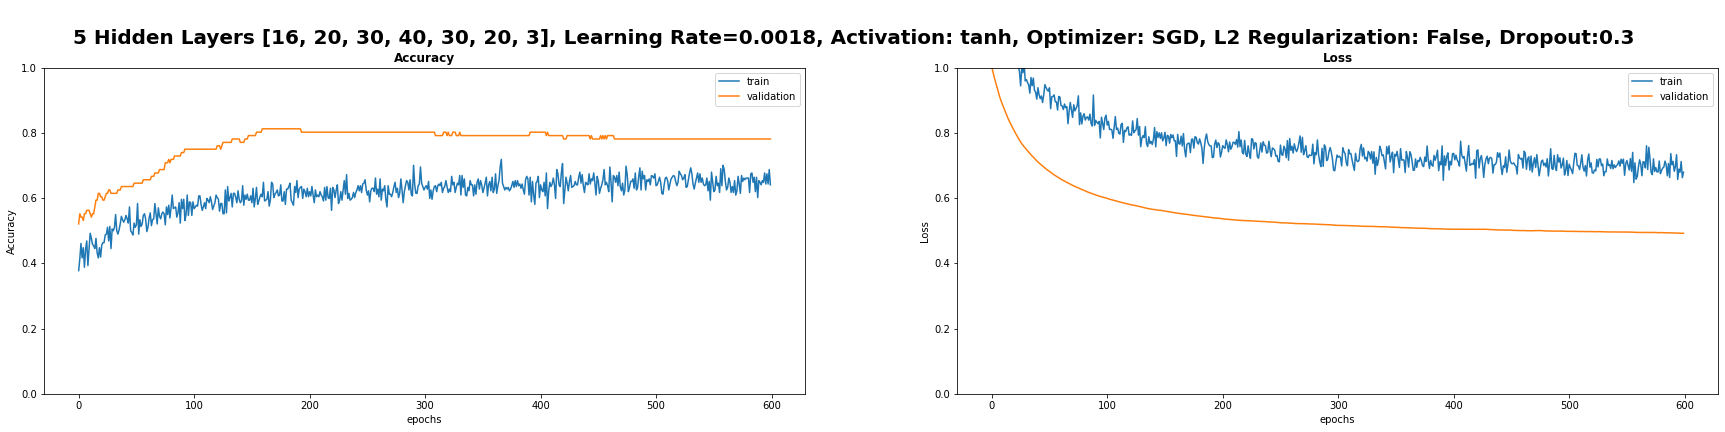


 [[23  0  1]
 [ 0 27  1]
 [13  6 25]]

               precision    recall  f1-score   support

           0      0.639     0.958     0.767        24
           1      0.818     0.964     0.885        28
           2      0.926     0.568     0.704        44

    accuracy                          0.781        96
   macro avg      0.794     0.830     0.785        96
weighted avg      0.823     0.781     0.773        96
 





loop:  2 3 


3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.0018, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0.5


0epoch [00:00, ?epoch/s]

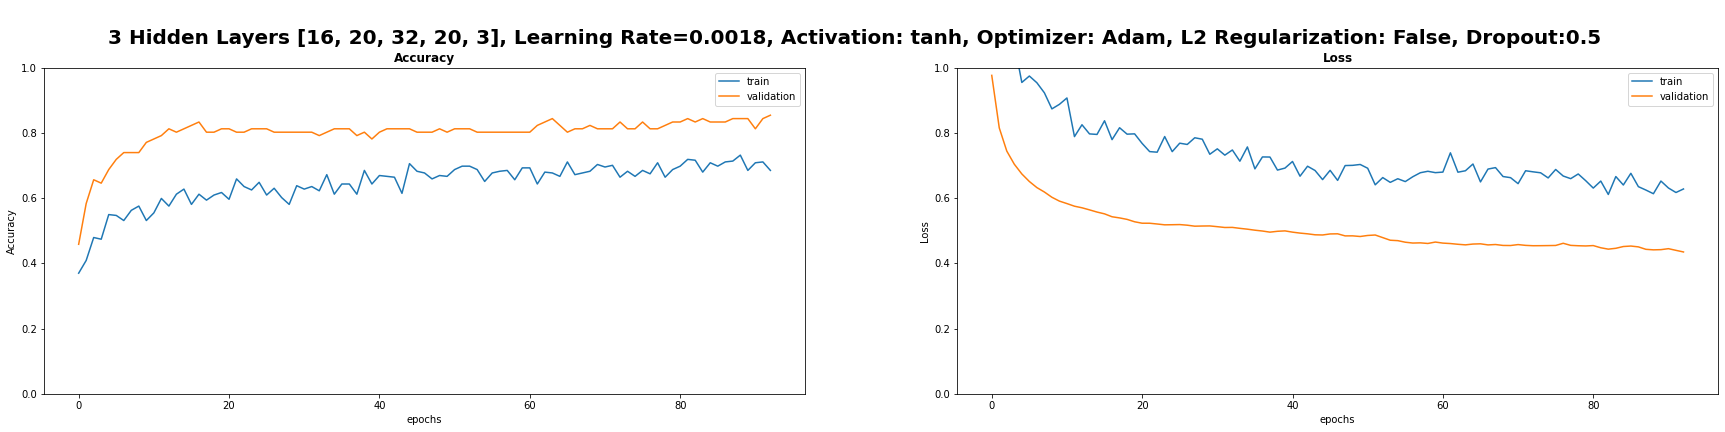


 [[22  0  2]
 [ 0 26  2]
 [ 7  3 34]]

               precision    recall  f1-score   support

           0      0.759     0.917     0.830        24
           1      0.897     0.929     0.912        28
           2      0.895     0.773     0.829        44

    accuracy                          0.854        96
   macro avg      0.850     0.873     0.857        96
weighted avg      0.861     0.854     0.854        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.0018, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0.5


0epoch [00:00, ?epoch/s]

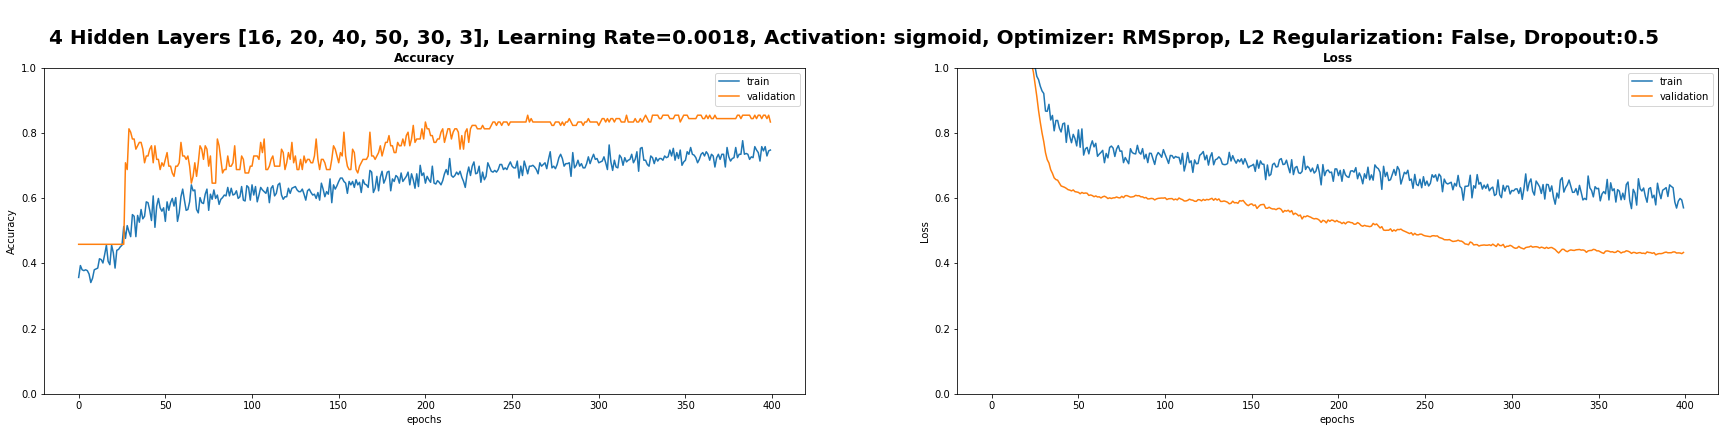


 [[22  0  2]
 [ 0 27  1]
 [10  3 31]]

               precision    recall  f1-score   support

           0      0.688     0.917     0.786        24
           1      0.900     0.964     0.931        28
           2      0.912     0.705     0.795        44

    accuracy                          0.833        96
   macro avg      0.833     0.862     0.837        96
weighted avg      0.852     0.833     0.832        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.0018, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0.5


0epoch [00:00, ?epoch/s]

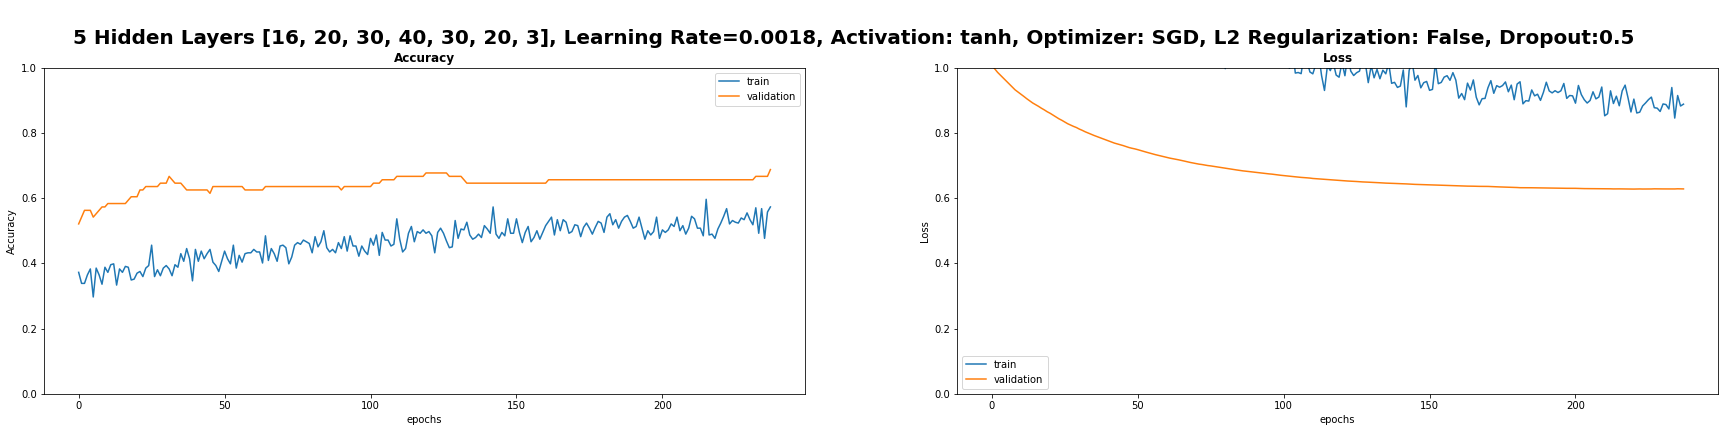


 [[23  0  1]
 [ 0 28  0]
 [17 12 15]]

               precision    recall  f1-score   support

           0      0.575     0.958     0.719        24
           1      0.700     1.000     0.824        28
           2      0.938     0.341     0.500        44

    accuracy                          0.688        96
   macro avg      0.737     0.766     0.681        96
weighted avg      0.778     0.688     0.649        96
 







In [28]:
# print plots
print_plot = True

epochs = [[[14, 22, 267], [13, 33, 100], [34, 36, 220], [24, 81, 31]],
          [[22, 33, 374], [7, 41, 381], [57, 46, 380], [21, 87, 81]],
          [[45, 160, 500], [38, 182, 800], [97, 148, 600], [93, 400, 238]]]

History_ = {}
for l in range(len(lrs)):
    lr = lrs[l]
    for d in range(len(dropouts)):
        print("loop: ", l, d, "\n")
        dropout = dropouts[d]

        # Three layer model with adam and tanh
        Adam = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
        History_[f"Three layers: alpha {lr}, dropout {dropout}"] = n_hidden_layer_model(optimizer=Adam, architecture=[16, 20, 32, 20, 3],
                                                                                        dropout=dropout, activation="tanh", learning_rate=lr, epochs=epochs[l][d][0], Print=print_plot)
        # Four layer model with RMSdrop and sigmoid
        RMSprop = tf.keras.optimizers.RMSprop(learning_rate=lr, rho=0.9, momentum=0.0, epsilon=1e-07)
        History_[f"Four layers: alpha {lr}, dropout {dropout}"] = n_hidden_layer_model(optimizer=RMSprop, architecture=[16, 20, 40, 50, 30, 3],
                                                                                       dropout=dropout, activation="sigmoid", learning_rate=lr, epochs=epochs[l][d][1], Print=print_plot)
        # Five layer model with SGD and tanh
        SGD = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.0)
        History_[f"Five layers: alpha {lr}, dropout {dropout}"] = n_hidden_layer_model(optimizer=SGD, architecture=[16, 20, 30, 40, 30, 20, 3],
                                                                                       dropout=dropout, activation="tanh", learning_rate=lr, epochs=epochs[l][d][2], Print=print_plot)

###Print random values table

In [29]:
table_data=[]
for key  in History_:
    table_data.append(find_max_i(History_[key]))

print(colored("\n\n3,4 and 5 hidden layer Models with randomo initializations:\n", 'yellow', attrs=['bold']), "\nalpha =", learning_rate, "\n")
print(print_table(
    table_data,
    head=["Number of Layers",
          "Accuracy and Loss of train set\naccording to Min train Loss",
          "Accuracy and Loss of val set\naccording to Min val Loss",
          "Accuracy and Loss of train set\naccording to Max train Accuracy",
          "Accuracy and Loss of val set\naccording to Max val Accuracy"], rows=list(History_.keys())))



3,4 and 5 hidden layer Models with randomo initializations:
 
alpha = 0.01 

╒═════════════════════════════════════════╤══════════════════════════════════╤════════════════════════════════╤═══════════════════════════════════╤═════════════════════════════════╕
│ Number of Layers                        │ Accuracy and Loss of train set   │ Accuracy and Loss of val set   │ Accuracy and Loss of train set    │ Accuracy and Loss of val set    │
│                                         │ according to Min train Loss      │ according to Min val Loss      │ according to Max train Accuracy   │ according to Max val Accuracy   │
╞═════════════════════════════════════════╪══════════════════════════════════╪════════════════════════════════╪═══════════════════════════════════╪═════════════════════════════════╡
│ Three layers: alpha 0.0169, dropout 0.1 │ (epoch index:13)                 │ (epoch index:13)               │ (epoch index:13)                  │ (epoch index:11)                │
│          

### Best model from drop out

In [30]:
print("best macro avg: ", np.sort(np.array([0.681, 0.837, 0.857, 0.785, 0.855, 0.836, 0.807, 0.855, 0.866, 0.815, 0.845, 0.887, 0.653, 0.875, 0.837, 0.827, 0.874, 0.866, 0.846,
          0.865, 0.846, 0.876, 0.855, 0.826, 0.681, 0.876, 0.847, 0.837, 0.874, 0.896, 0.816, 0.826, 0.846, 0.907, 0.844, 0.834]))[::-1])
print("\n that is: Five layers, SGD, tanh, learningrate: 0.0169, dropout 0.1, 267 epoch")

best macro avg:  [0.907 0.896 0.887 0.876 0.876 0.875 0.874 0.874 0.866 0.866 0.865 0.857
 0.855 0.855 0.855 0.847 0.846 0.846 0.846 0.845 0.844 0.837 0.837 0.837
 0.836 0.834 0.827 0.826 0.826 0.816 0.815 0.807 0.785 0.681 0.681 0.653]

 that is: Five layers, SGD, tanh, learningrate: 0.0169, dropout 0.1, 267 epoch



5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.0169, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0.1


0epoch [00:00, ?epoch/s]

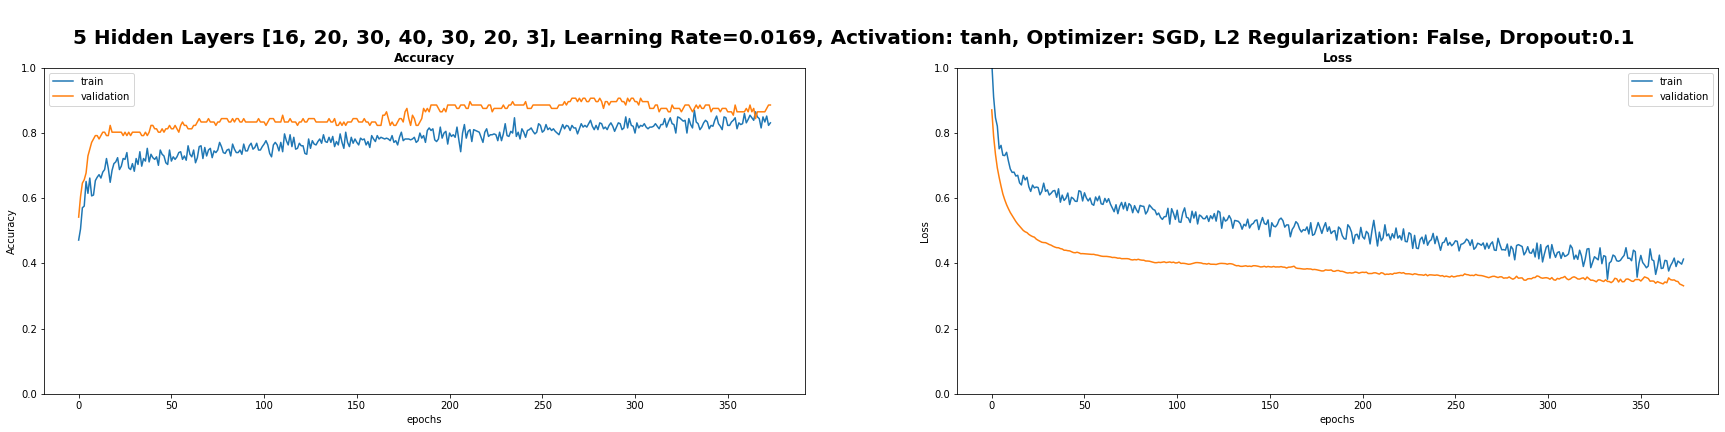


 [[21  0  3]
 [ 0 25  3]
 [ 2  3 39]]

               precision    recall  f1-score   support

           0      0.913     0.875     0.894        24
           1      0.893     0.893     0.893        28
           2      0.867     0.886     0.876        44

    accuracy                          0.885        96
   macro avg      0.891     0.885     0.888        96
weighted avg      0.886     0.885     0.886        96
 







In [31]:
# Five layer model with SGD and tanh
SGD = tf.keras.optimizers.SGD(learning_rate=0.0169, momentum=0.0)
His={}
His["plot"]= n_hidden_layer_model(optimizer=SGD, architecture=[16, 20, 30, 40, 30, 20, 3], dropout=0.1, activation="tanh", learning_rate=0.0169, epochs=374, Print=True)

In [32]:
table_data=[]
for key  in His:
    table_data.append(find_max_i(His[key]))

print(colored("\n\nFive layers, SGD, tanh, learningrate: 0.0169, dropout 0.1,:\n", 'yellow', attrs=['bold']), "\nalpha =", learning_rate, "\n")
print(print_table(
    table_data,
    head=["Number of Layers",
          "Accuracy and Loss of train set\naccording to Min train Loss",
          "Accuracy and Loss of val set\naccording to Min val Loss",
          "Accuracy and Loss of train set\naccording to Max train Accuracy",
          "Accuracy and Loss of val set\naccording to Max val Accuracy"], rows=list(His.keys())))



Five layers, SGD, tanh, learningrate: 0.0169, dropout 0.1,:
 
alpha = 0.01 

╒════════════════════╤══════════════════════════════════╤════════════════════════════════╤═══════════════════════════════════╤═════════════════════════════════╕
│ Number of Layers   │ Accuracy and Loss of train set   │ Accuracy and Loss of val set   │ Accuracy and Loss of train set    │ Accuracy and Loss of val set    │
│                    │ according to Min train Loss      │ according to Min val Loss      │ according to Max train Accuracy   │ according to Max val Accuracy   │
╞════════════════════╪══════════════════════════════════╪════════════════════════════════╪═══════════════════════════════════╪═════════════════════════════════╡
│ plot               │ (epoch index:332)                │ (epoch index:373)              │ (epoch index:332)                 │ (epoch index:266)               │
│                    │ Accuracy: 0.8697916865348816     │ Accuracy: 0.8854166865348816   │ Accuracy: 0.8697916865348

##Batch normalization


3 Hidden Layers [16, 20, 32, 20, 3], Learning Rate=0.01, Activation: tanh, Optimizer: Adam, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

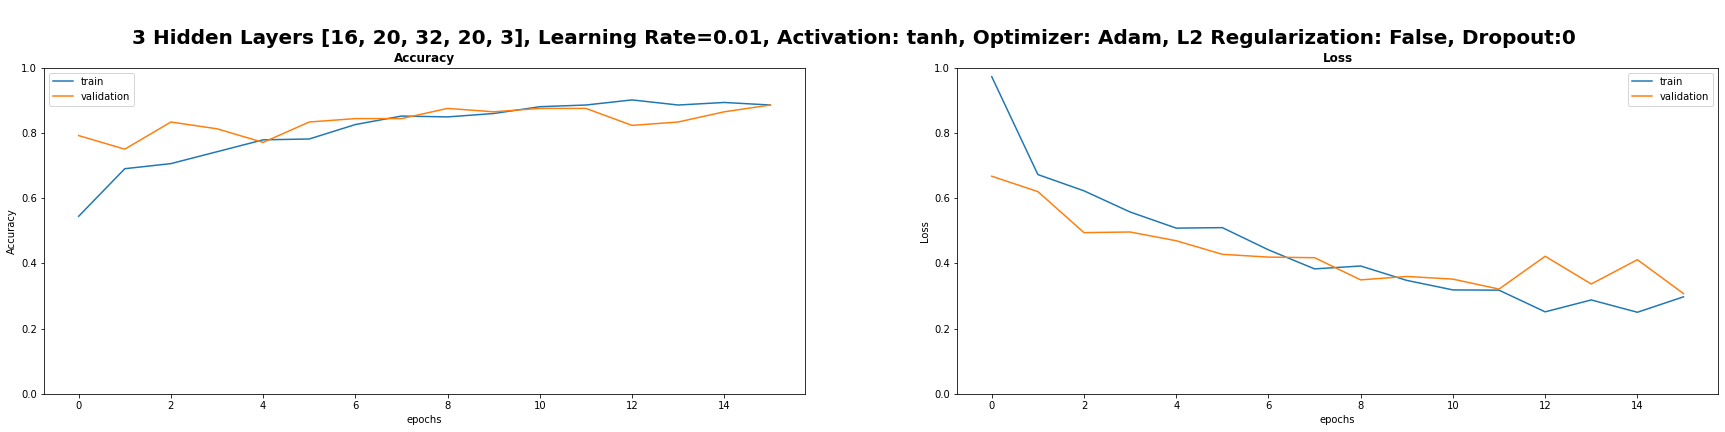


 [[21  0  3]
 [ 0 27  1]
 [ 4  3 37]]

               precision    recall  f1-score   support

           0      0.840     0.875     0.857        24
           1      0.900     0.964     0.931        28
           2      0.902     0.841     0.871        44

    accuracy                          0.885        96
   macro avg      0.881     0.893     0.886        96
weighted avg      0.886     0.885     0.885        96
 






4 Hidden Layers [16, 20, 40, 50, 30, 3], Learning Rate=0.01, Activation: sigmoid, Optimizer: RMSprop, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

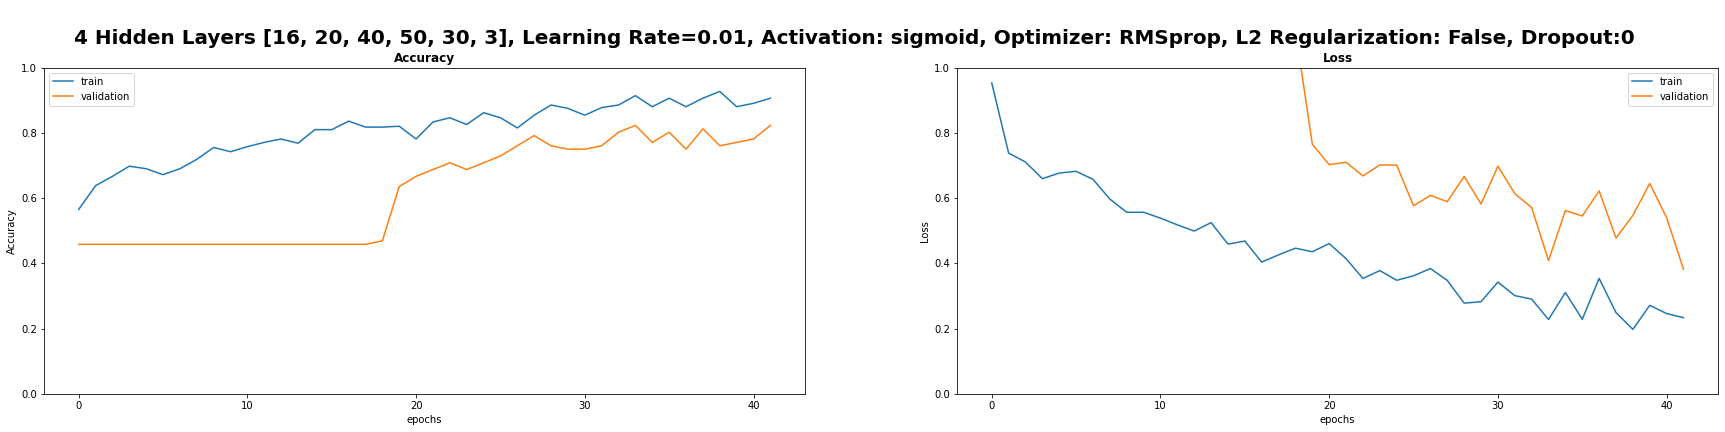


 [[20  0  4]
 [ 0 23  5]
 [ 4  4 36]]

               precision    recall  f1-score   support

           0      0.833     0.833     0.833        24
           1      0.852     0.821     0.836        28
           2      0.800     0.818     0.809        44

    accuracy                          0.823        96
   macro avg      0.828     0.824     0.826        96
weighted avg      0.823     0.823     0.823        96
 






5 Hidden Layers [16, 20, 30, 40, 30, 20, 3], Learning Rate=0.01, Activation: tanh, Optimizer: SGD, L2 Regularization: False, Dropout:0


0epoch [00:00, ?epoch/s]

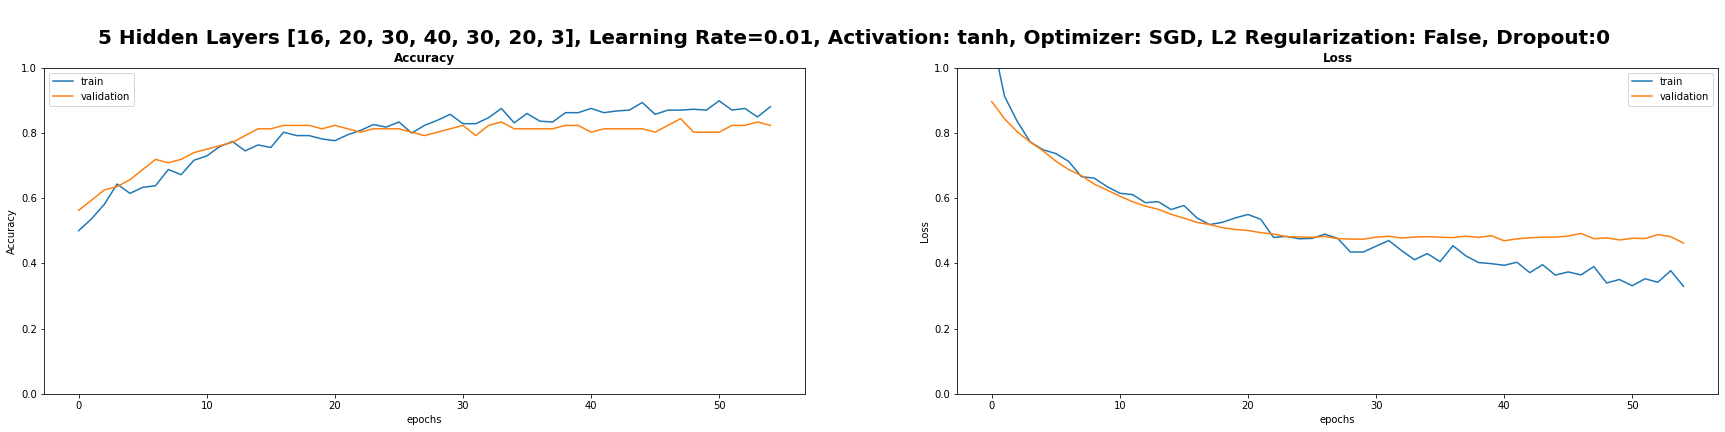


 [[19  0  5]
 [ 0 25  3]
 [ 6  3 35]]

               precision    recall  f1-score   support

           0      0.760     0.792     0.776        24
           1      0.893     0.893     0.893        28
           2      0.814     0.795     0.805        44

    accuracy                          0.823        96
   macro avg      0.822     0.827     0.824        96
weighted avg      0.823     0.823     0.823        96
 







Five layers, SGD, tanh, learningrate: 0.0169, dropout 0.1,:
 
alpha = 0.01 

╒═════════════════════╤══════════════════════════════════╤════════════════════════════════╤═══════════════════════════════════╤═════════════════════════════════╕
│ Layers              │ Accuracy and Loss of train set   │ Accuracy and Loss of val set   │ Accuracy and Loss of train set    │ Accuracy and Loss of val set    │
│                     │ according to Min train Loss      │ according to Min val Loss      │ according to Max train Accuracy   │ according to Max val Accuracy   │
╞══════

In [33]:
# print plots
print_plot = True

His_batch={}

# Three layer model with adam and tanh
Adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_batch["Three layers Adam "] = n_hidden_layer_model(optimizer=Adam, architecture=[16, 20, 32, 20, 3], batch_normalization=True,
                            activation="tanh", learning_rate=0.01, epochs=16, Print=print_plot)
# Four layer model with RMSdrop and sigmoid
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.0, epsilon=1e-07)
His_batch["Four layers RMSprop "] = n_hidden_layer_model(optimizer=RMSprop, architecture=[16, 20, 40, 50, 30, 3], batch_normalization=True,
                            activation="sigmoid", learning_rate=0.01, epochs=42, Print=print_plot)
# Five layer model with SGD and tanh
SGD = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)
His_batch["Five layers SGD "] = n_hidden_layer_model(optimizer=SGD, architecture=[16, 20, 30, 40, 30, 20, 3], batch_normalization=True,
                            activation="tanh", learning_rate=0.01, epochs=55, Print=print_plot)

table_data=[]
for key  in His_batch:
    table_data.append(find_max_i(His_batch[key]))

print(colored("\n\nFive layers, SGD, tanh, learningrate: 0.0169, dropout 0.1,:\n", 'yellow', attrs=['bold']), "\nalpha =", learning_rate, "\n")
print(print_table(
    table_data,
    head=["Layers",
          "Accuracy and Loss of train set\naccording to Min train Loss",
          "Accuracy and Loss of val set\naccording to Min val Loss",
          "Accuracy and Loss of train set\naccording to Max train Accuracy",
          "Accuracy and Loss of val set\naccording to Max val Accuracy"], rows=list(His_batch.keys())))

##*K fold Cross-validation*


In [34]:
def cross_validation(optimizer, architecture, activation, learning_rate, epochs, dropout=0, batch_normalization=False, Print=False):
    # clear session
    tf.keras.backend.clear_session()

    His = None

    # Merge inputs and targets
    inputs = np.concatenate((X_Train, X_Val), axis=0)
    targets = np.concatenate((Y_Train, Y_Val), axis=0)
    num_folds = 5

    # Define the K-fold Cross Validator
    kfold = KFold(n_splits=num_folds, shuffle=True)
    acc_per_fold = []
    loss_per_fold = []

    model = n_hidden_layer_model(optimizer=optimizer, architecture=architecture, dropout=dropout, activation=activation, batch_normalization=batch_normalization, learning_rate=learning_rate,
                                 epochs=epochs, Print=False, return_model=True)
    # K-fold Cross Validation model evaluation
    fold_no = 1
    for train, test in kfold.split(inputs, targets):
        # Generate a print
        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no} ...')

        His = model.fit(inputs[train], targets[train], epochs=epochs, verbose=0, validation_data=(inputs[test], targets[test]), callbacks=[TqdmCallback(verbose=0)])

        # Generate generalization metrics
        scores = model.evaluate(inputs[test], targets[test], verbose=0)
        print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1] * 100}%')
        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])

        # Increase fold number
        fold_no += 1

    # history
    iterations = np.arange(start=0, stop=epochs)
    History = dic_to_np_array(His.history)
    History["iterations"] = iterations
    if Print:
        draw_plot(title, History, k=k)
    Y_Pred = np.argmax(model.predict(X_Val), axis=1)
    print("\n\n",metrics.confusion_matrix(Y_Val, Y_Pred))
    print("\n", metrics.classification_report(Y_Val, Y_Pred, digits=3), "\n\n\n")
    return History, model

In [35]:
His_kfold = {}

# Three layer model Adam with batch mormalization
print(colored("First Model\n", 'yellow', attrs=['bold']))
Adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_kfold["First Model"], model1 = cross_validation(optimizer=Adam, architecture=[16, 20, 32, 20, 3], activation="tanh", learning_rate=0.01, epochs=16, batch_normalization=True)
print("\n\n\n\n")

# Five layer model SGD with drop out and learning_rate=0.0169
print(colored("Second Model\n", 'yellow', attrs=['bold']))
SGD = tf.keras.optimizers.SGD(learning_rate=0.0169, momentum=0.0)
His_kfold["Second Model"], model2 = cross_validation(optimizer=SGD, architecture=[16, 20, 30, 40, 30, 20, 3], learning_rate=0.0169, dropout=0.01, activation="tanh", epochs=267)
print("\n\n\n\n")

# Three layer model Adam
print(colored("Third Model\n", 'yellow', attrs=['bold']))
Adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, )
His_kfold["Third Model"], model3 = cross_validation(optimizer=Adam, architecture=[16, 20, 32, 20, 3], activation="tanh", epochs=8, learning_rate=0.01, Print=False)
print("\n\n\n\n")

# print table
print(colored("\nBest values during 5th fold:\n\n", 'yellow', attrs=['bold']))
table_data = []
for key in His_kfold:
    table_data.append(find_max_i(His_kfold[key]))
print(print_table(
    table_data,
    head=["Models",
          "Accuracy and Loss of train set\naccording to Min train Loss",
          "Accuracy and Loss of val set\naccording to Min val Loss",
          "Accuracy and Loss of train set\naccording to Max train Accuracy",
          "Accuracy and Loss of val set\naccording to Max val Accuracy"], rows=list(His_kfold.keys())))


First Model

------------------------------------------------------------------------
Training for fold 1 ...


0epoch [00:00, ?epoch/s]

Score for fold 1: loss of 0.6640923619270325; accuracy of 70.83333134651184%
------------------------------------------------------------------------
Training for fold 2 ...


0epoch [00:00, ?epoch/s]

Score for fold 2: loss of 0.30767011642456055; accuracy of 89.58333134651184%
------------------------------------------------------------------------
Training for fold 3 ...


0epoch [00:00, ?epoch/s]

Score for fold 3: loss of 0.4068678319454193; accuracy of 85.41666865348816%
------------------------------------------------------------------------
Training for fold 4 ...


0epoch [00:00, ?epoch/s]

Score for fold 4: loss of 0.2867339253425598; accuracy of 92.70833134651184%
------------------------------------------------------------------------
Training for fold 5 ...


0epoch [00:00, ?epoch/s]

Score for fold 5: loss of 0.3154960572719574; accuracy of 90.625%


 [[23  0  1]
 [ 0 27  1]
 [ 0  0 44]]

               precision    recall  f1-score   support

           0      1.000     0.958     0.979        24
           1      1.000     0.964     0.982        28
           2      0.957     1.000     0.978        44

    accuracy                          0.979        96
   macro avg      0.986     0.974     0.979        96
weighted avg      0.980     0.979     0.979        96
 








Second Model

------------------------------------------------------------------------
Training for fold 1 ...


0epoch [00:00, ?epoch/s]

Score for fold 1: loss of 0.6701204180717468; accuracy of 78.125%
------------------------------------------------------------------------
Training for fold 2 ...


0epoch [00:00, ?epoch/s]

Score for fold 2: loss of 0.4798267185688019; accuracy of 82.29166865348816%
------------------------------------------------------------------------
Training for fold 3 ...


0epoch [00:00, ?epoch/s]

Score for fold 3: loss of 0.22383259236812592; accuracy of 91.66666865348816%
------------------------------------------------------------------------
Training for fold 4 ...


0epoch [00:00, ?epoch/s]

Score for fold 4: loss of 0.07026200741529465; accuracy of 95.83333134651184%
------------------------------------------------------------------------
Training for fold 5 ...


0epoch [00:00, ?epoch/s]

Score for fold 5: loss of 0.174820676445961; accuracy of 94.79166865348816%


 [[23  0  1]
 [ 0 28  0]
 [ 0  0 44]]

               precision    recall  f1-score   support

           0      1.000     0.958     0.979        24
           1      1.000     1.000     1.000        28
           2      0.978     1.000     0.989        44

    accuracy                          0.990        96
   macro avg      0.993     0.986     0.989        96
weighted avg      0.990     0.990     0.990        96
 








Third Model

------------------------------------------------------------------------
Training for fold 1 ...


0epoch [00:00, ?epoch/s]

Score for fold 1: loss of 0.6187989115715027; accuracy of 75.0%
------------------------------------------------------------------------
Training for fold 2 ...


0epoch [00:00, ?epoch/s]

Score for fold 2: loss of 0.3250311315059662; accuracy of 86.45833134651184%
------------------------------------------------------------------------
Training for fold 3 ...


0epoch [00:00, ?epoch/s]

Score for fold 3: loss of 0.3226816952228546; accuracy of 87.5%
------------------------------------------------------------------------
Training for fold 4 ...


0epoch [00:00, ?epoch/s]

Score for fold 4: loss of 0.18530046939849854; accuracy of 89.58333134651184%
------------------------------------------------------------------------
Training for fold 5 ...


0epoch [00:00, ?epoch/s]

Score for fold 5: loss of 0.14407230913639069; accuracy of 94.79166865348816%


 [[24  0  0]
 [ 0 27  1]
 [ 0  0 44]]

               precision    recall  f1-score   support

           0      1.000     1.000     1.000        24
           1      1.000     0.964     0.982        28
           2      0.978     1.000     0.989        44

    accuracy                          0.990        96
   macro avg      0.993     0.988     0.990        96
weighted avg      0.990     0.990     0.990        96
 









Best values during 5th fold:


╒══════════════╤══════════════════════════════════╤════════════════════════════════╤═══════════════════════════════════╤═════════════════════════════════╕
│ Models       │ Accuracy and Loss of train set   │ Accuracy and Loss of val set   │ Accuracy and Loss of train set    │ Accuracy and Loss of val set    │
│              │ according to Min train Loss      │ according to Min val Loss      │ according to Max train Accuracy   │ according to Max val Accura